In [1]:
import sys
sys.path.append('../')

from rumboost.utils import *
from rumboost.utility_smoothing import *
from rumboost.rumboost import *
from rumboost.dataset import *
from rumboost.models import *
from rumboost.utility_plotting import *
from rumboost.post_process import *

import lightgbm as lgb

#load dataset
LPMC_train, LPMC_test, folds = load_preprocess_LPMC()

#load model
LPMC_model = LPMC(LPMC_train)

#parameters
params = {'n_jobs': -1,
          'num_classes':4, #important
          'objective':'multiclass',
          'boosting': 'gbdt',
          'monotone_constraints_method': 'advanced',
          'verbosity': 1,
          'num_iterations':1000,
          #'early_stopping_round':100,
          'learning_rate':0.1,
          'max_depth':1 #important to let it at 1 so that the model can split on many different features.
          }

rum_structure = bio_to_rumboost(LPMC_model)
print(rum_structure)

rum_structure = [{'columns': ['age', 'female', 'day_of_week', 'start_time_linear', 'car_ownership', 'driving_license', 'purpose_B', 'purpose_HBE', 'purpose_HBO', 'purpose_HBW', 'purpose_NHBO', 'fueltype_Average', 'fueltype_Diesel', 'fueltype_Hybrid', 'fueltype_Petrol', 'distance'], 
                  'monotone_constraints': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1], 
                  'interaction_constraints': [[0], [1], [2], [3], [4], [5], [6], [7], [8], [9], [10], [11], [12], [13], [14], [15]], 
                },
                {'columns': ['age', 'female', 'day_of_week', 'start_time_linear', 'car_ownership', 'driving_license', 'purpose_B', 'purpose_HBE', 'purpose_HBO', 'purpose_HBW', 'purpose_NHBO', 'fueltype_Average', 'fueltype_Diesel', 'fueltype_Hybrid', 'fueltype_Petrol', 'distance'], 
                 'monotone_constraints': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1], 
                 'interaction_constraints': [[0], [1], [2], [3], [4], [5], [6], [7], [8], [9], [10], [11], [12], [13], [14], [15]]
                },
                {'columns': ['age', 'female', 'day_of_week', 'start_time_linear', 'car_ownership', 'driving_license', 'purpose_B', 'purpose_HBE', 'purpose_HBO', 'purpose_HBW', 'purpose_NHBO', 'fueltype_Average', 'fueltype_Diesel', 'fueltype_Hybrid', 'fueltype_Petrol', 'distance', 'dur_pt_access', 'dur_pt_bus', 'dur_pt_int_waiting', 'dur_pt_int_walking', 'pt_n_interchanges', 'cost_transit'], 
                 'monotone_constraints': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, -1, -1, -1, -1, -1, -1],
                 'interaction_constraints': [[0], [1], [2], [3], [4], [5], [6], [7], [8], [9], [10], [11], [12], [13], [14], [15], [16], [17], [18], [19], [20], [21]],
                },
                {'columns': ['age', 'female', 'day_of_week', 'start_time_linear', 'car_ownership', 'driving_license', 'purpose_B', 'purpose_HBE', 'purpose_HBO', 'purpose_HBW', 'purpose_NHBO', 'fueltype_Average', 'fueltype_Diesel', 'fueltype_Hybrid', 'fueltype_Petrol', 'distance', 'cost_driving_fuel', 'congestion_charge', 'driving_traffic_percent'], 
                 'monotone_constraints': [0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, -1, -1, -1], 
                 'interaction_constraints': [[0], [1], [2], [3], [4], [5], [6], [7], [8], [9], [10], [11], [12], [13], [14], [15], [16], [17], [18]],
                },
                {'columns': ['dur_walking', 'dur_cycling', 'dur_pt_rail', 'dur_driving'],
                 'monotone_constraints': [-1, -1, -1, -1], 
                 'interaction_constraints': [[0], [1], [2], [3]]
                },
                ]

shared_ensembles = {4: [0, 1, 2, 3]}

#features and label column names
features = [f for f in LPMC_train.columns if f != "choice"]
label = "choice"

#create lightgbm dataset
lgb_train_set = lgb.Dataset(LPMC_train[features], label=LPMC_train[label], free_raw_data=False)
lgb_test_set = lgb.Dataset(LPMC_test[features], label=LPMC_test[label], free_raw_data=False)

LPMC_model_fully_trained = rum_train(params, lgb_train_set, rum_structure, valid_sets=[lgb_test_set], shared_ensembles=shared_ensembles)


[{'columns': ['age', 'female', 'day_of_week', 'start_time_linear', 'car_ownership', 'driving_license', 'purpose_B', 'purpose_HBE', 'purpose_HBO', 'purpose_HBW', 'purpose_NHBO', 'fueltype_Average', 'fueltype_Diesel', 'fueltype_Hybrid', 'fueltype_Petrol', 'distance', 'dur_walking'], 'monotone_constraints': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, -1], 'interaction_constraints': [[0], [1], [2], [3], [4], [5], [6], [7], [8], [9], [10], [11], [12], [13], [14], [15], [16]], 'betas': ['B_age_Walk', 'B_female_Walk', 'B_day_of_week_Walk', 'B_start_time_linear_Walk', 'B_car_ownership_Walk', 'B_driving_license_Walk', 'B_purpose_B_Walk', 'B_purpose_HBE_Walk', 'B_purpose_HBO_Walk', 'B_purpose_HBW_Walk', 'B_purpose_NHBO_Walk', 'B_fueltype_Avrg_Walk', 'B_fueltype_Diesel_Walk', 'B_fueltype_Hybrid_Walk', 'B_fueltype_Petrol_Walk', 'B_distance_Walk', 'B_dur_walking_Walk'], 'categorical_feature': []}, {'columns': ['age', 'female', 'day_of_week', 'start_time_linear', 'car_ownership', 'driving_lice

c:\Users\DAF1\OneDrive - University College London\Documents\PhD - UCL\rumboost\rumboost\rumboost.py:893: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\DAF1\anaconda3\anaconda3\envs\RUMBooster\Lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
c:\Users\DAF1\anaconda3\anaconda3\envs\RUMBooster\Lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
c:\Users\DAF1\anaconda3\anaconda3\envs\RUMBooster\Lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
c:\Users\DAF1\anaconda3\anaconda3\envs\RUMBooster\Lib\site-packages\

KeyError: 4

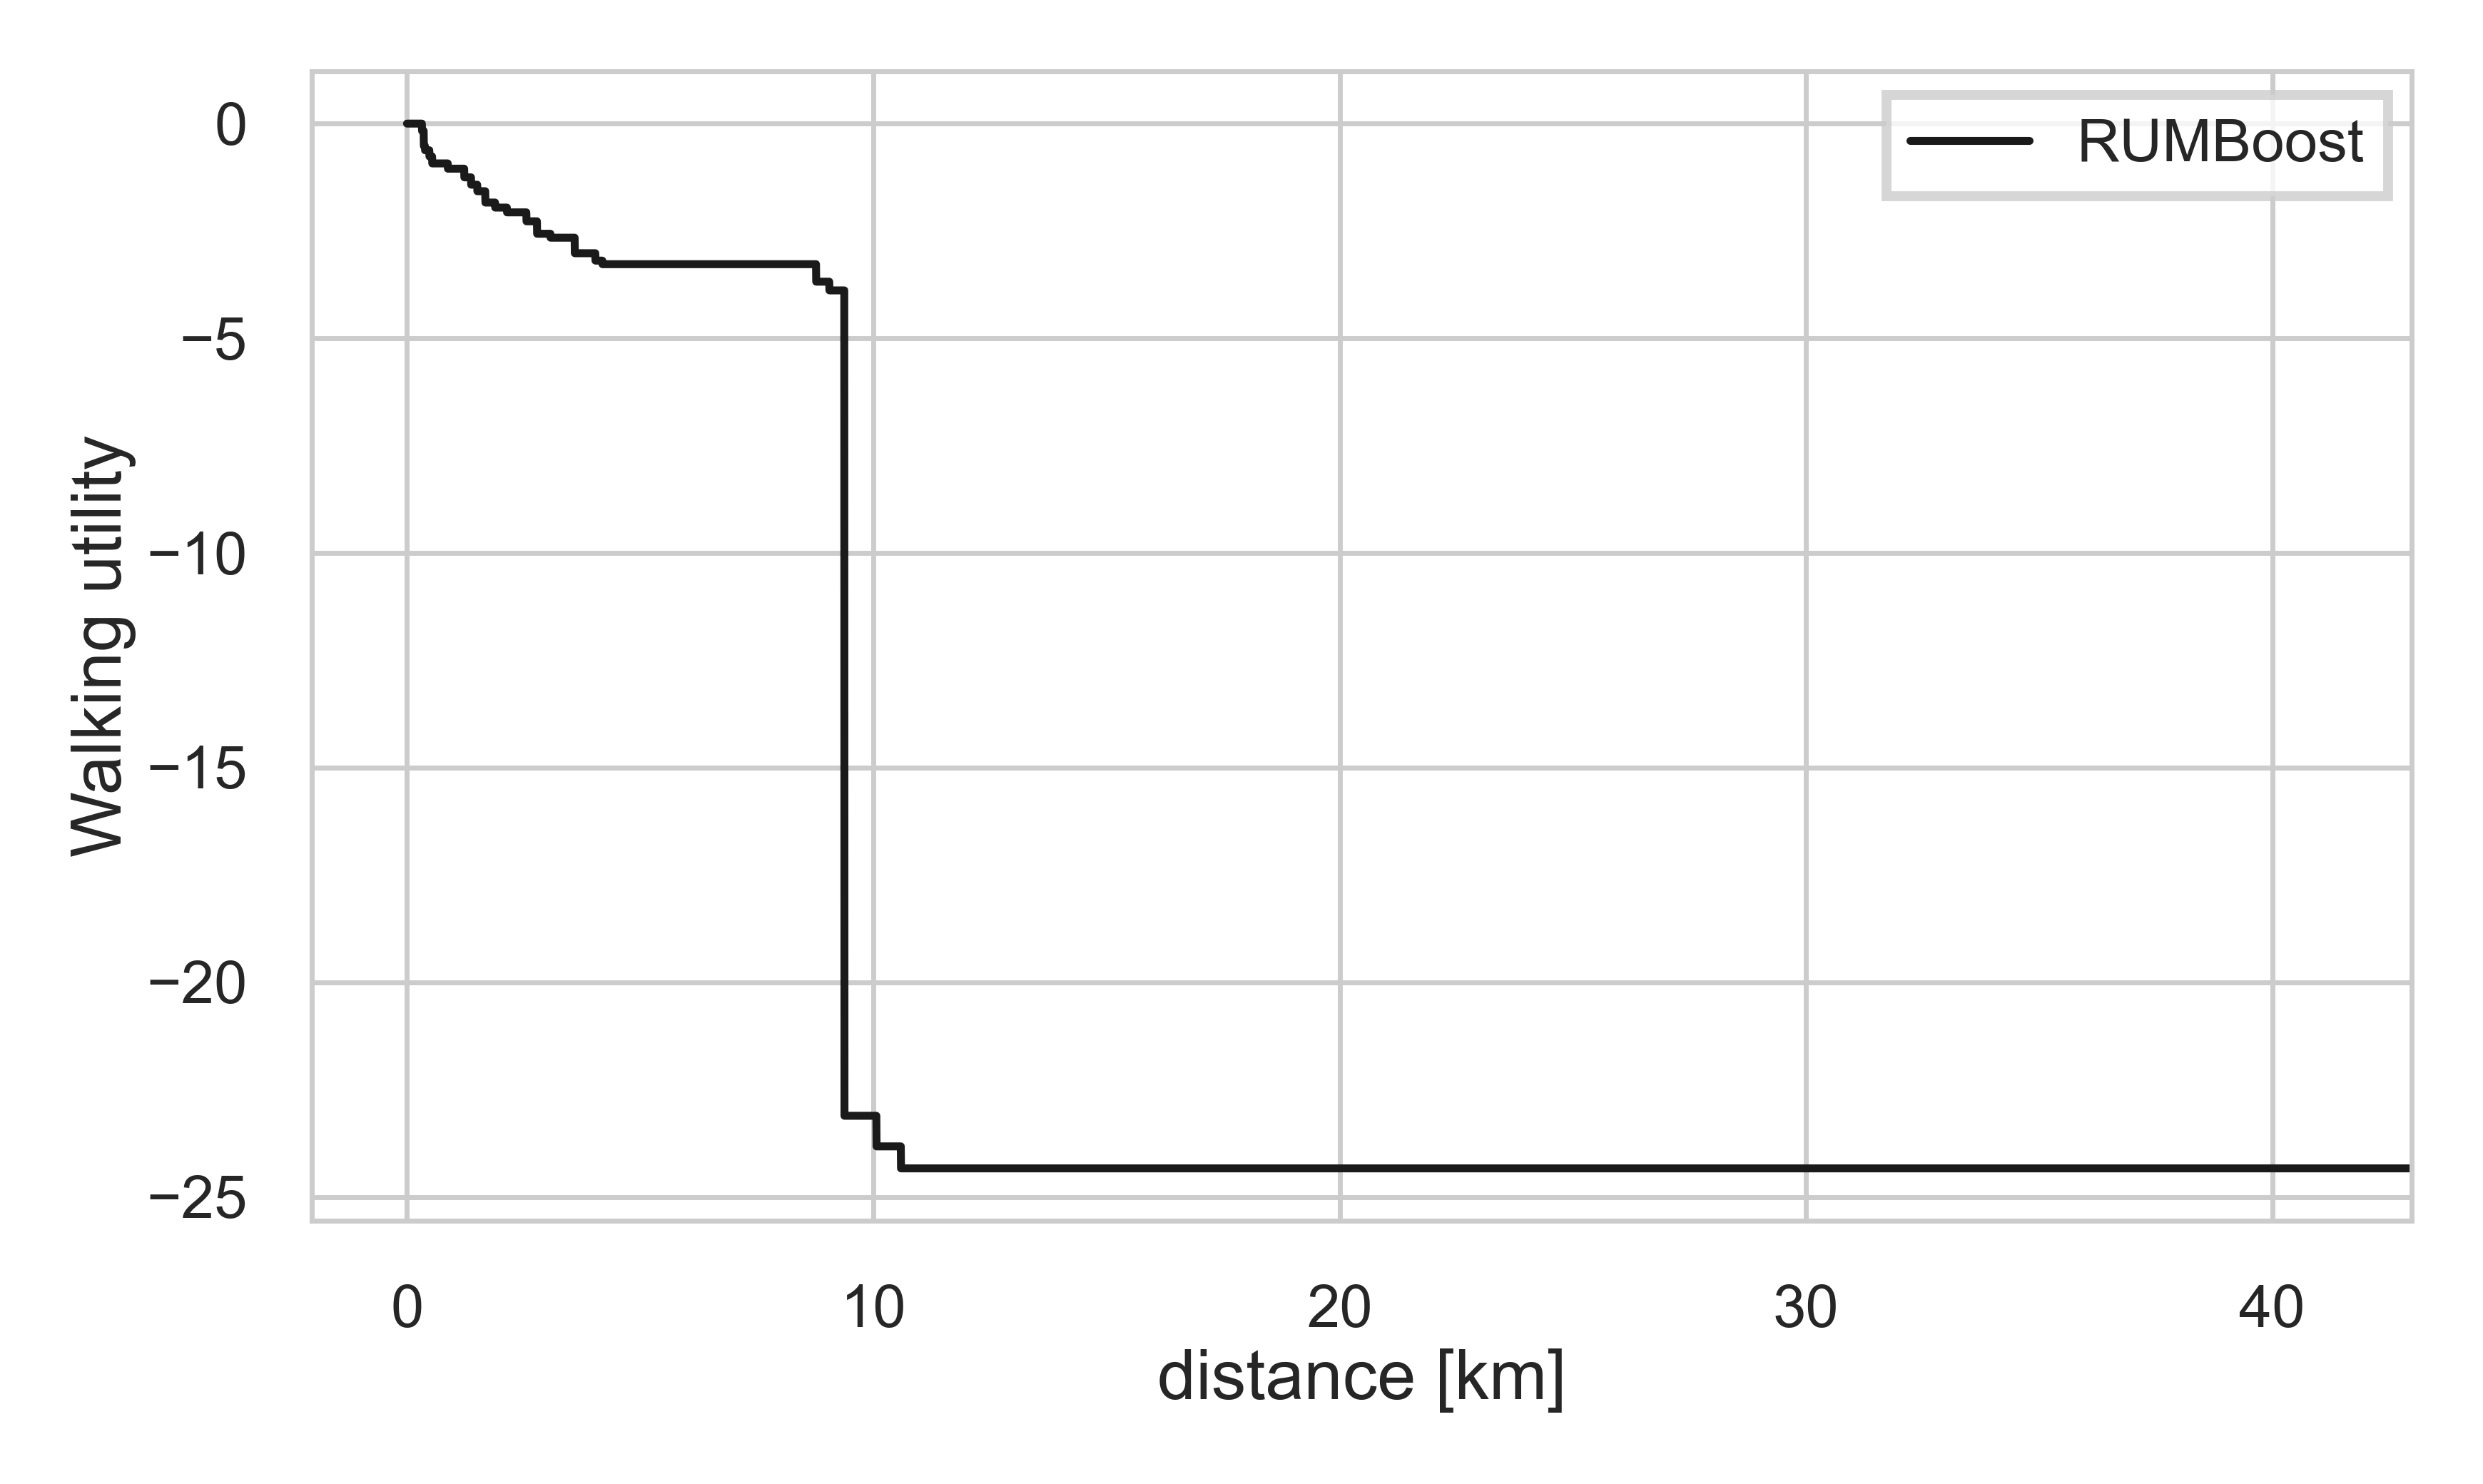

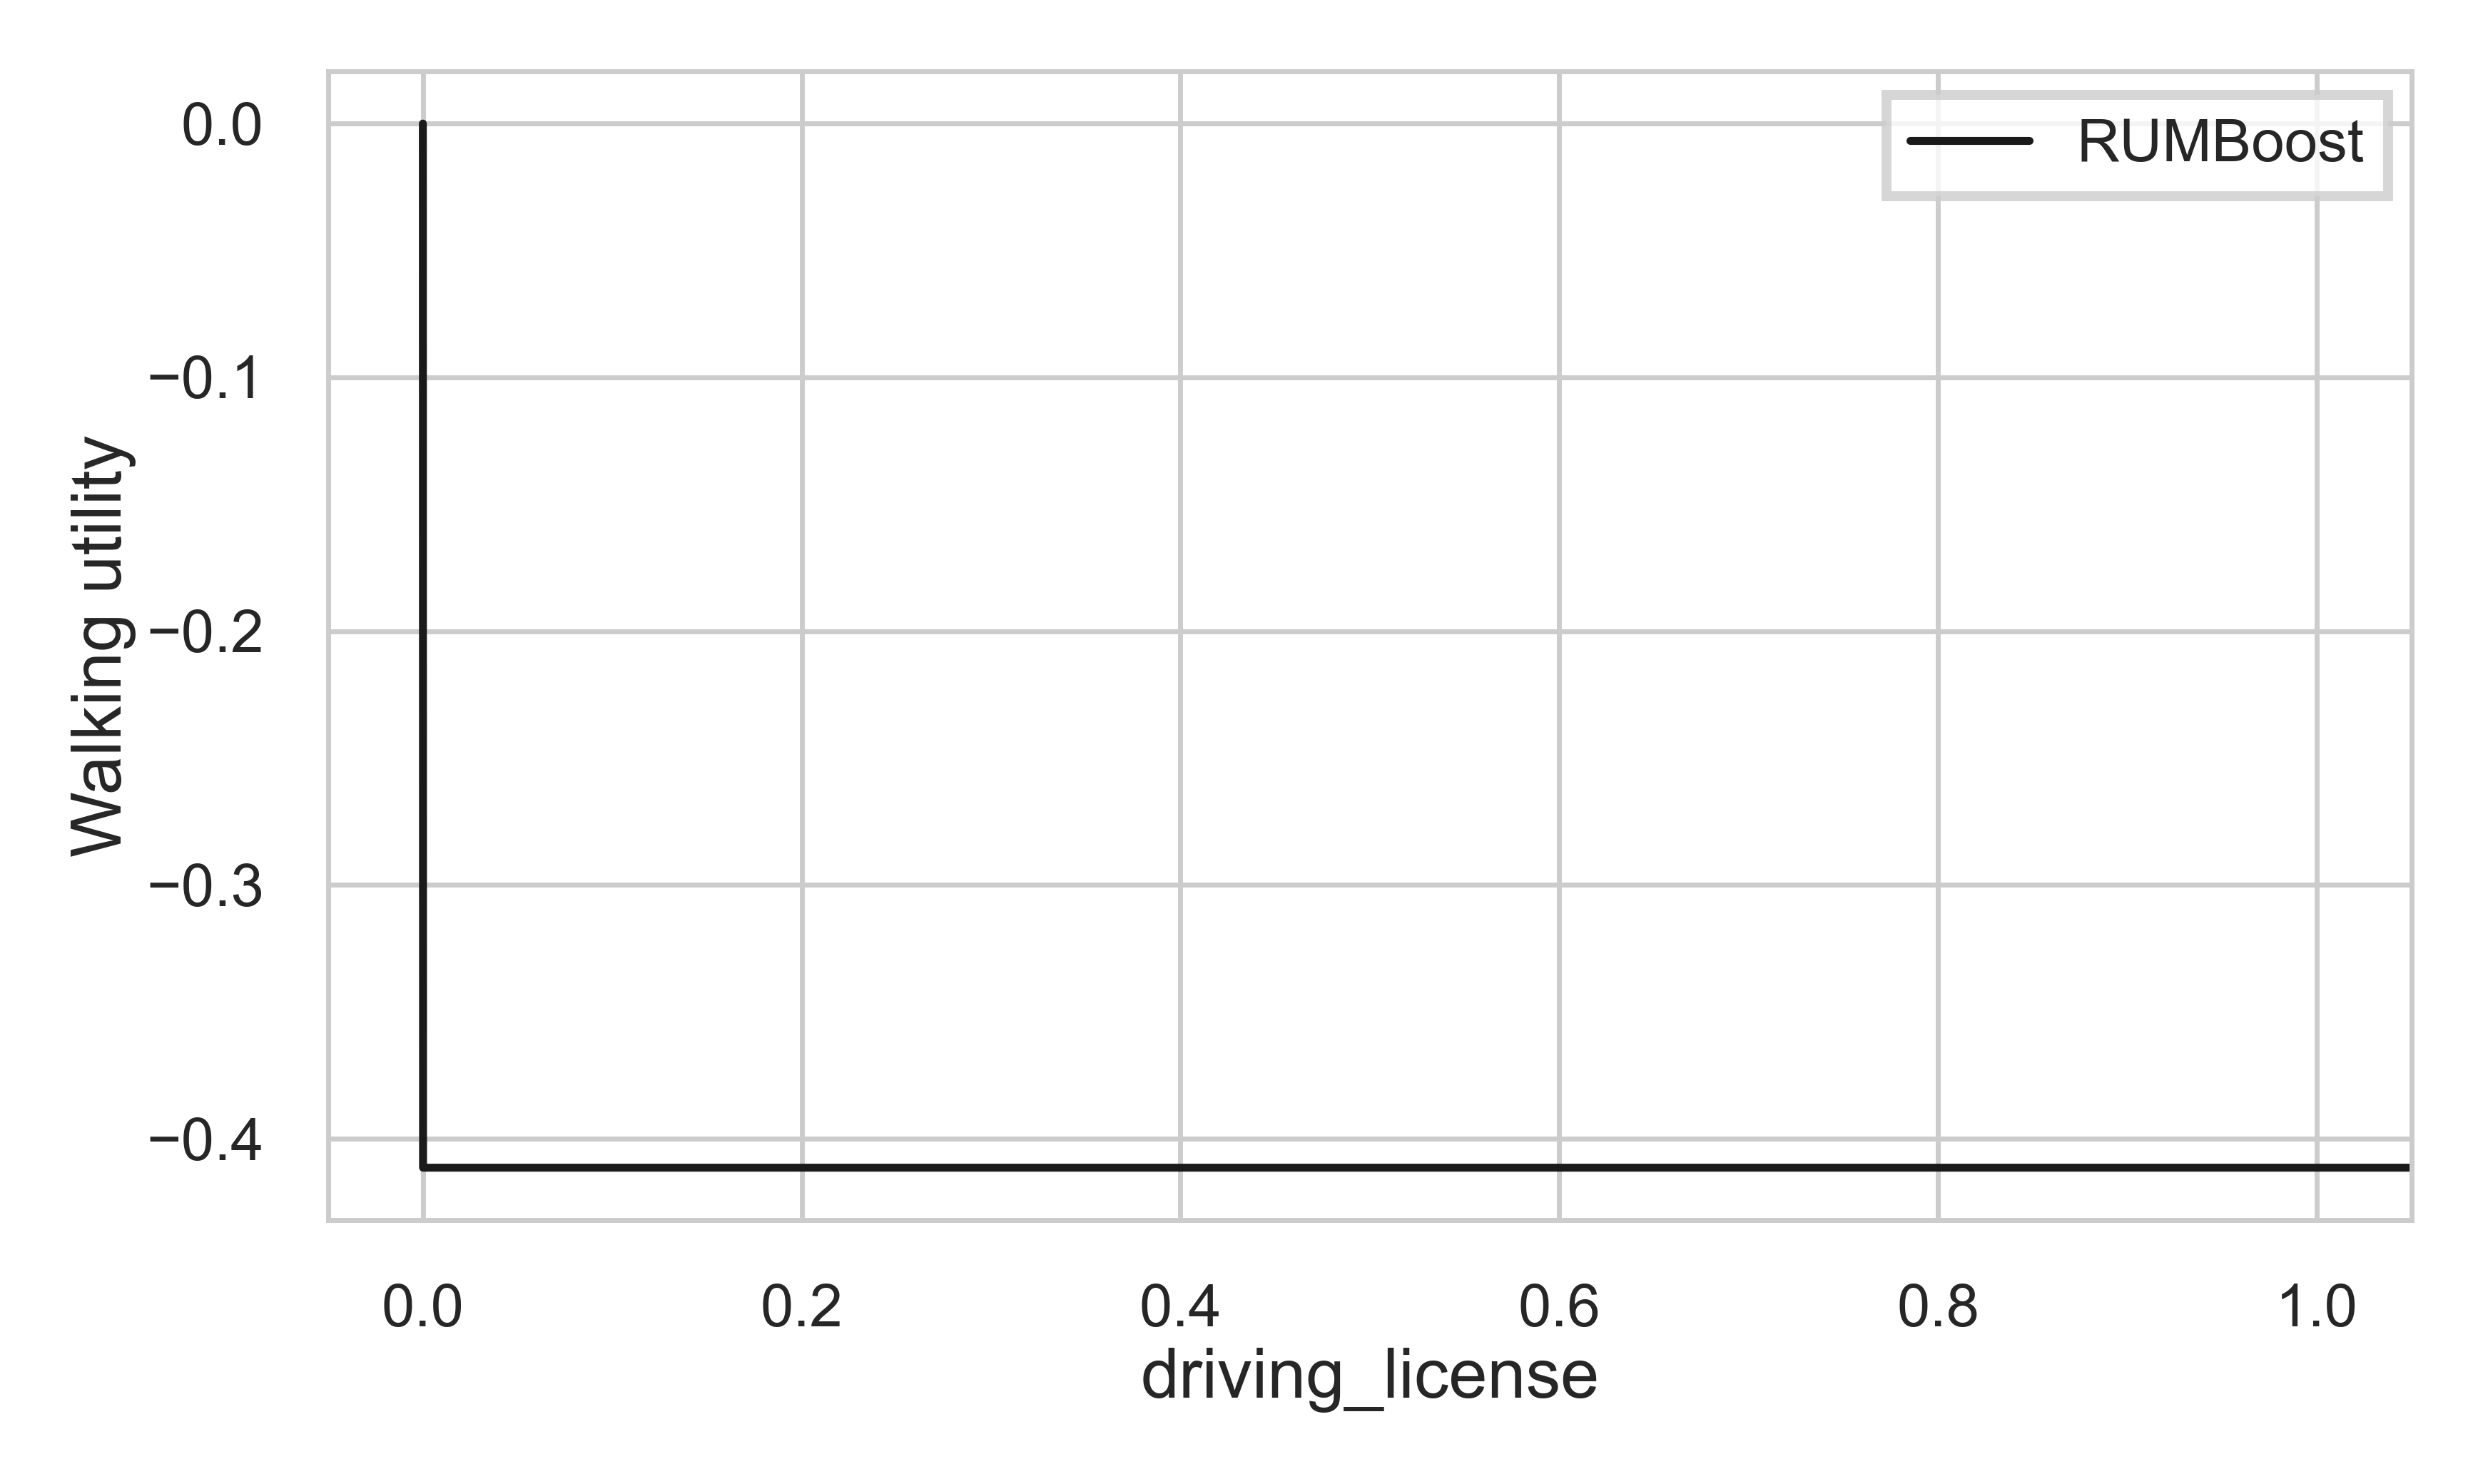

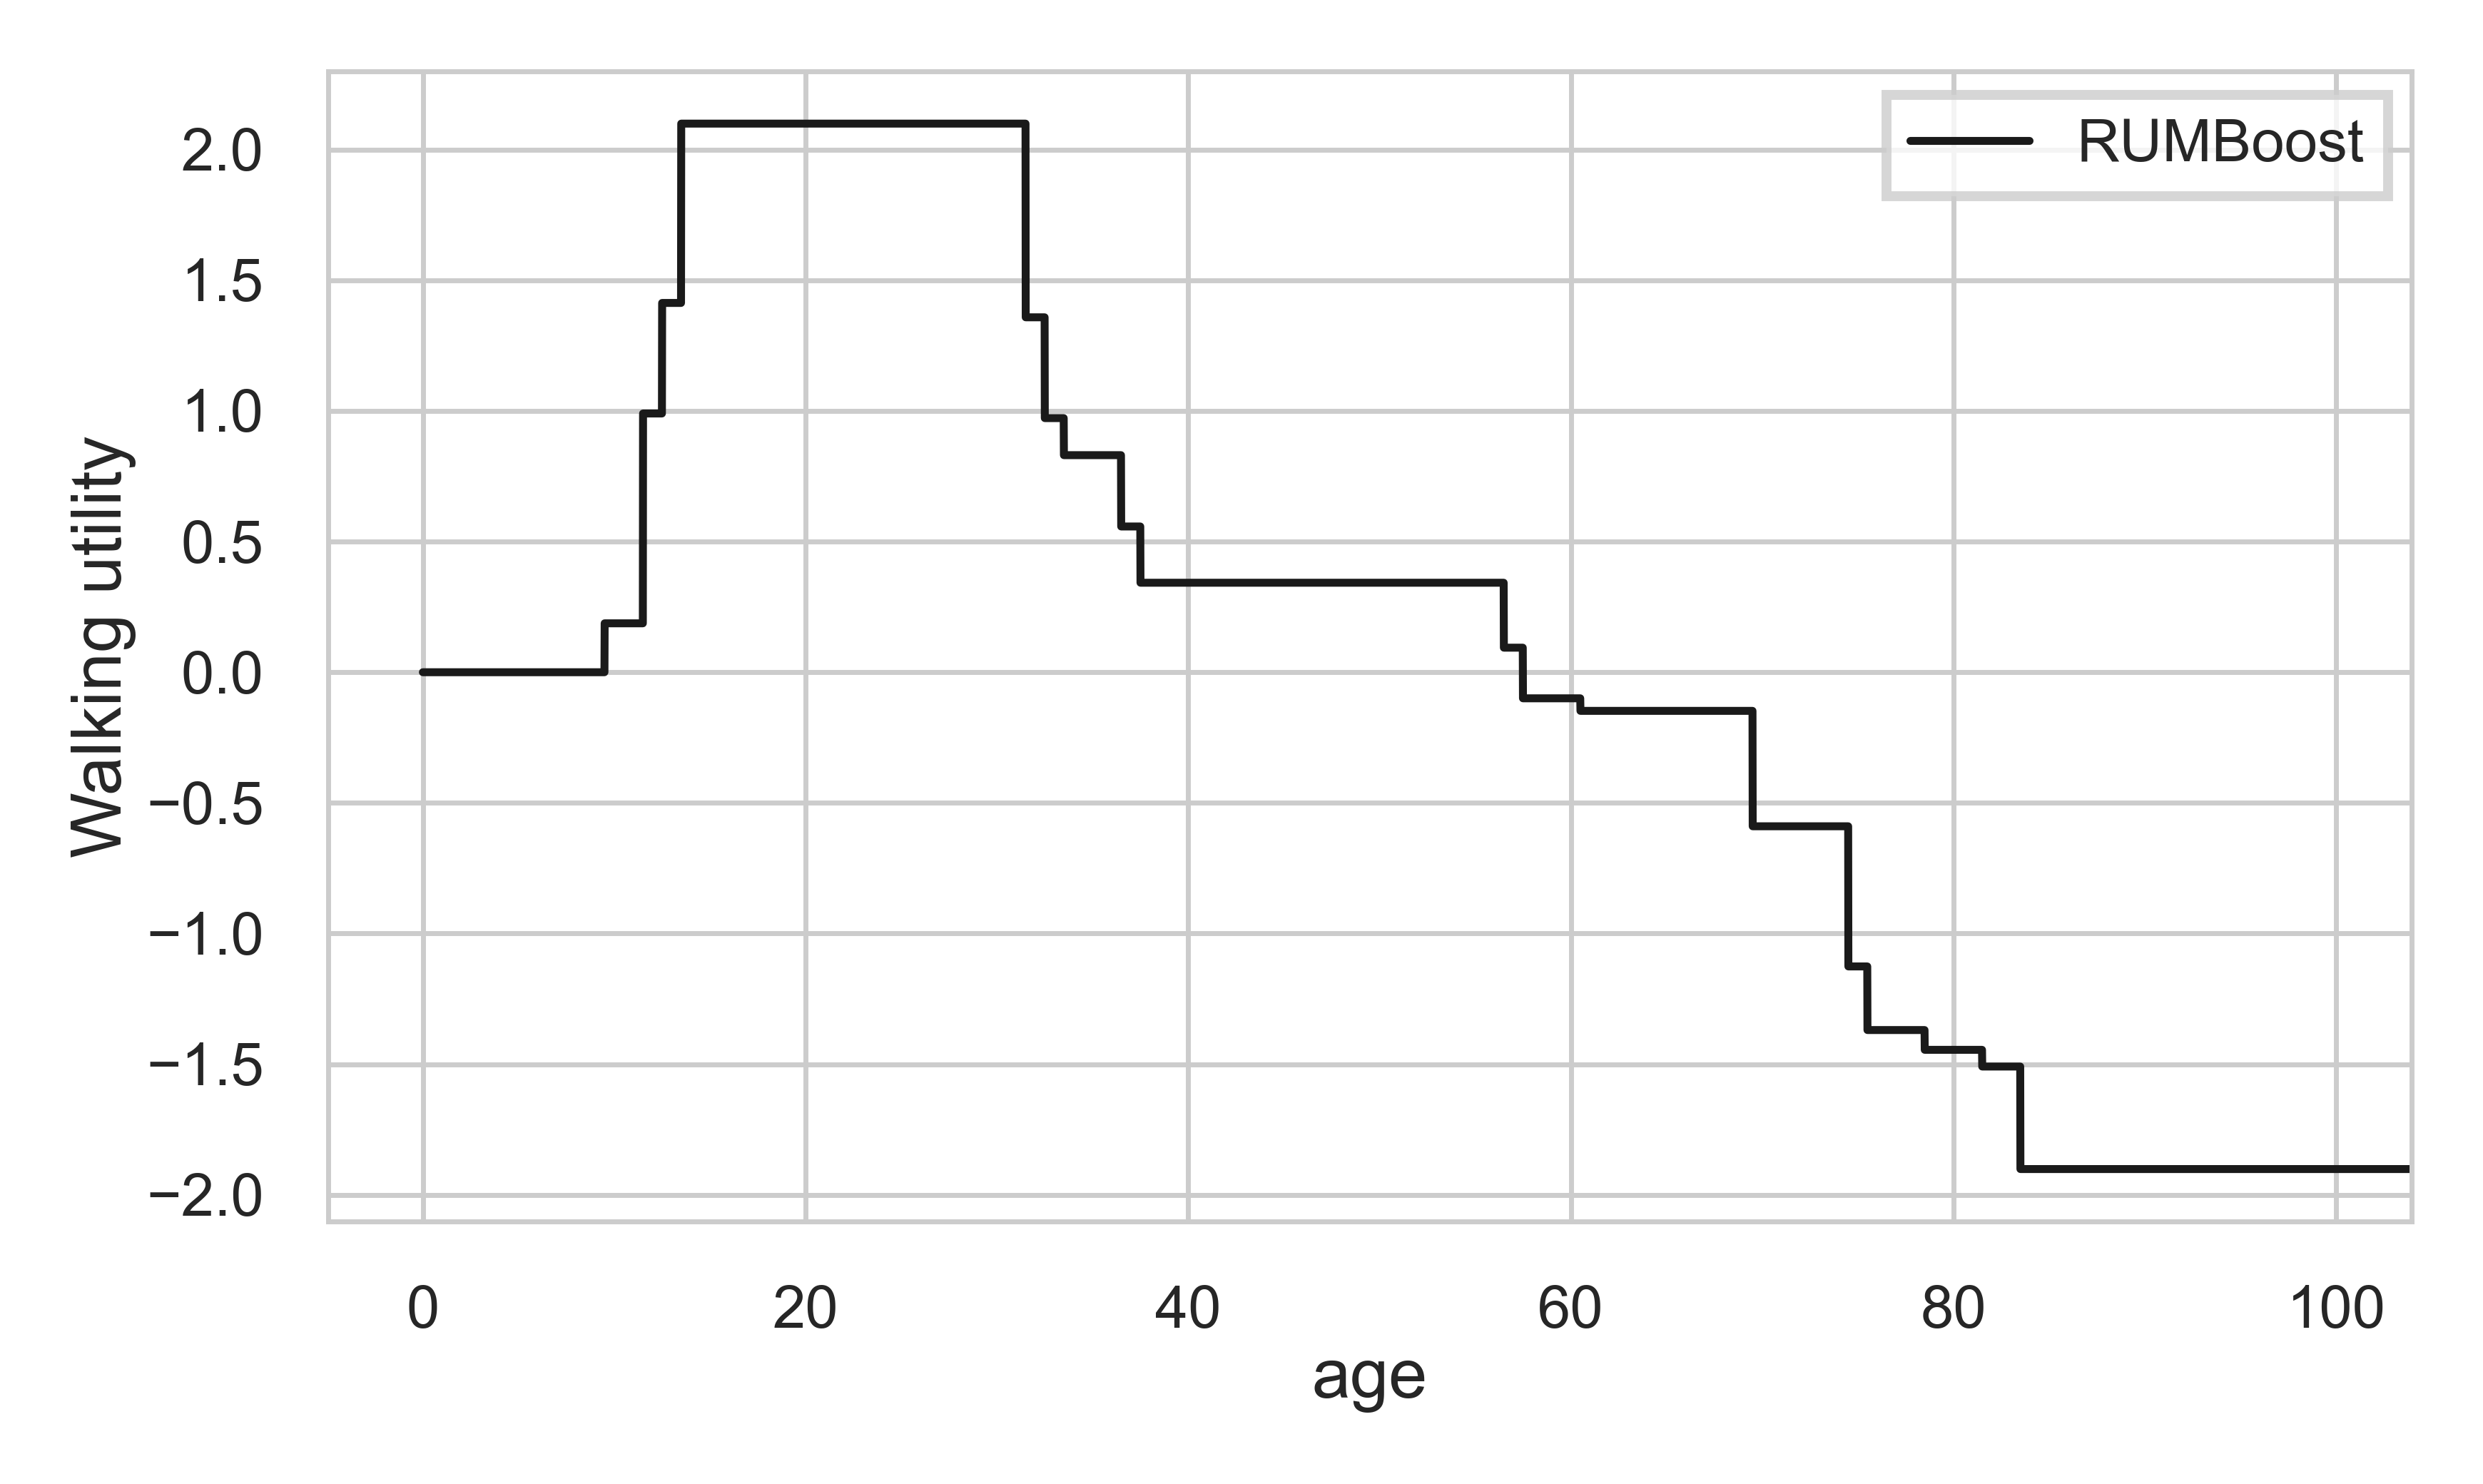

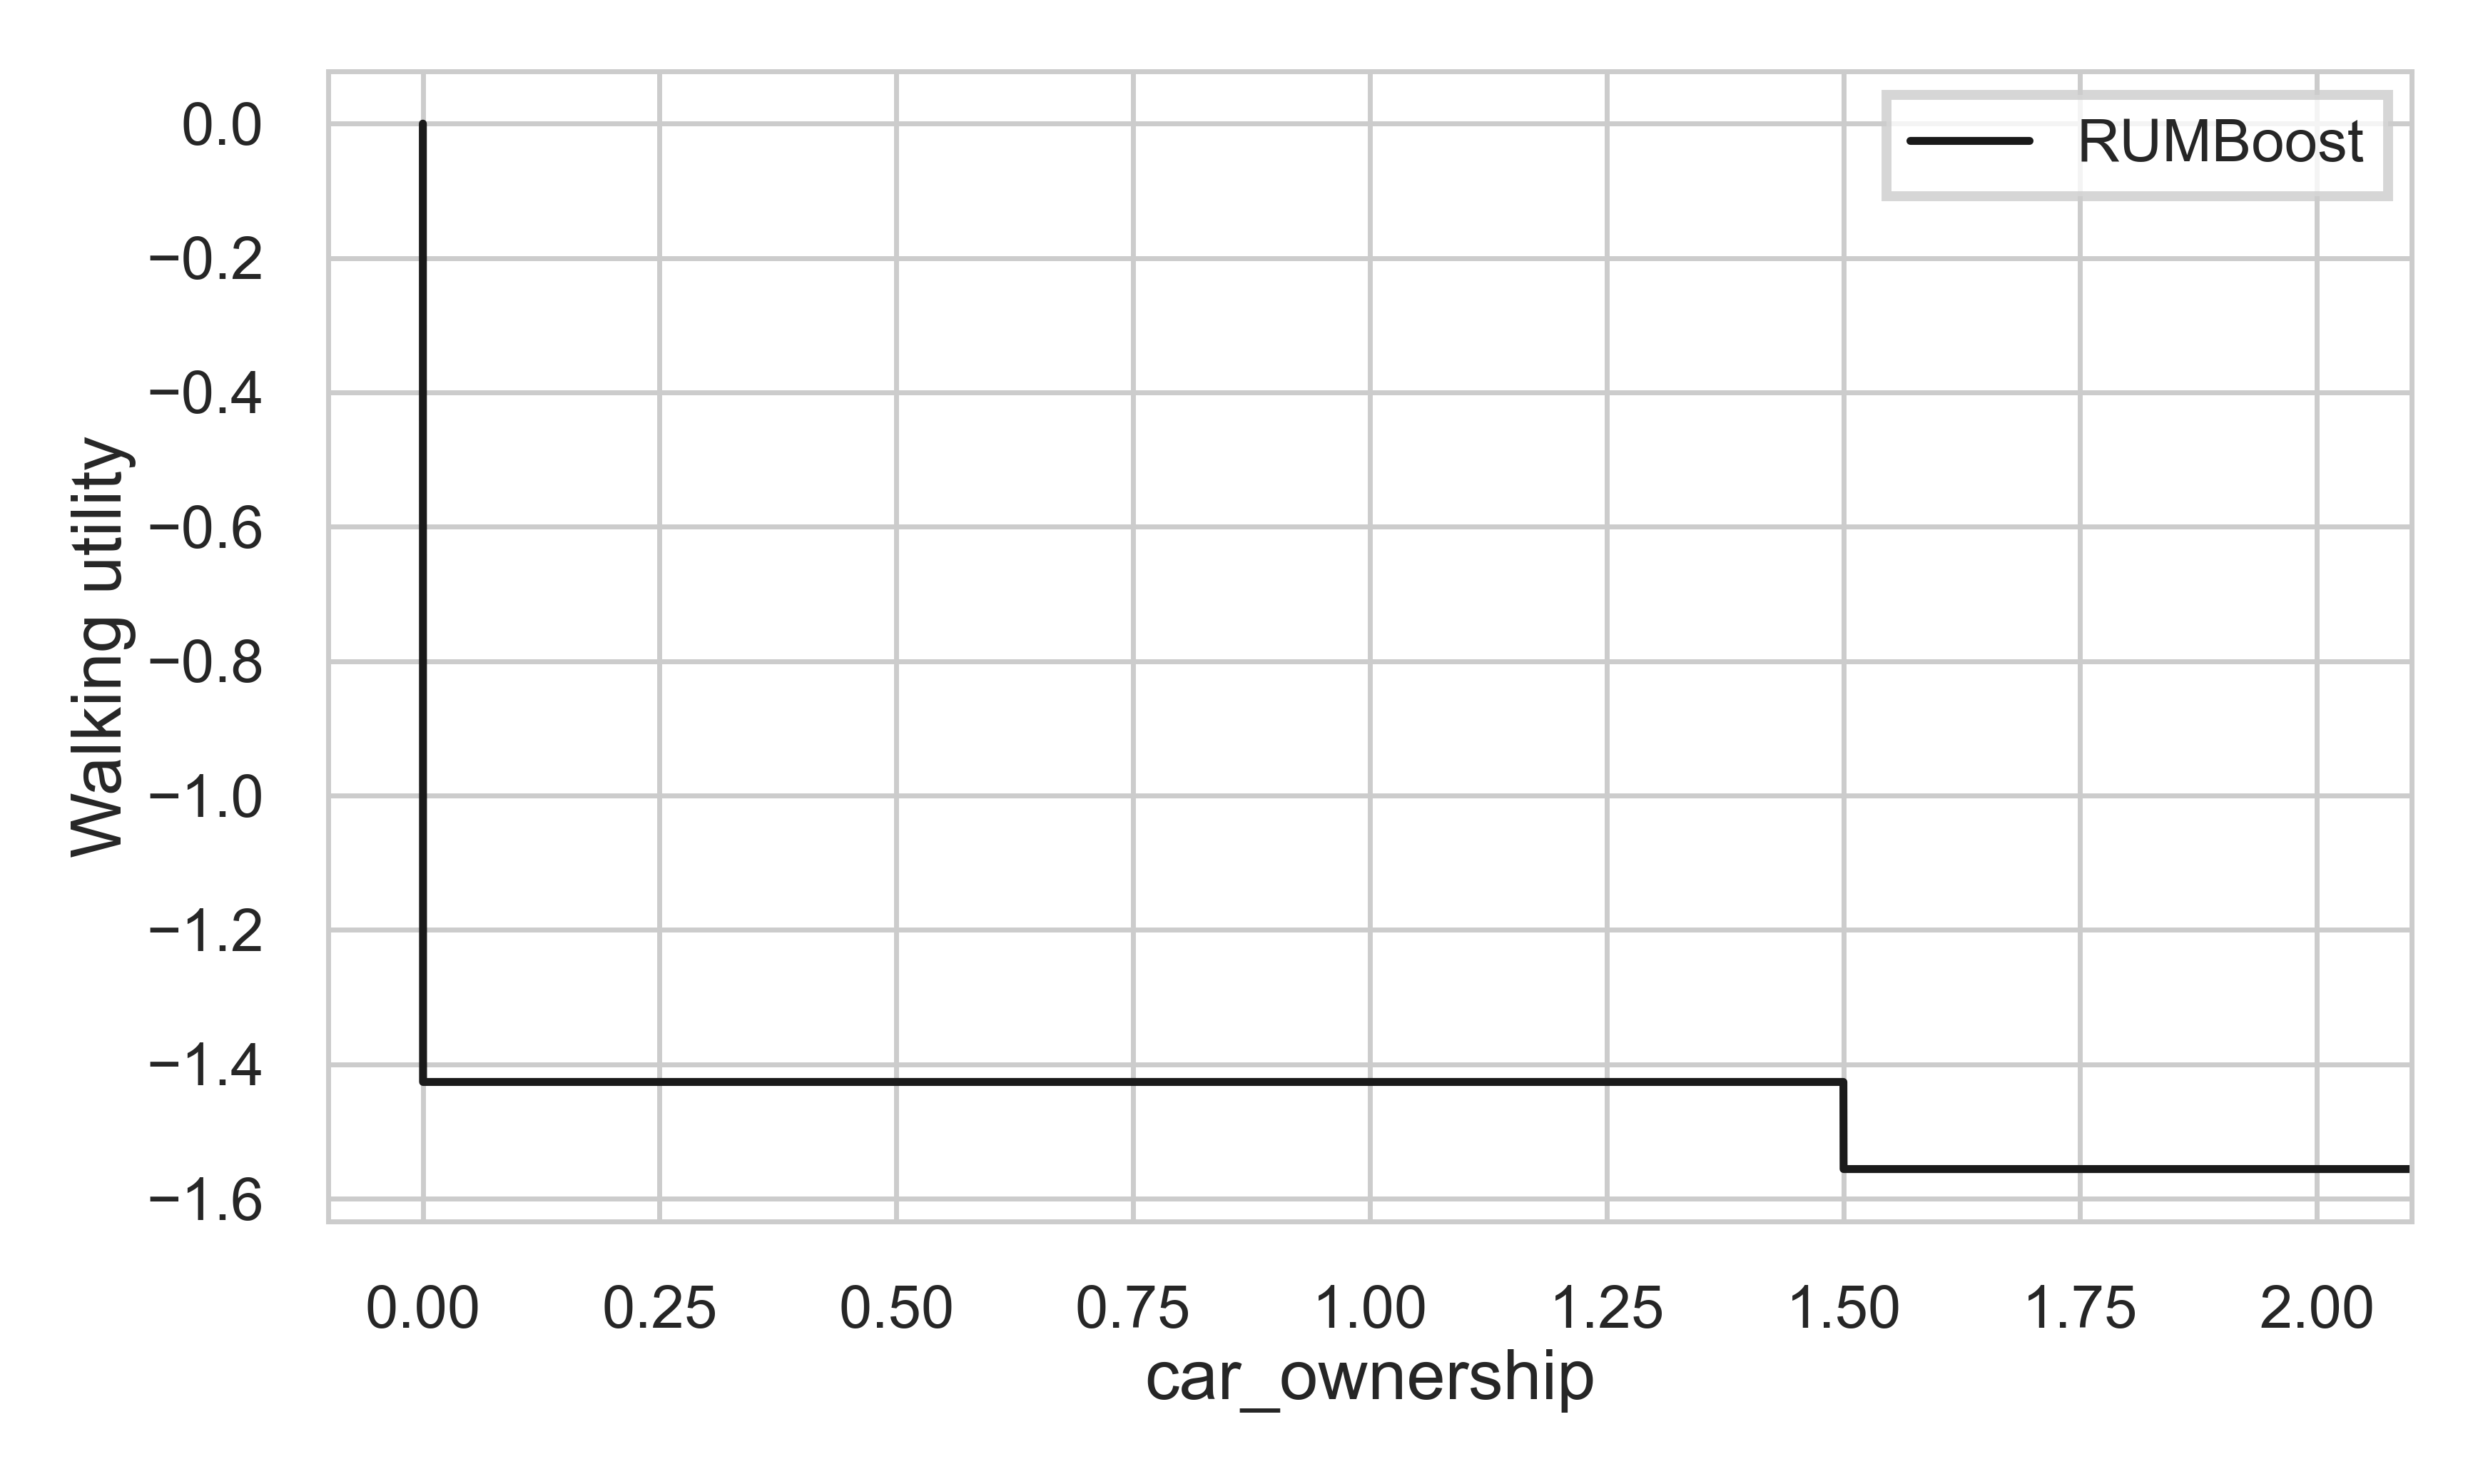

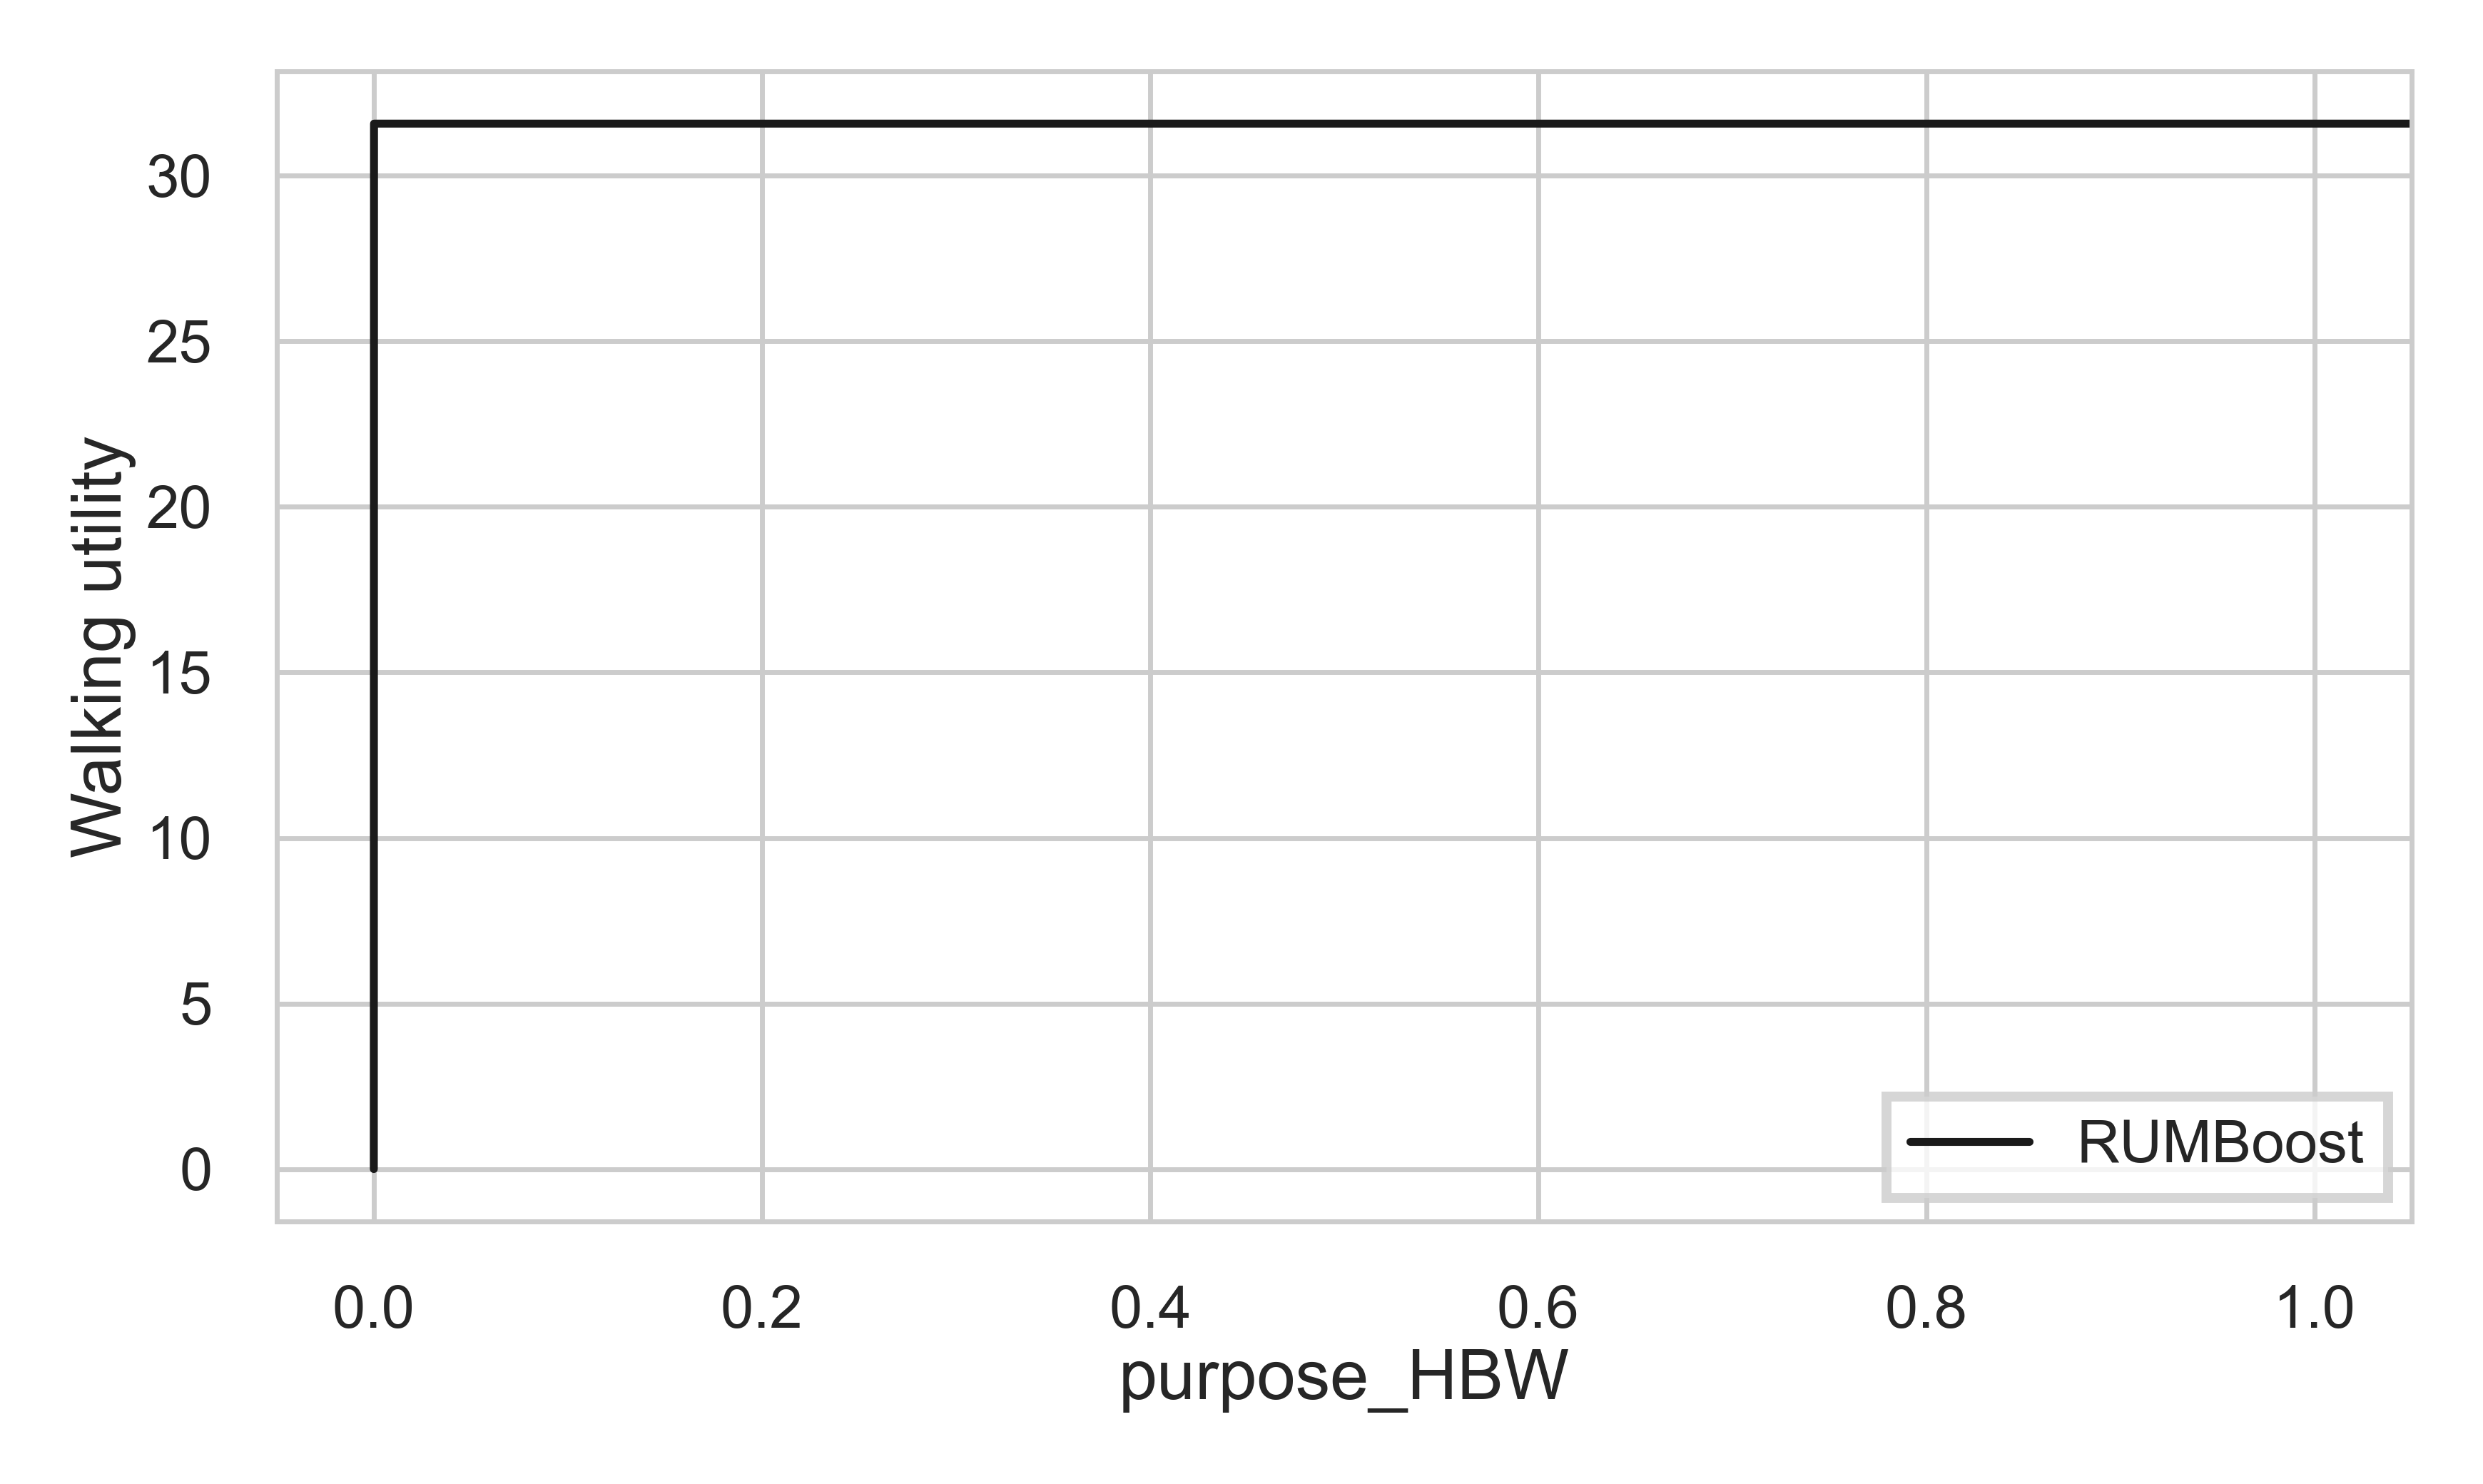

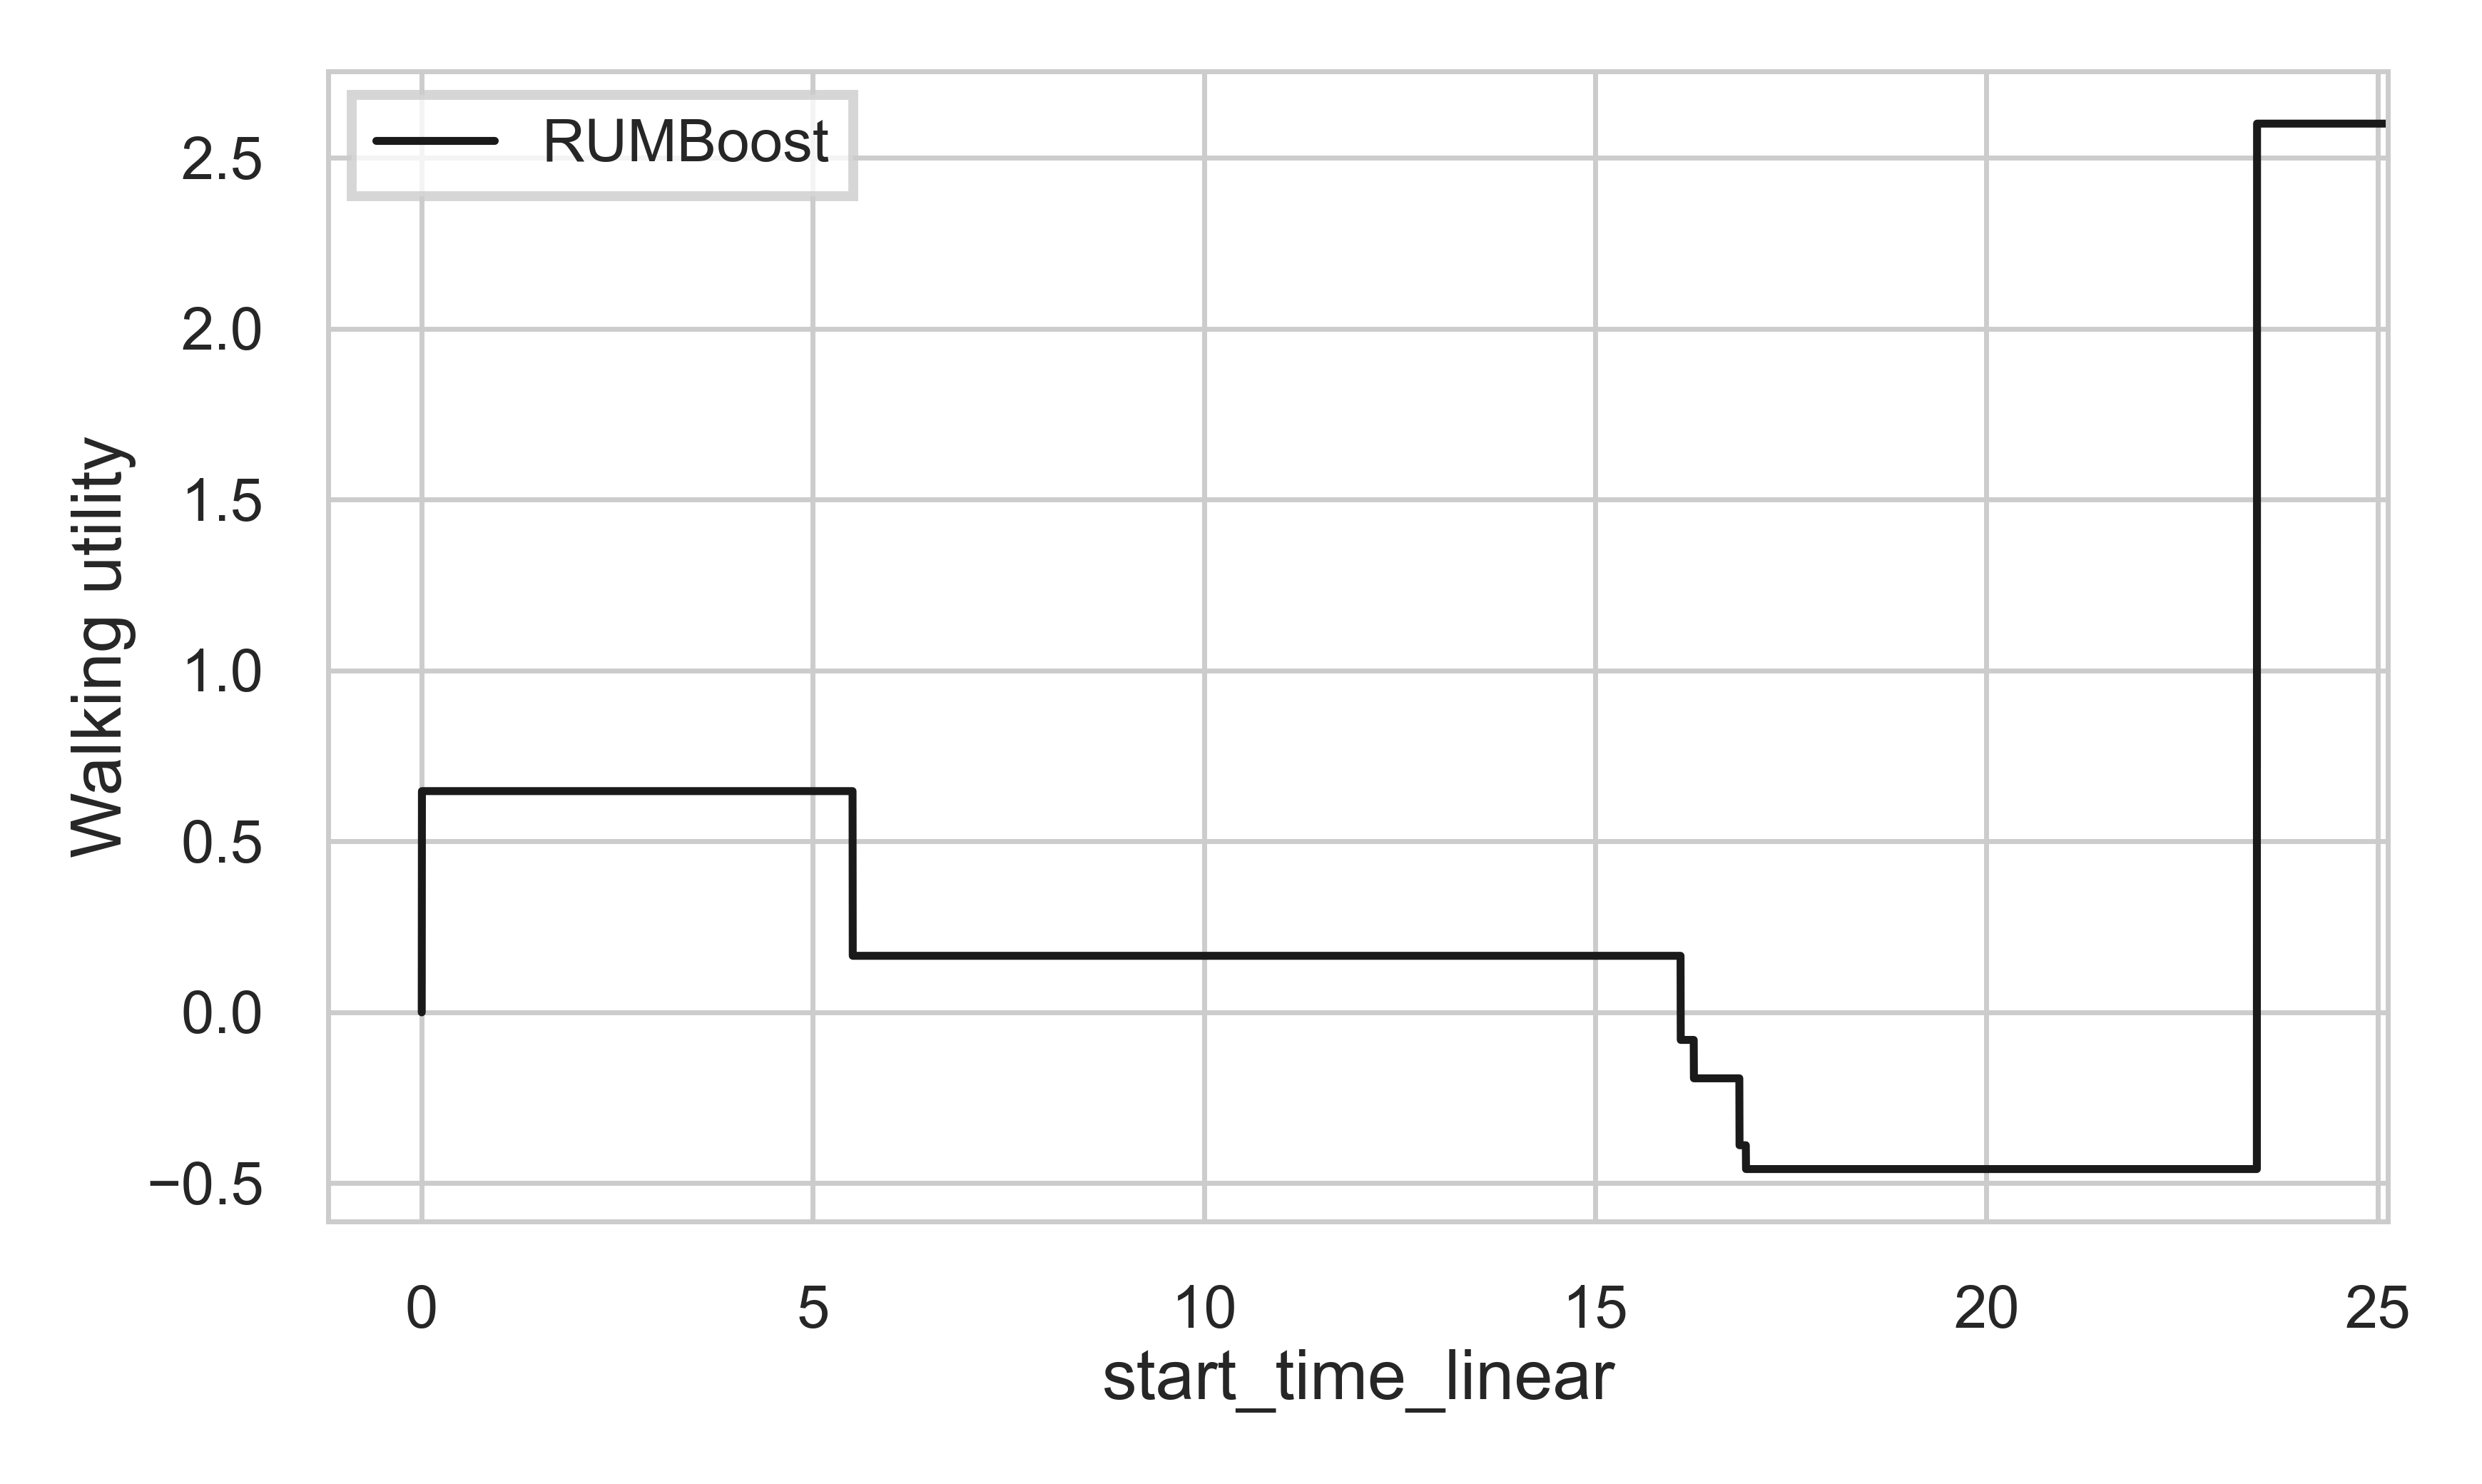

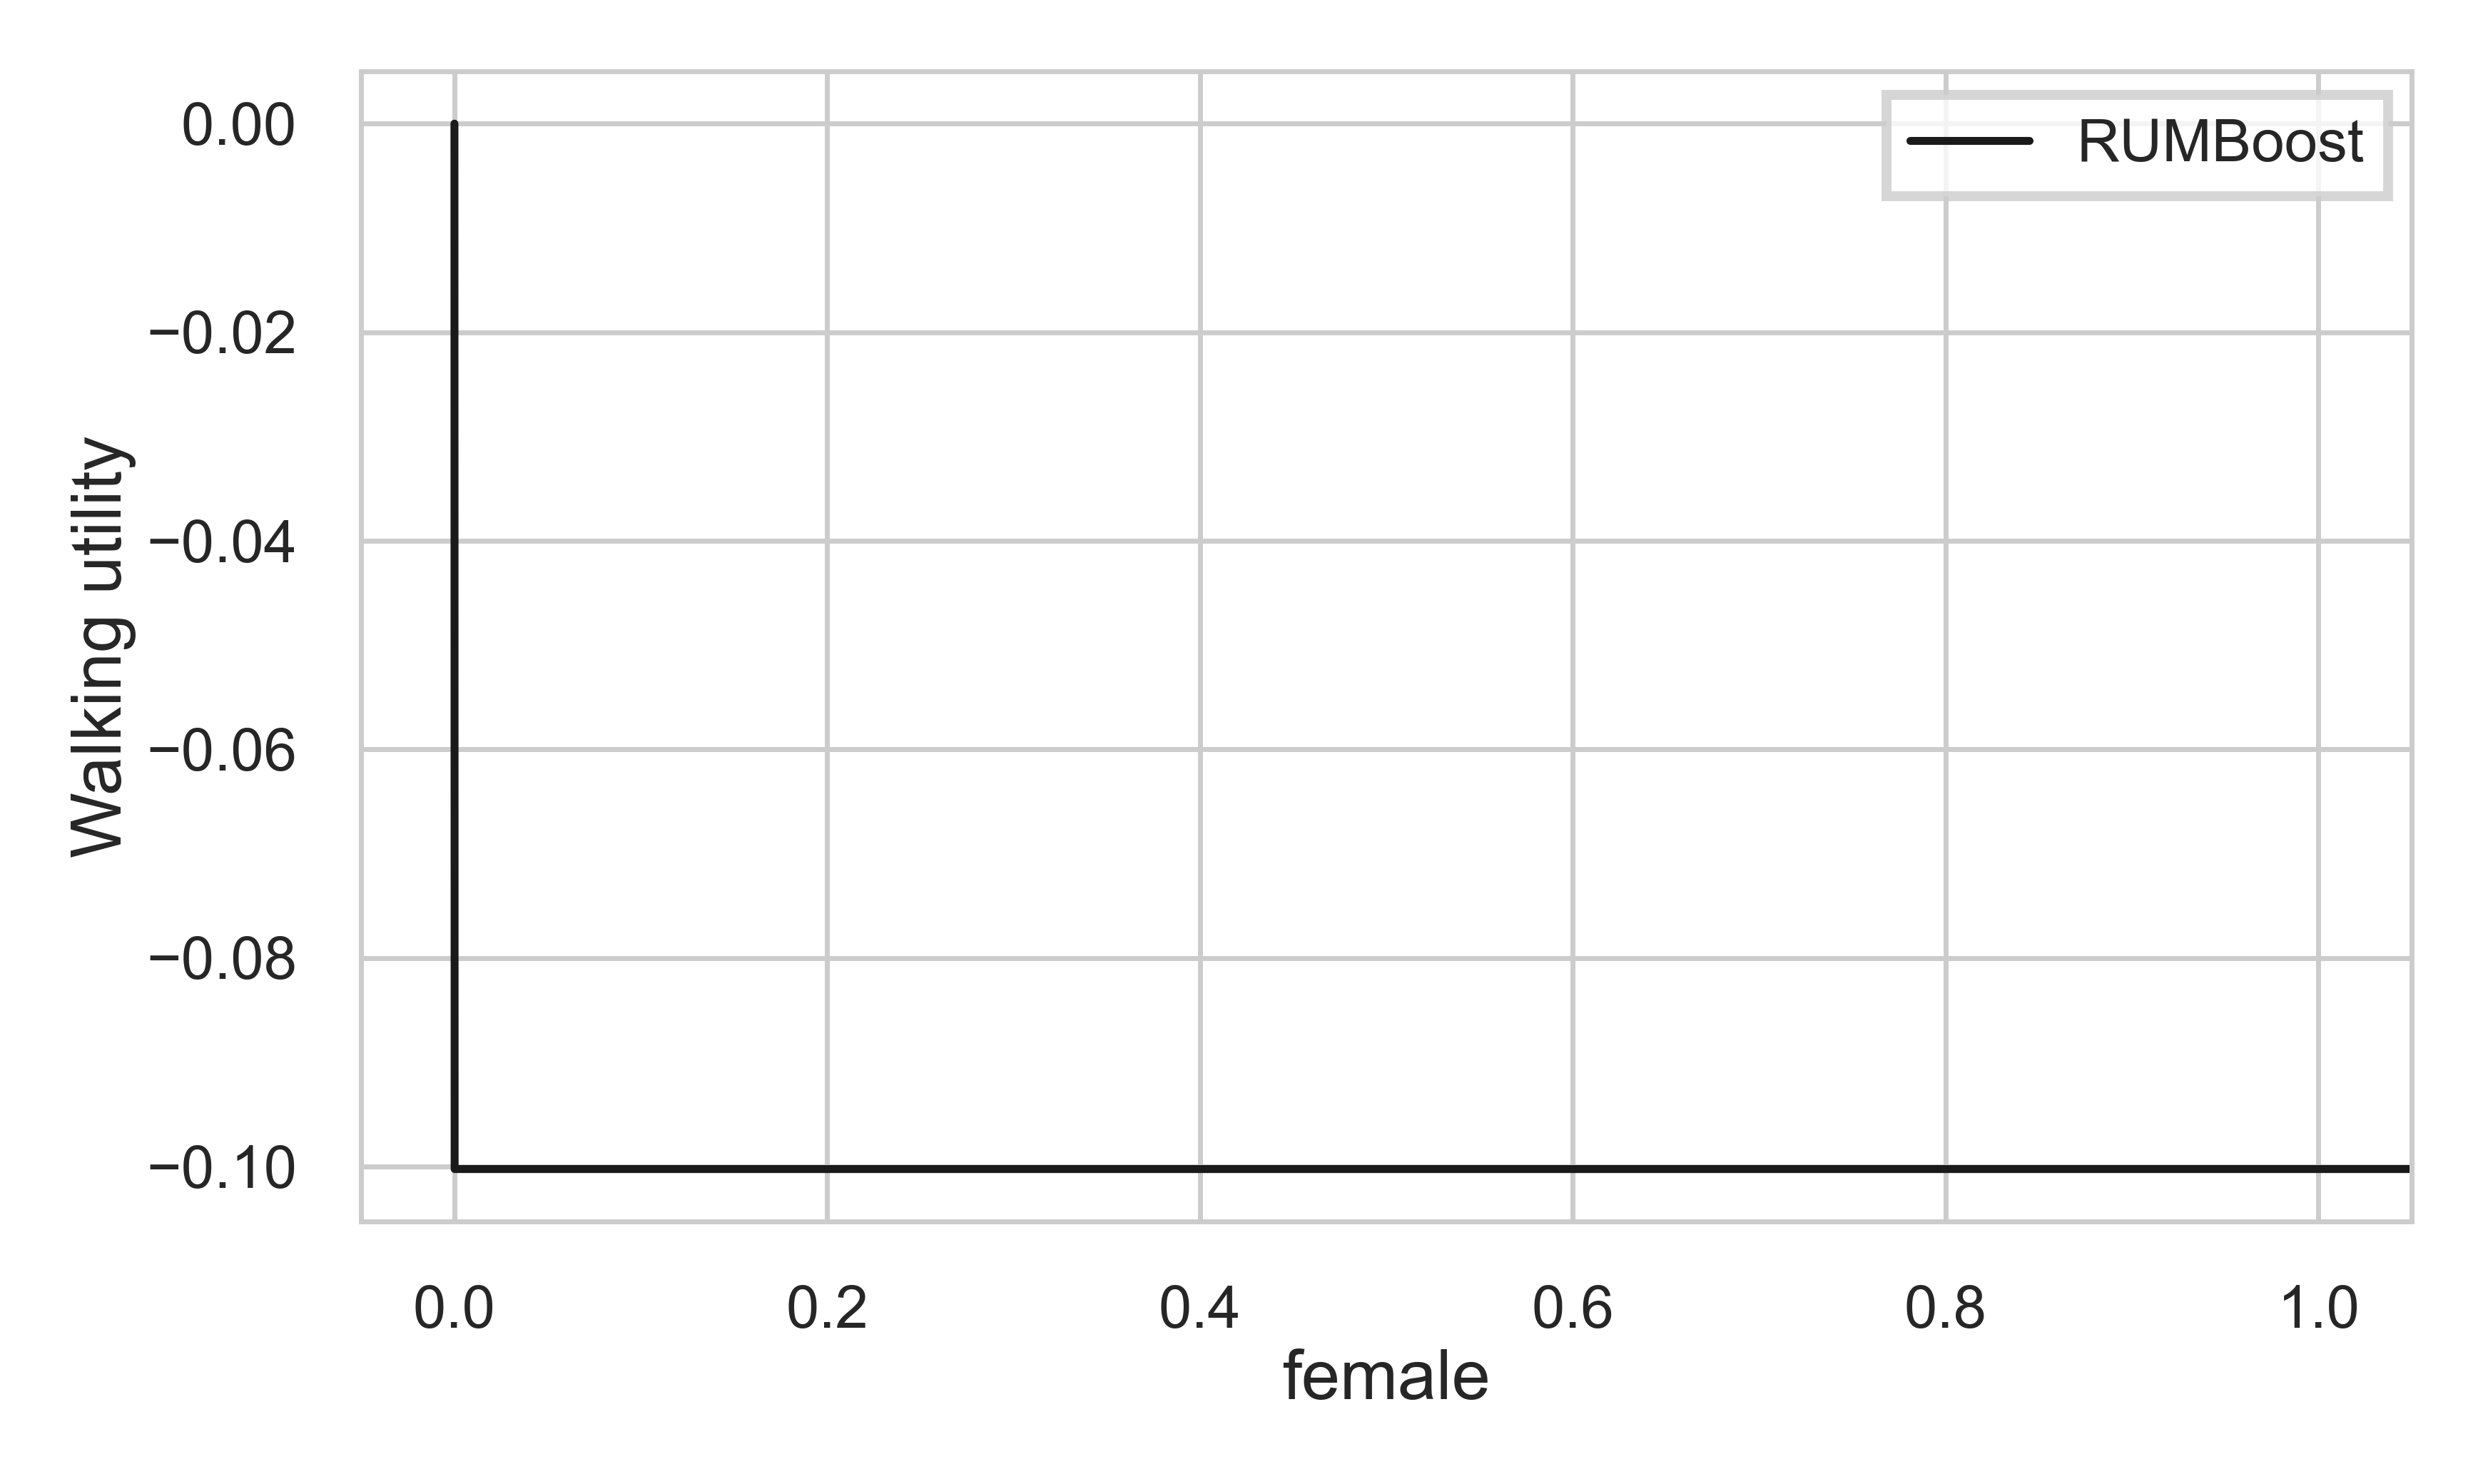

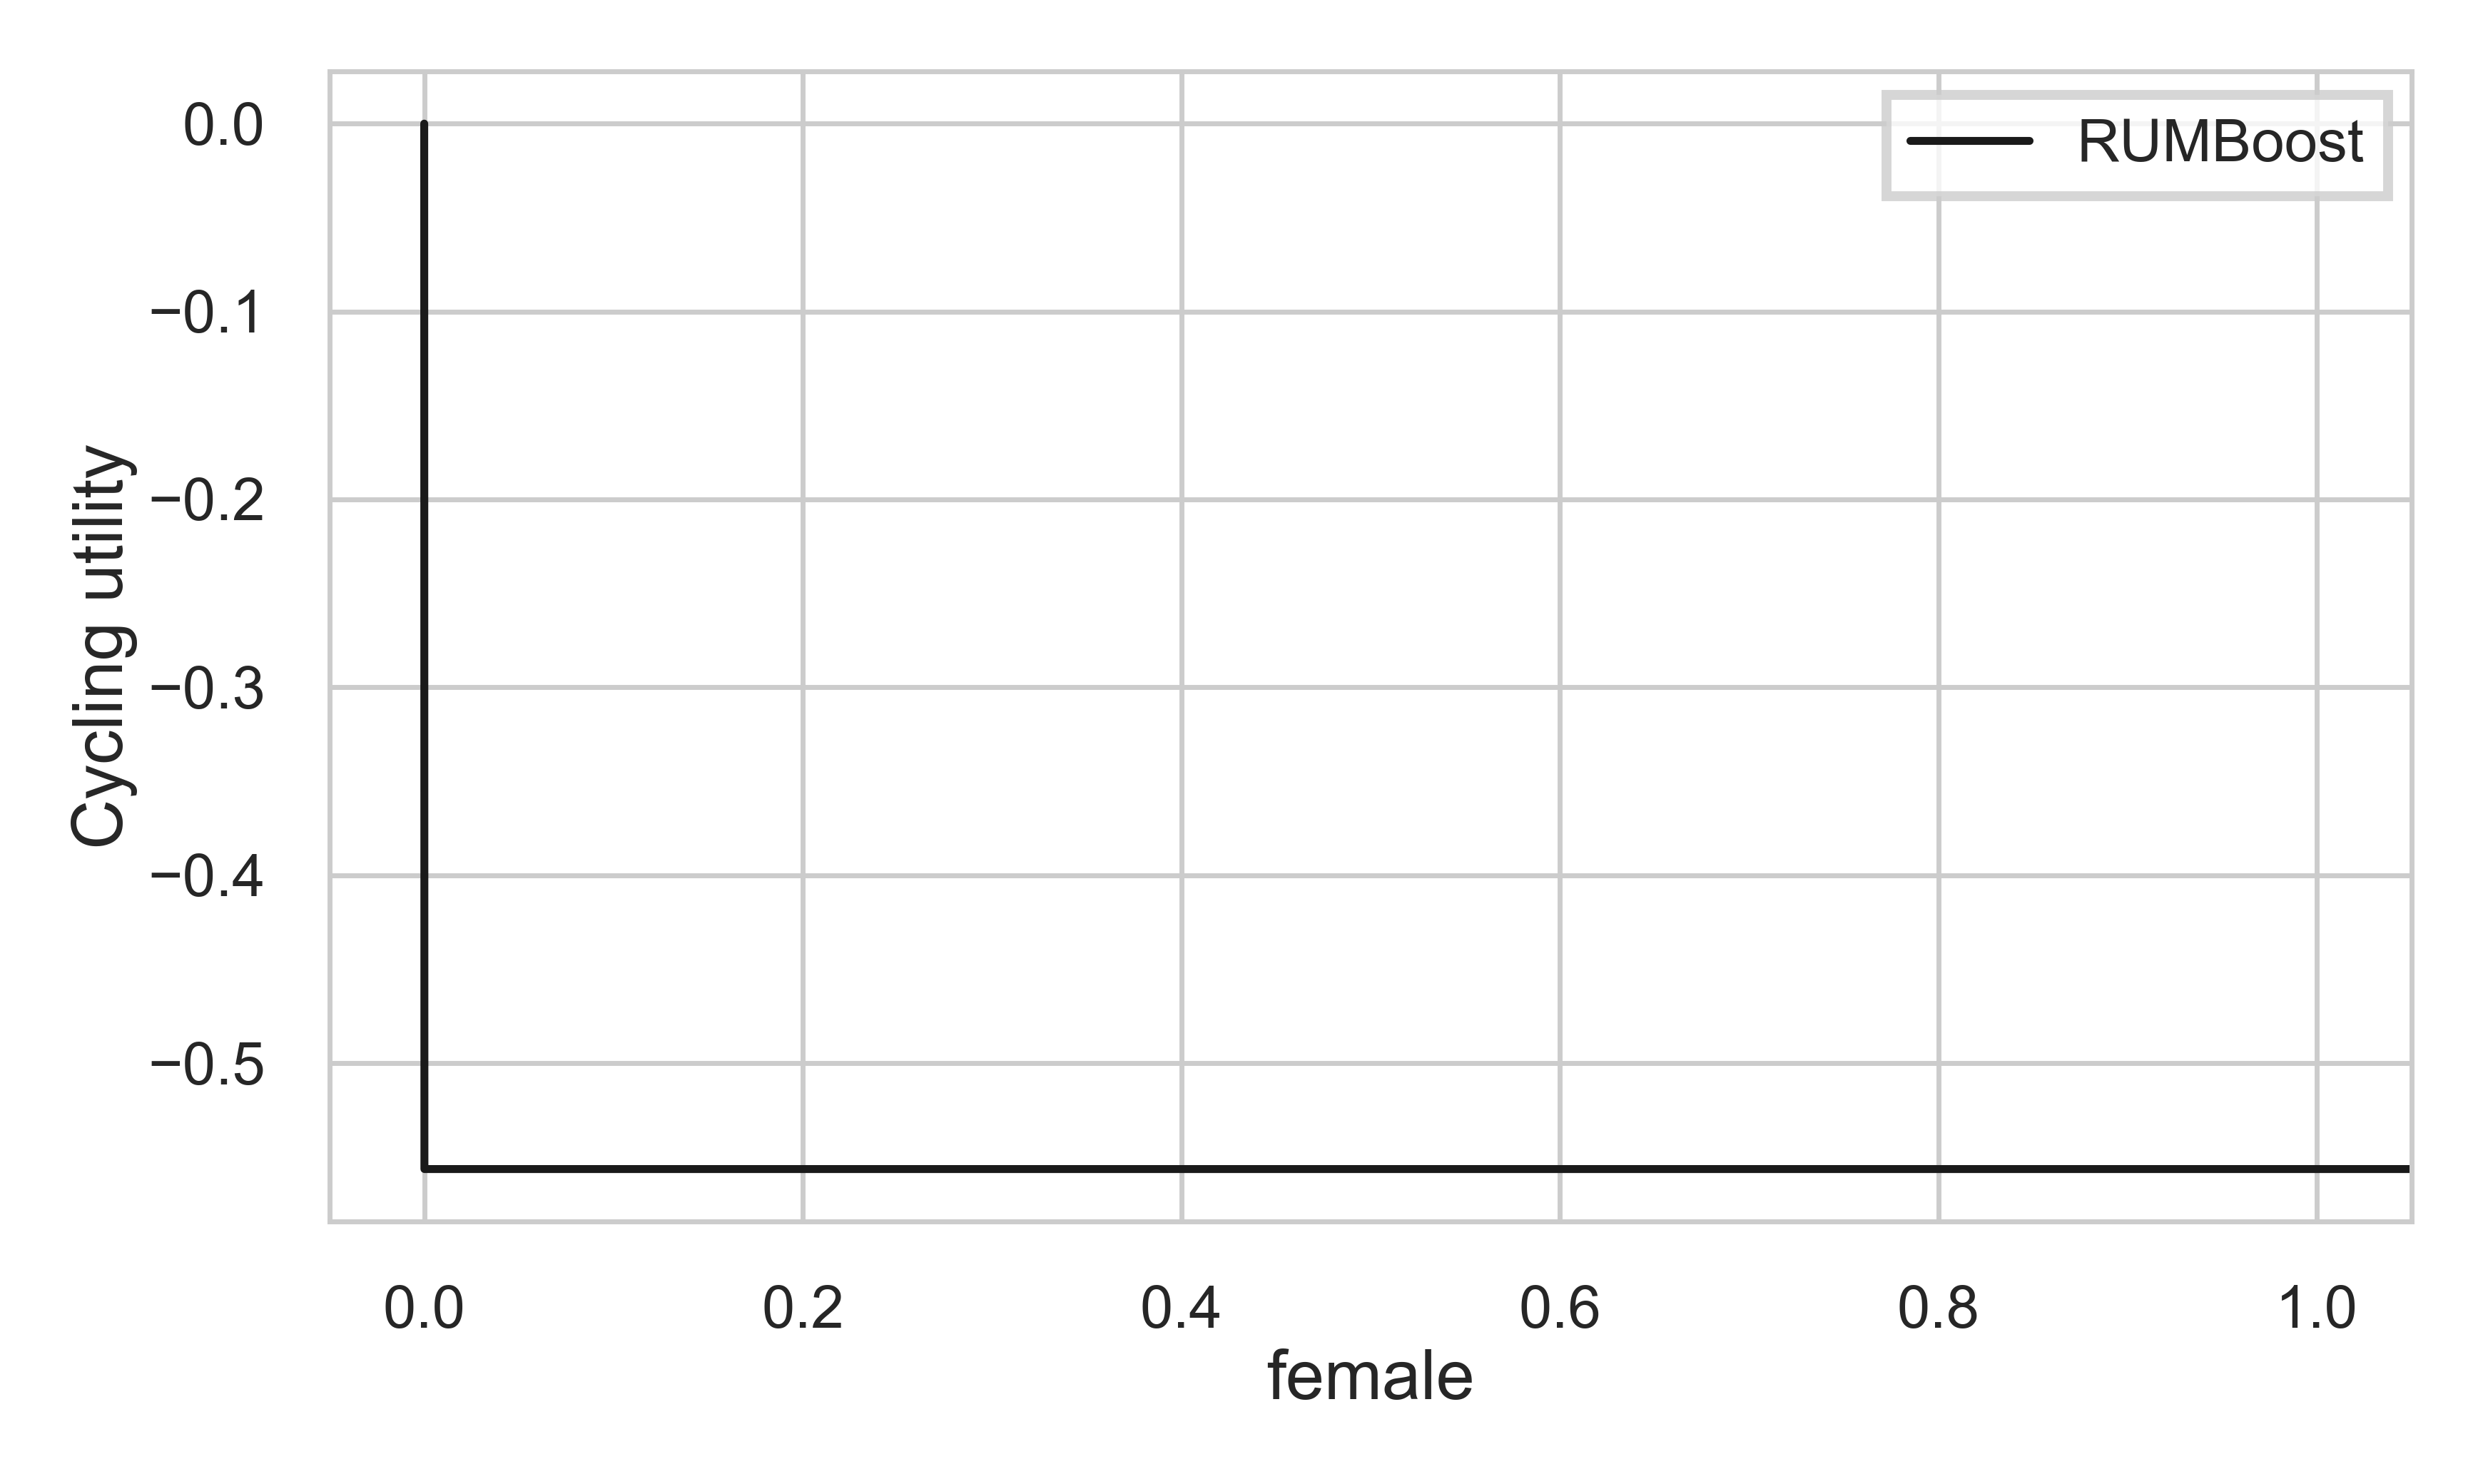

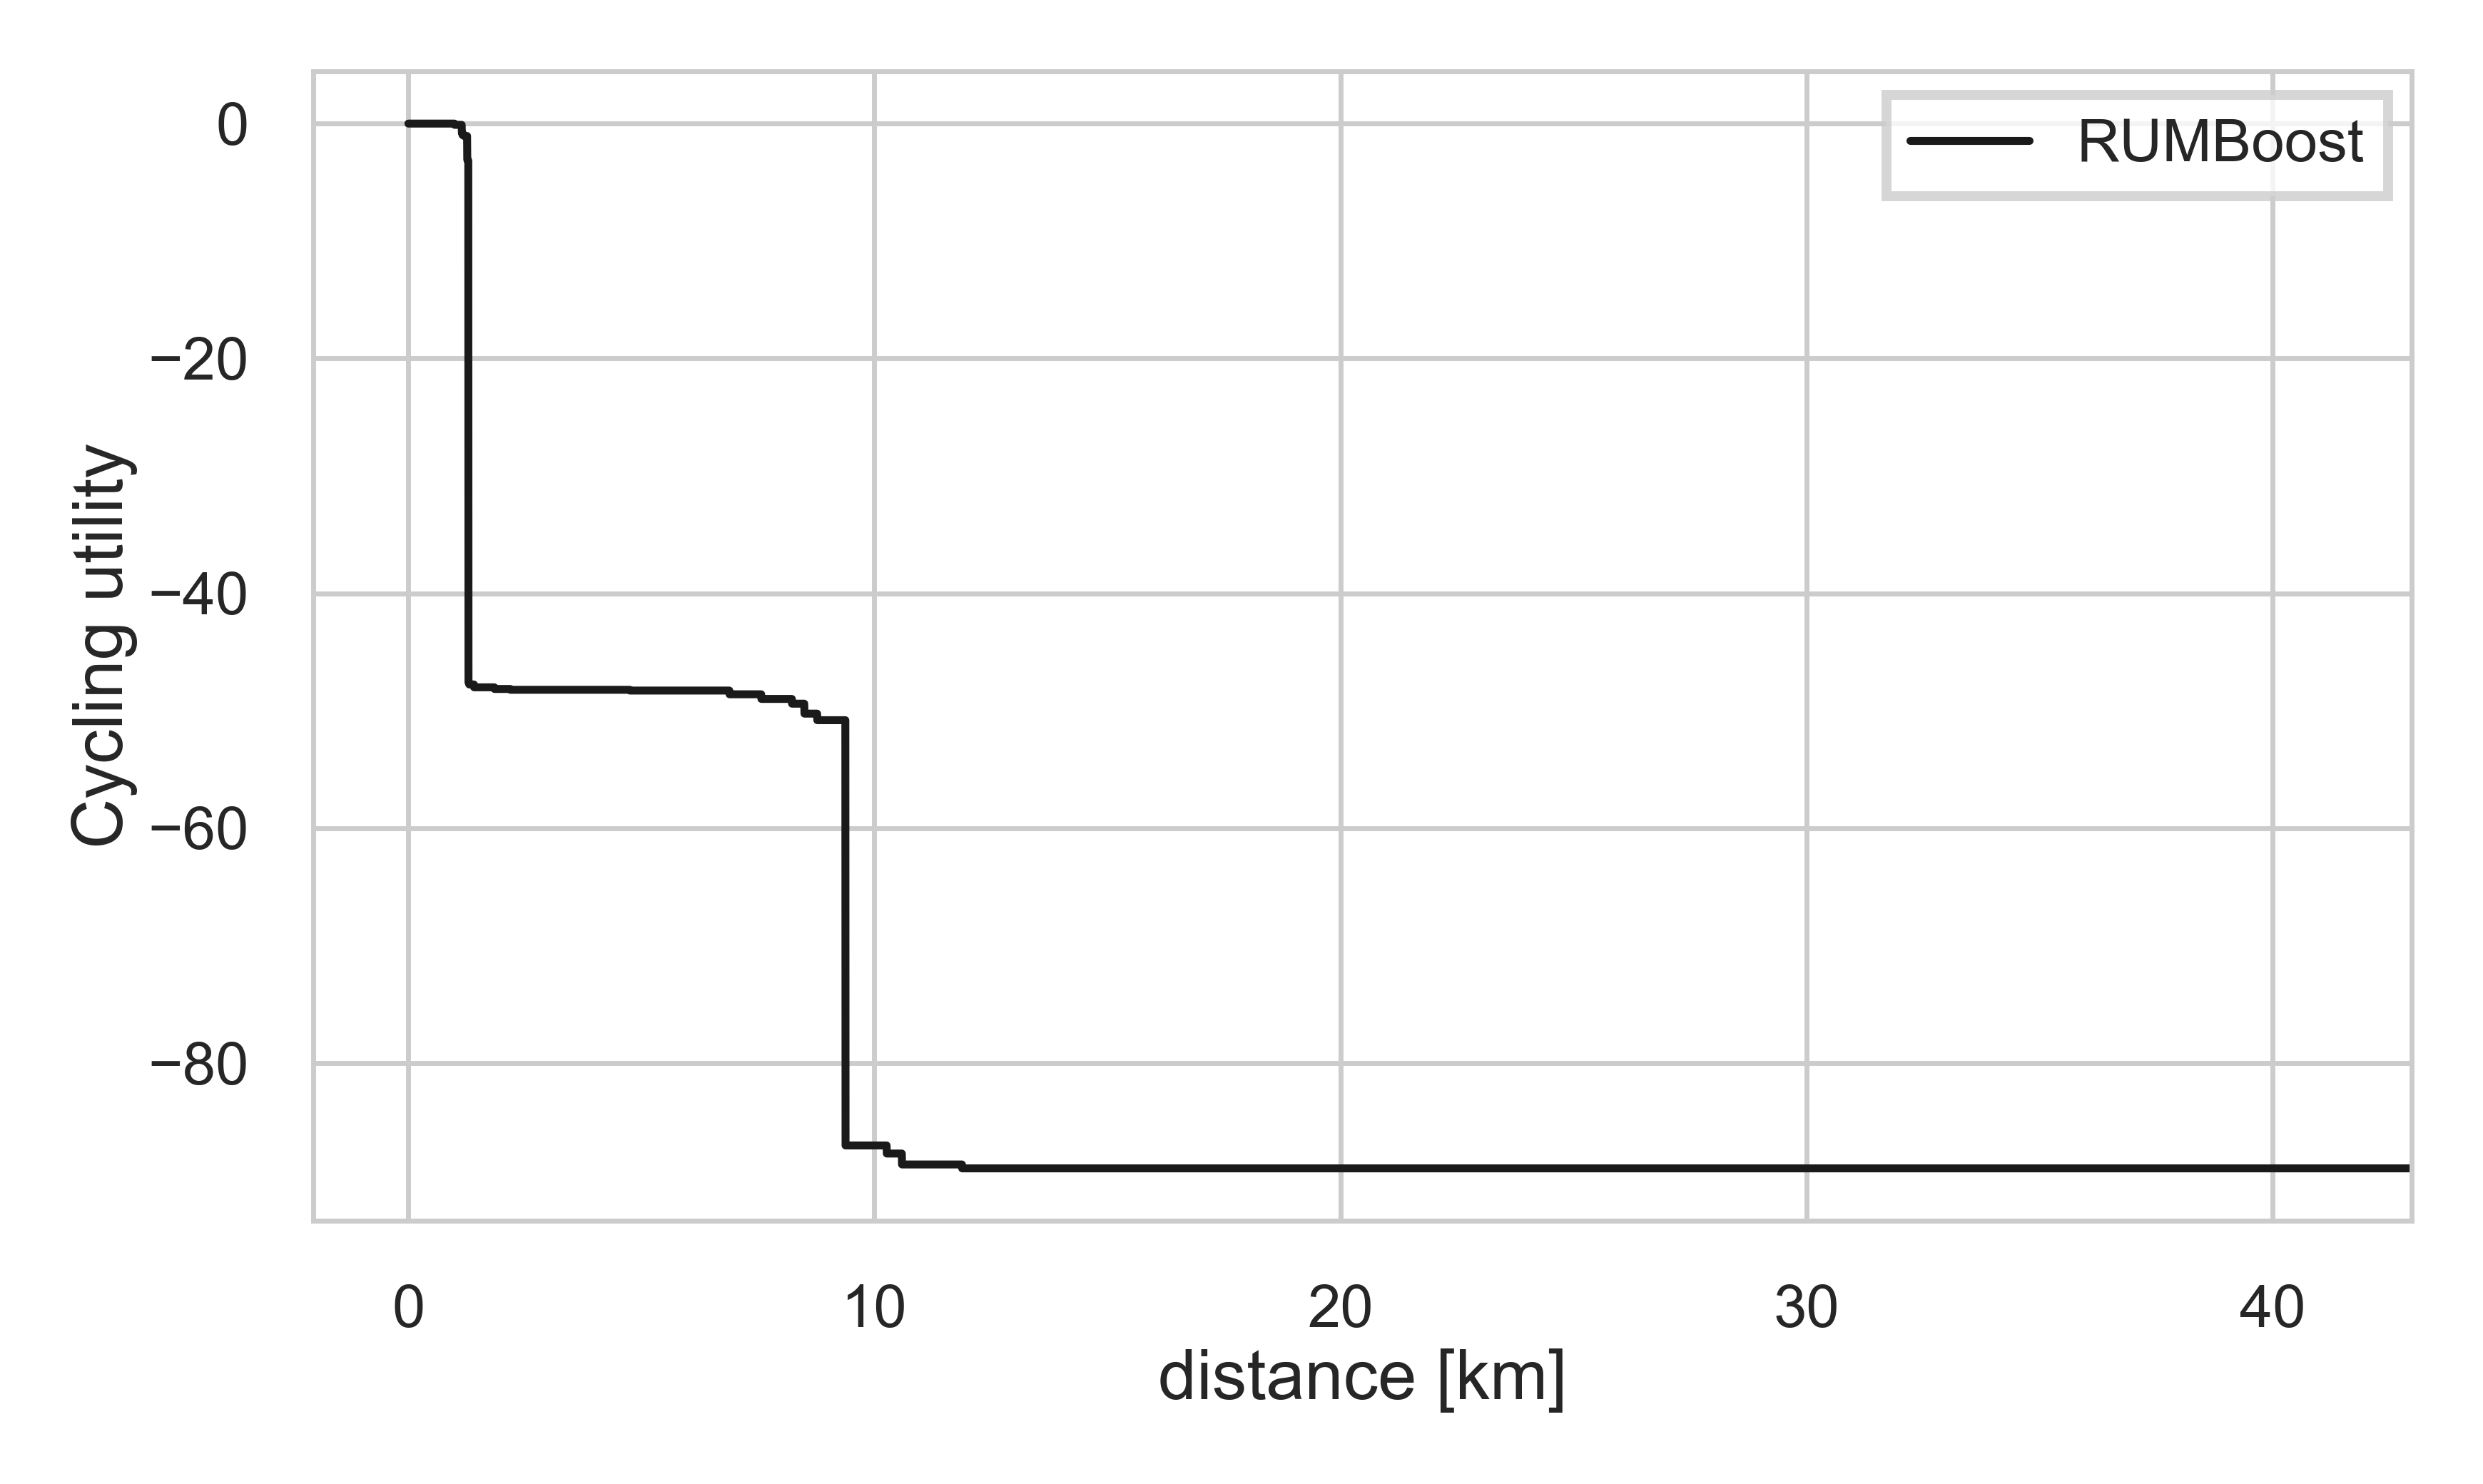

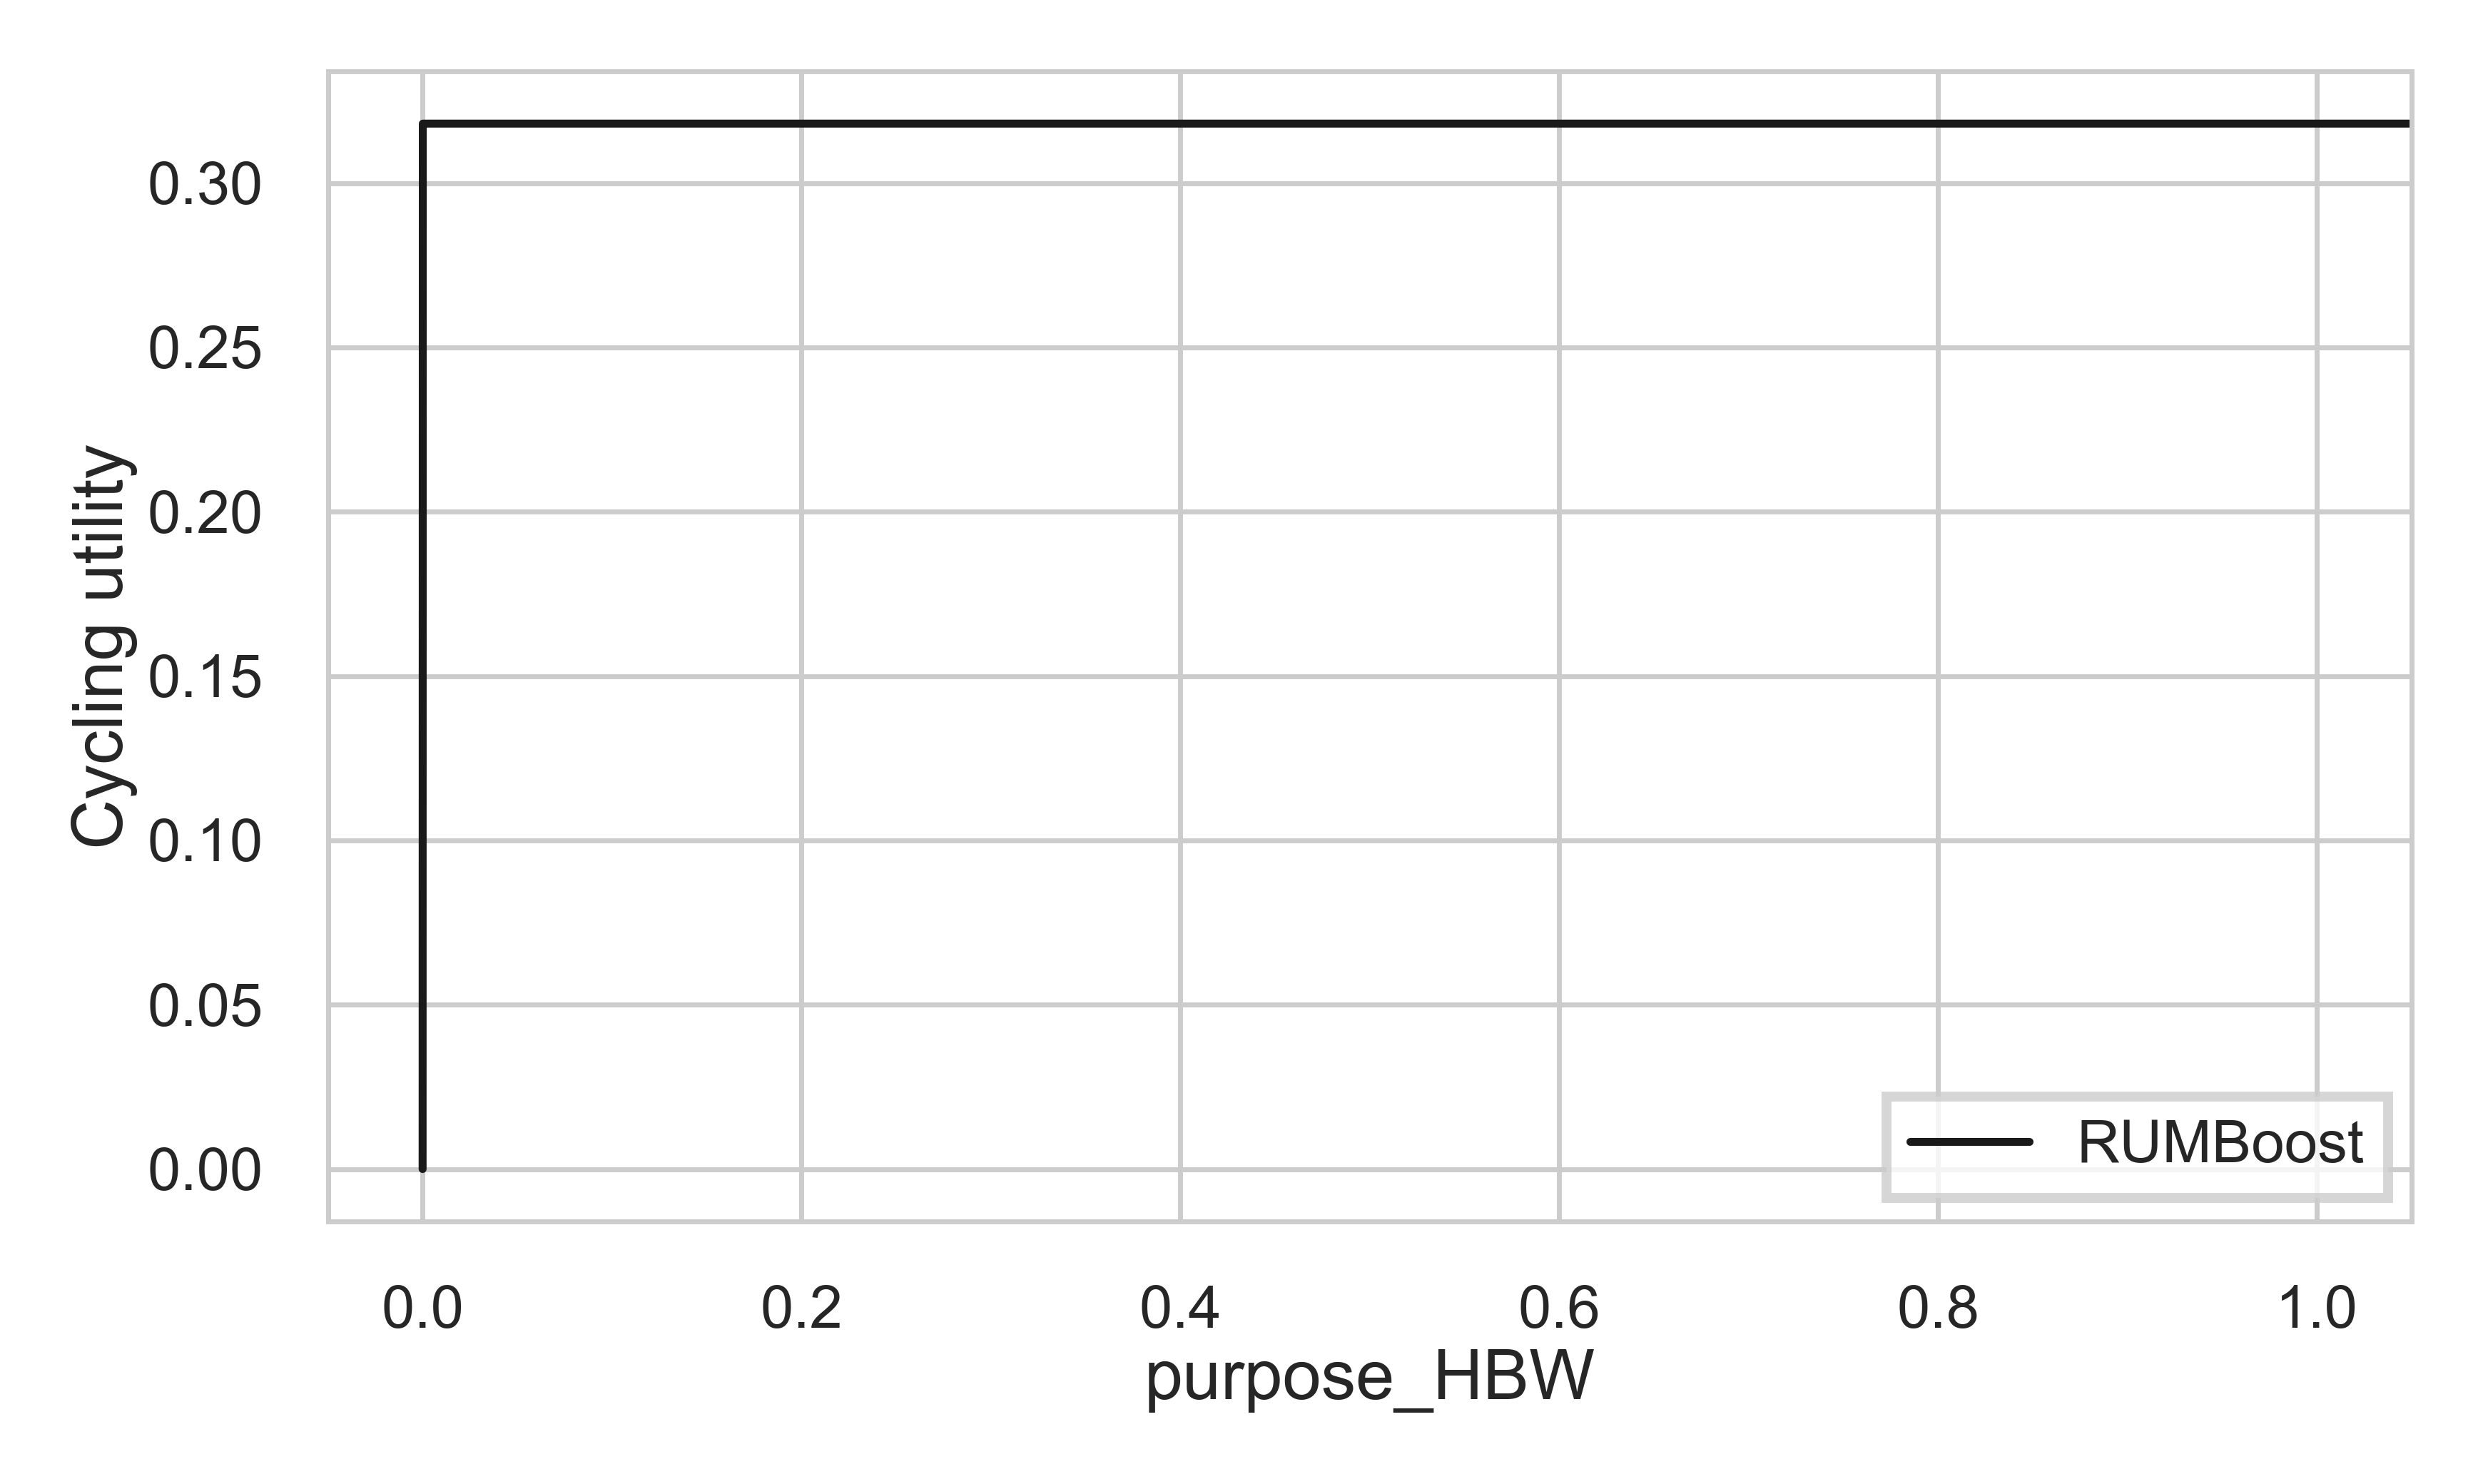

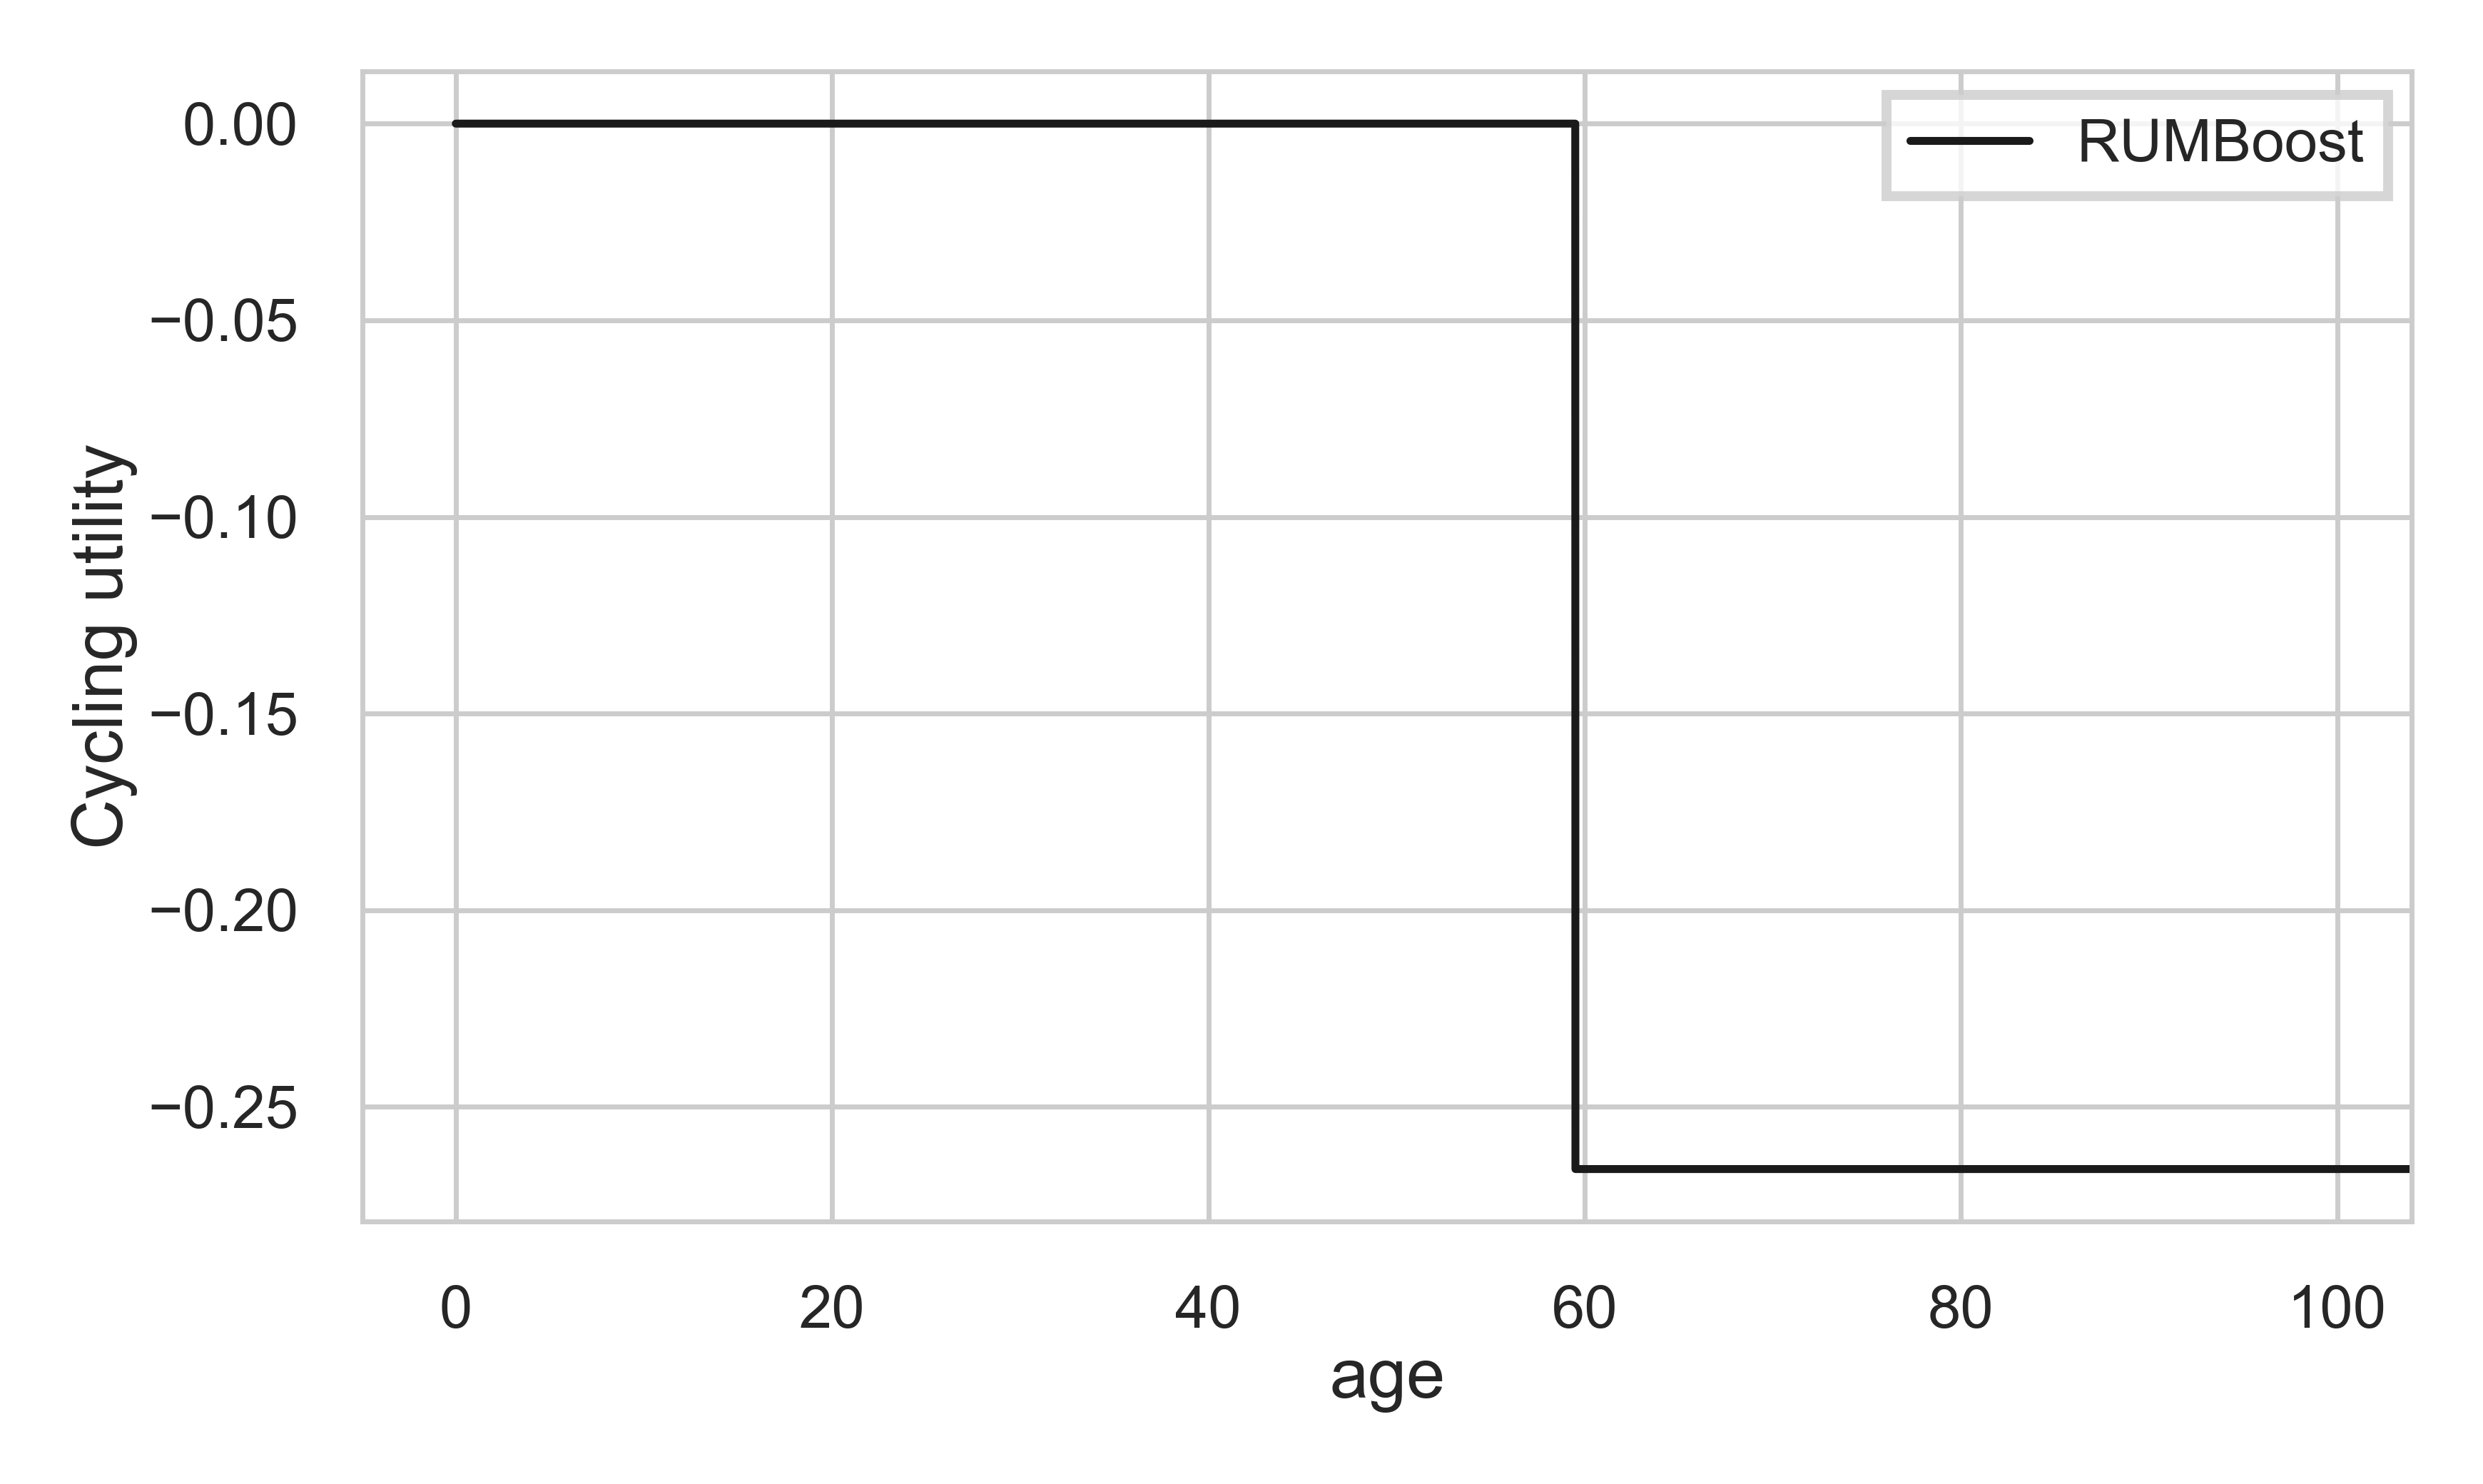

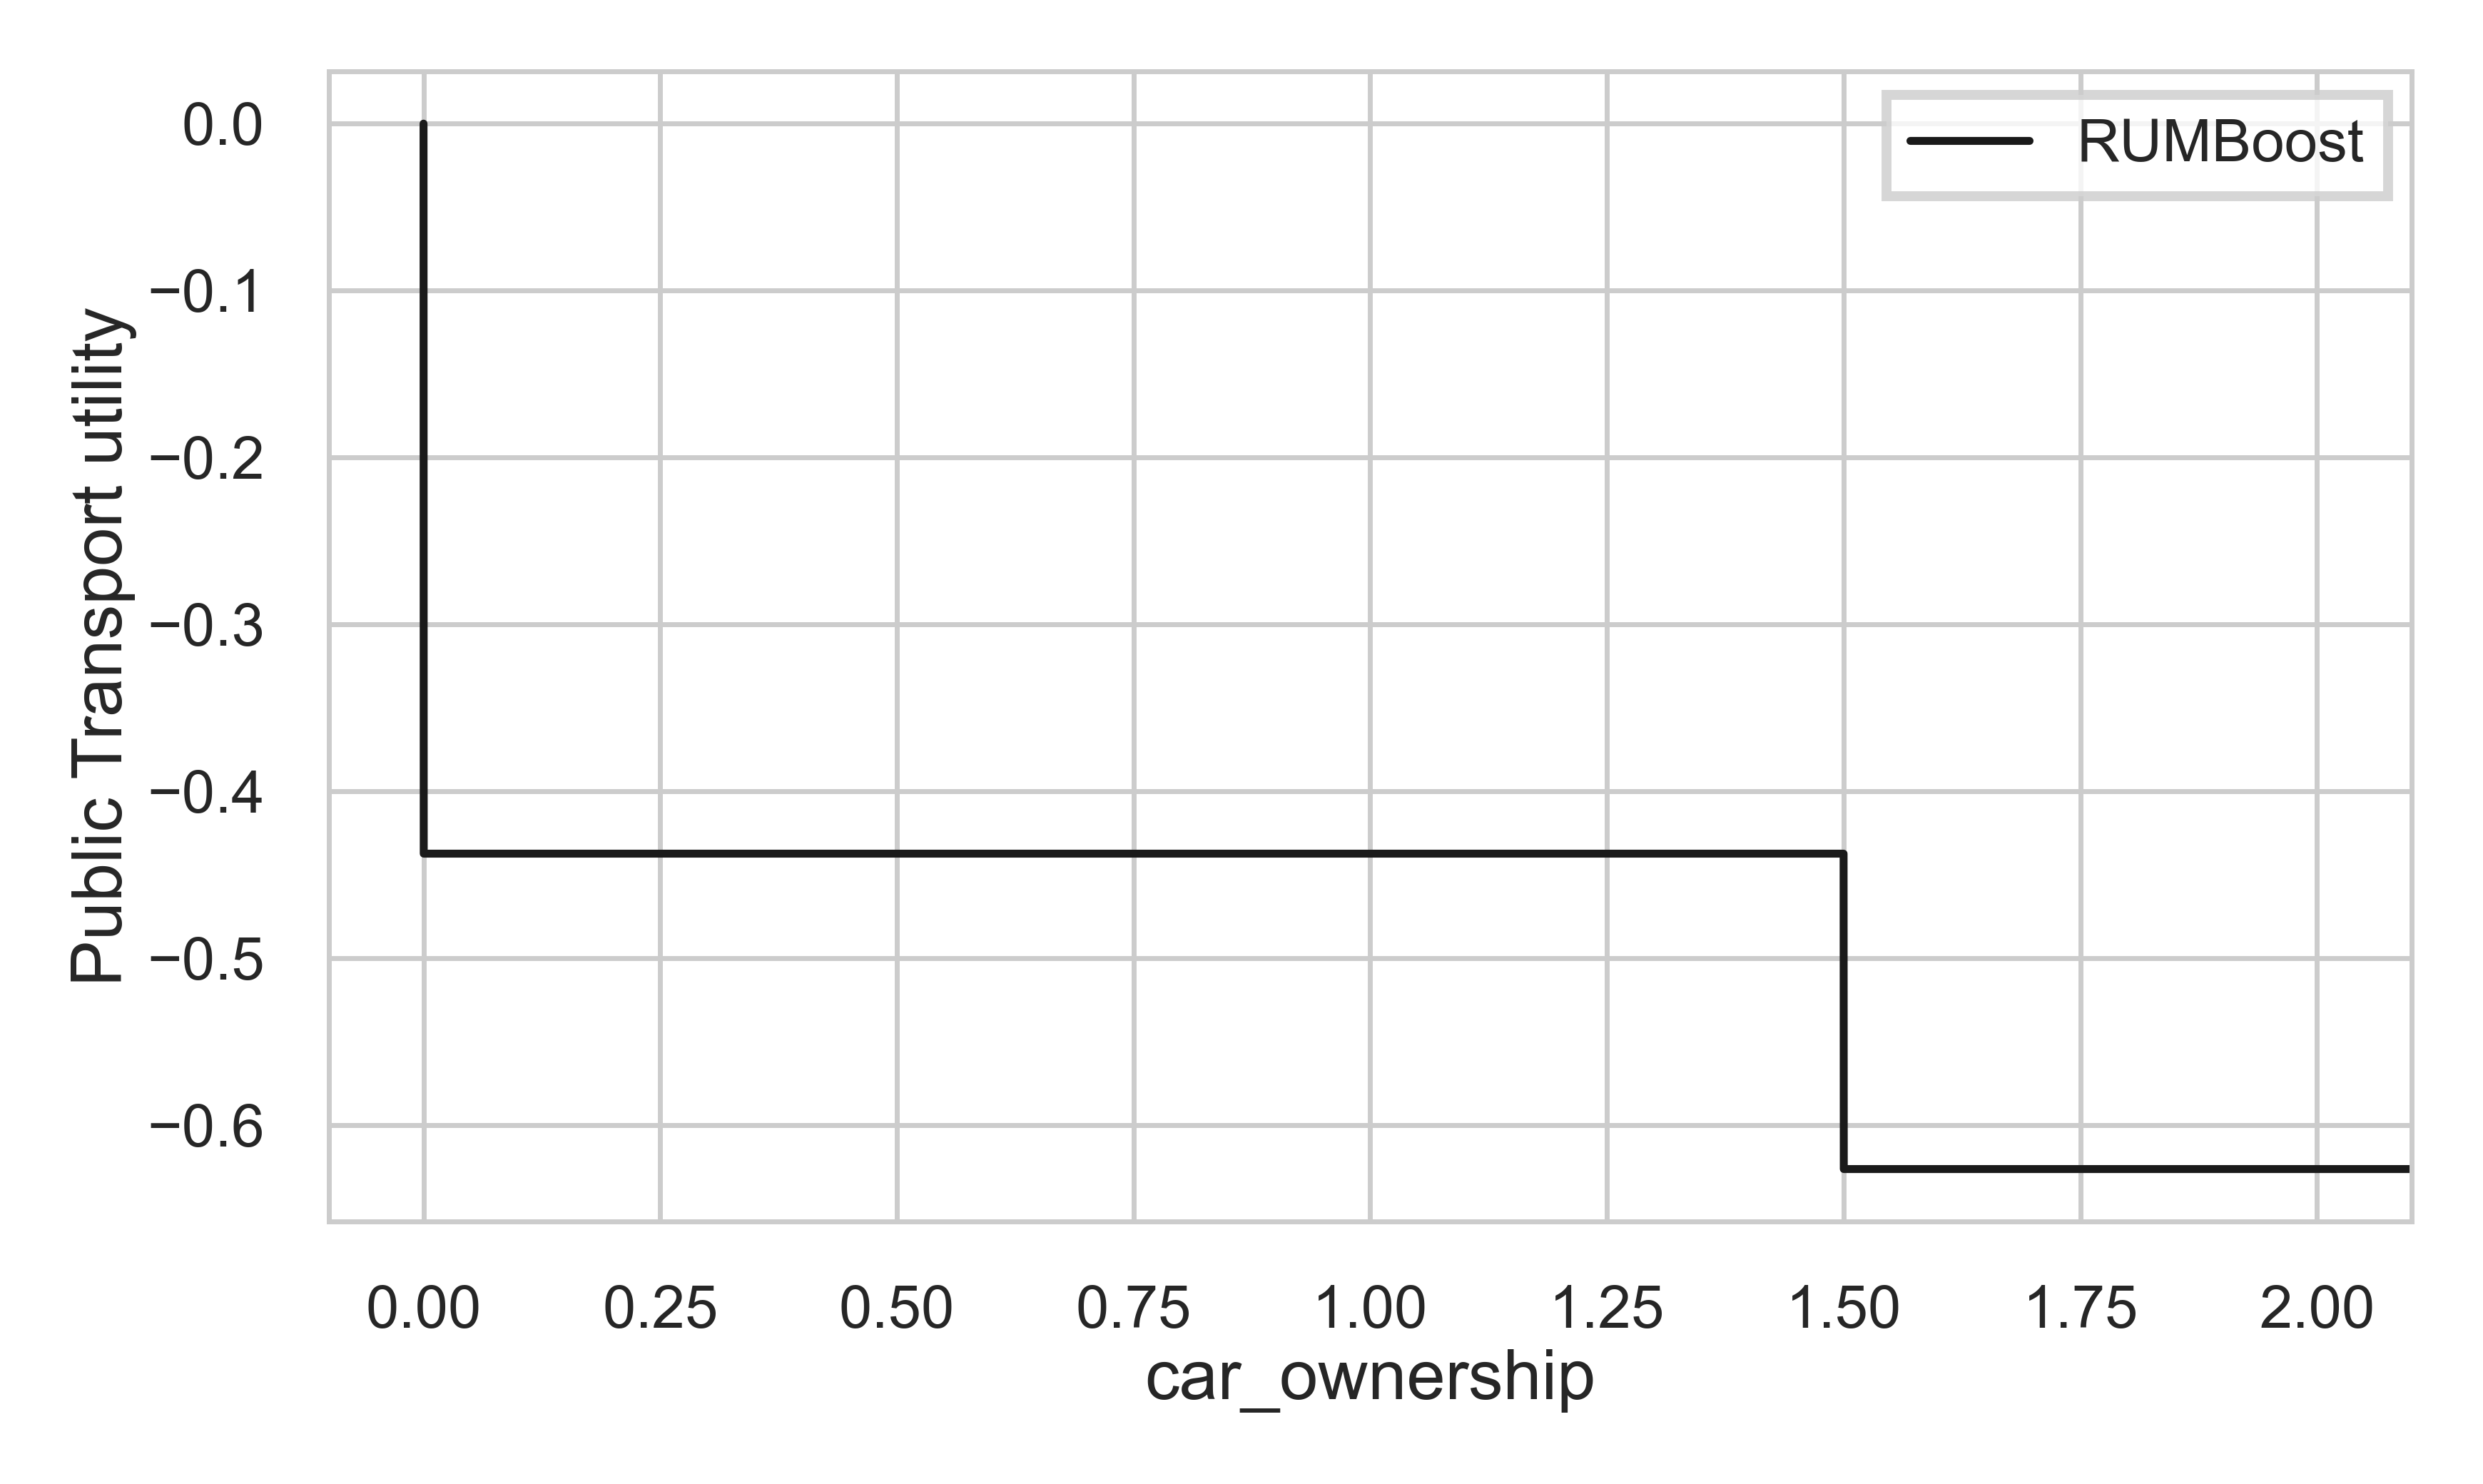

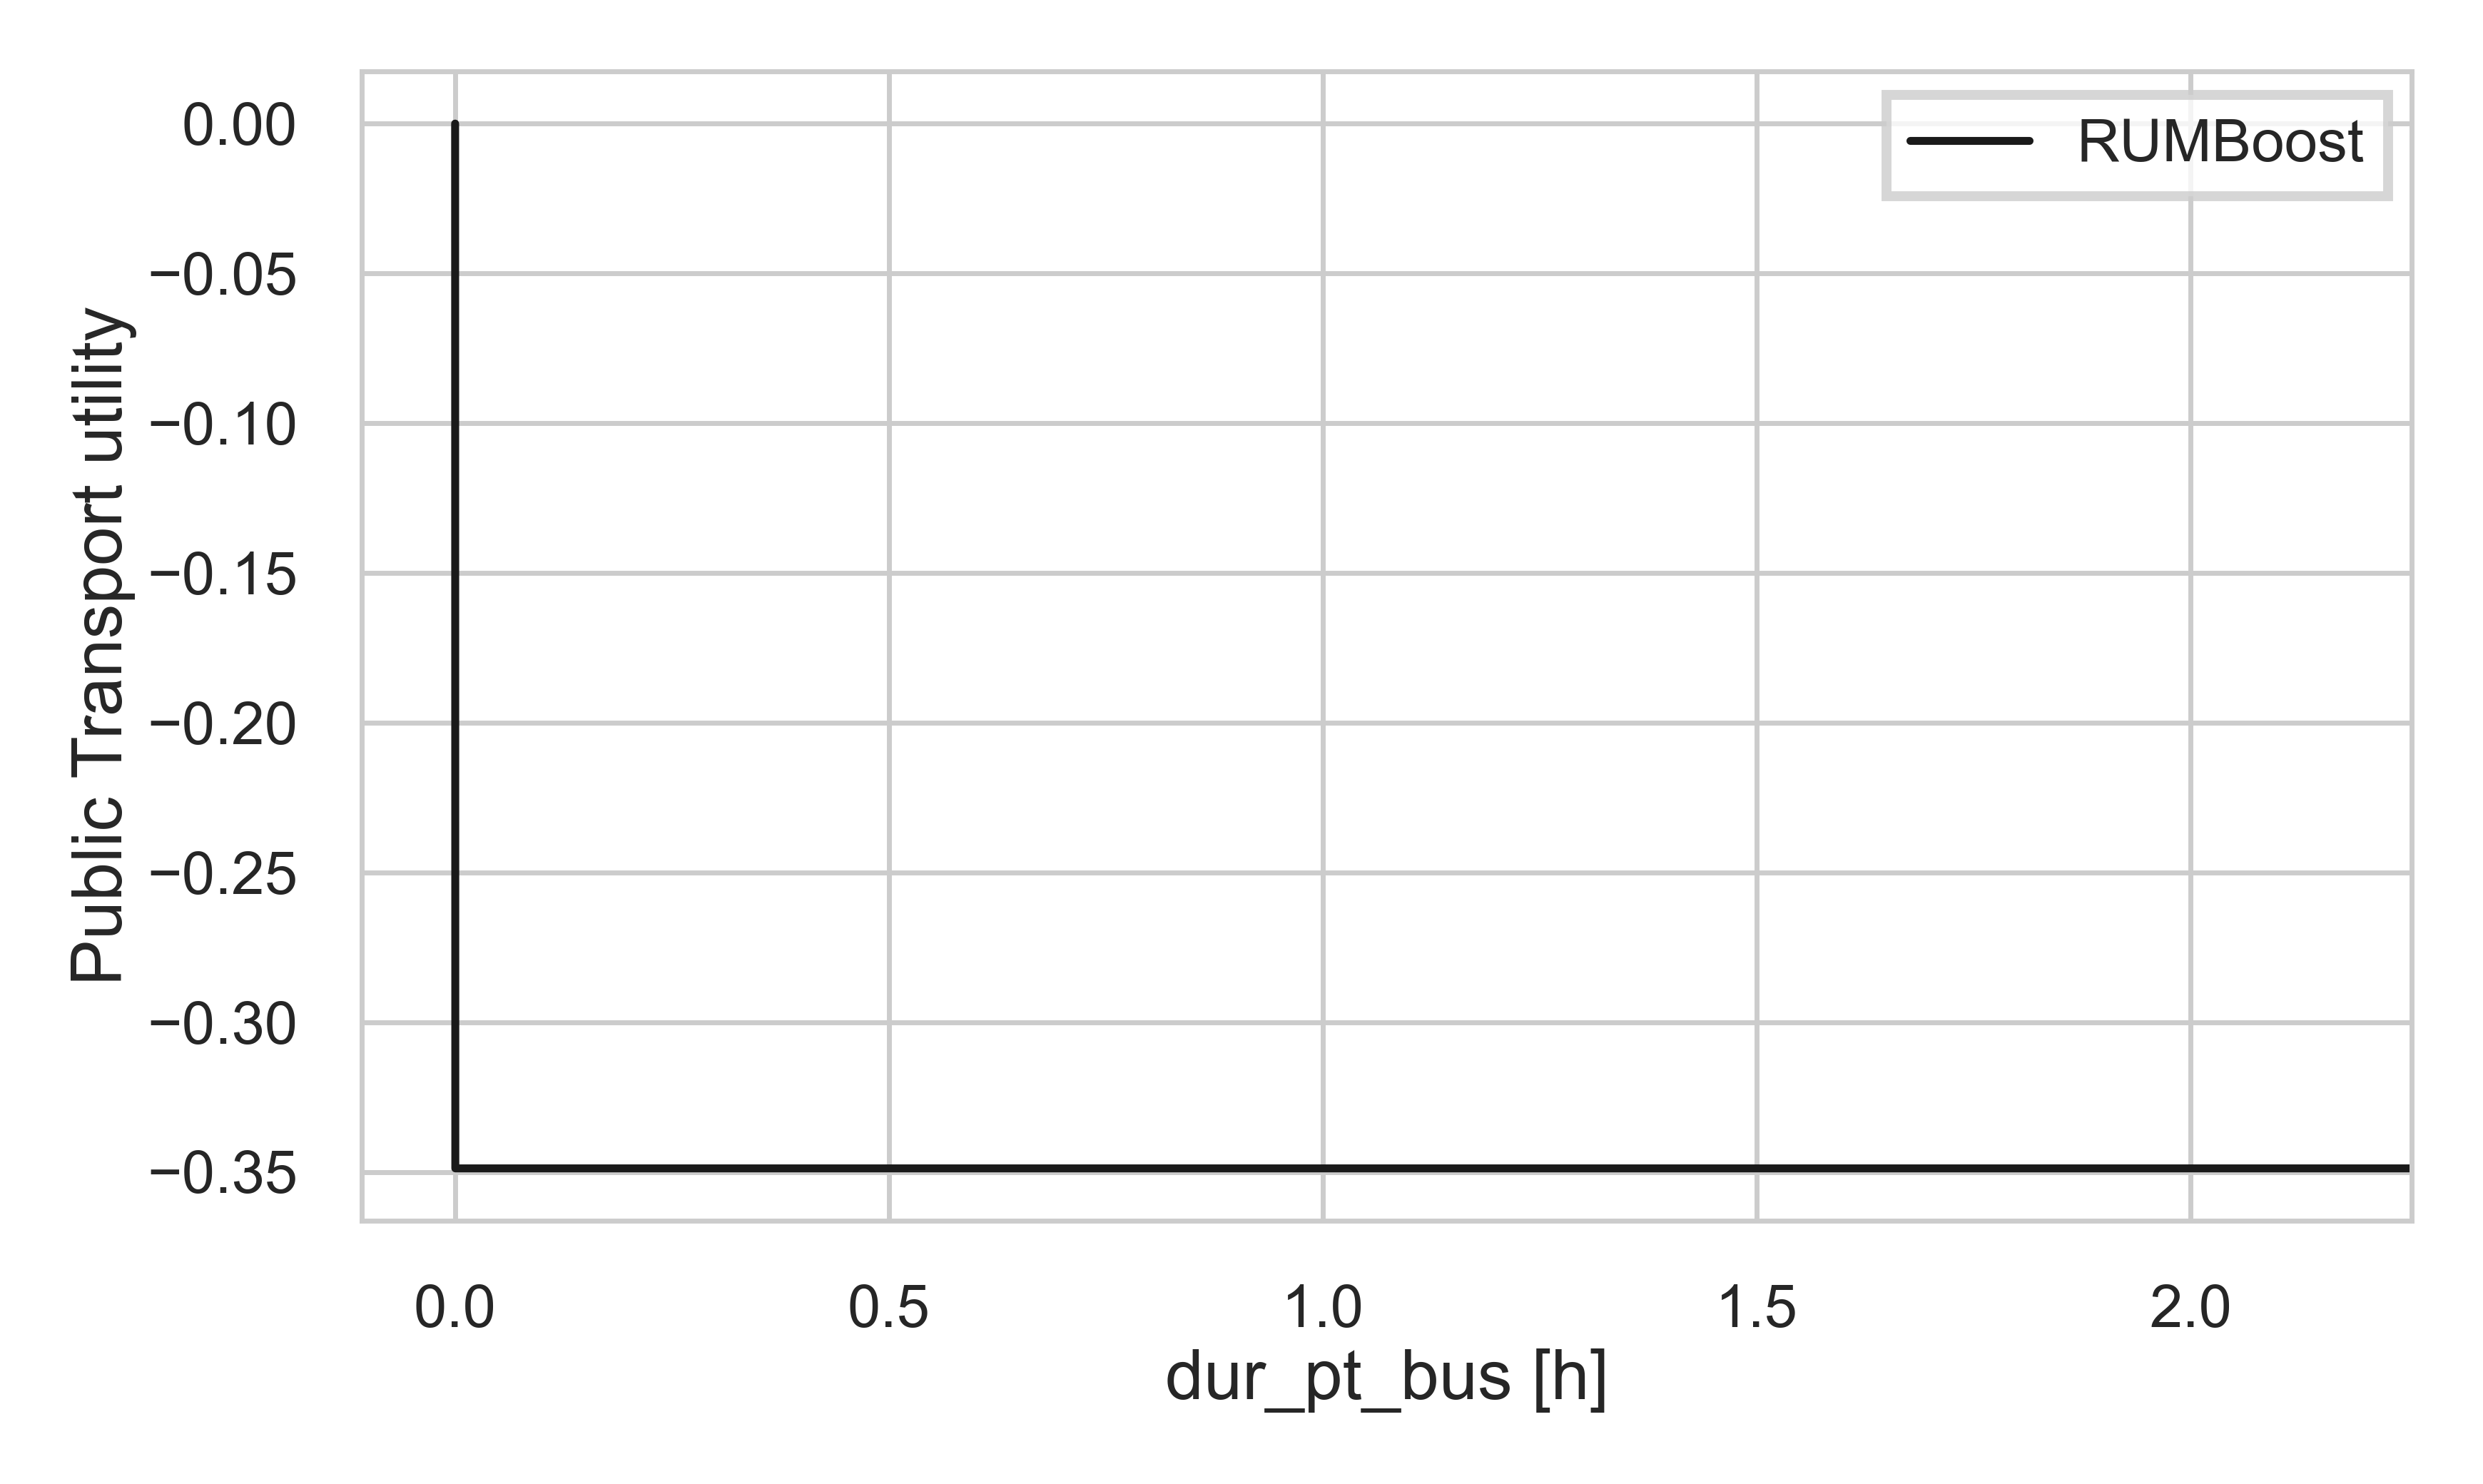

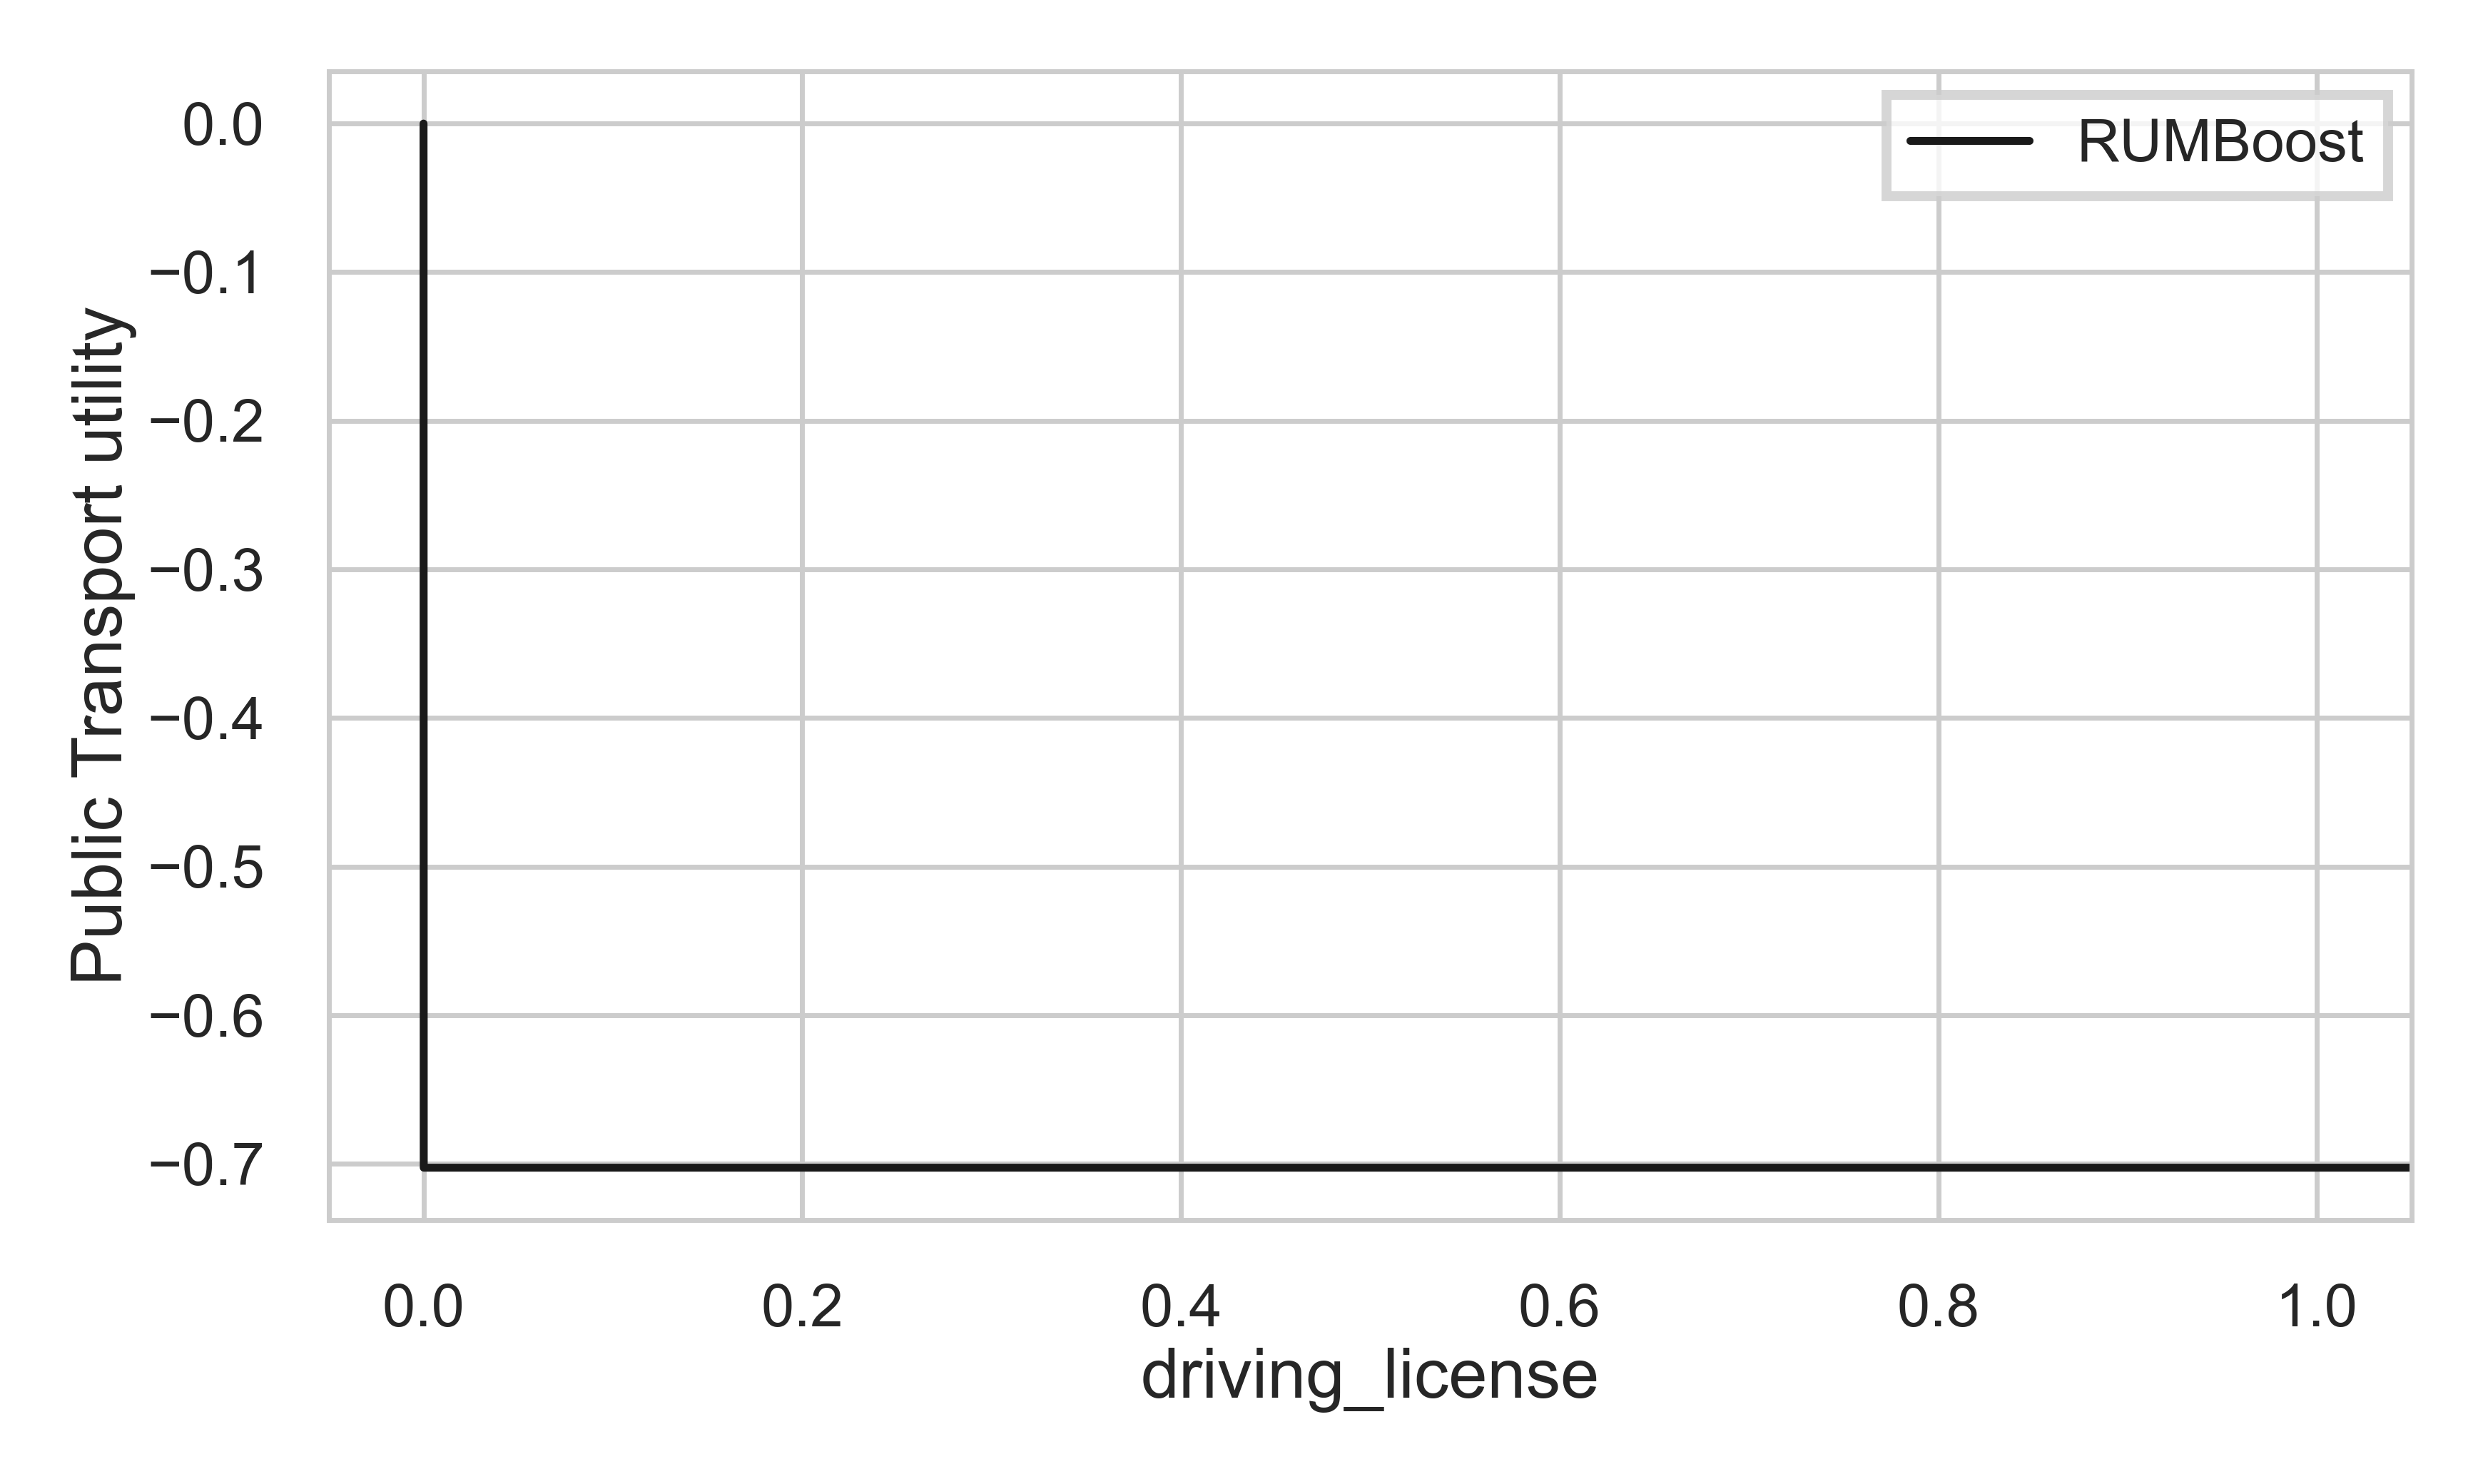

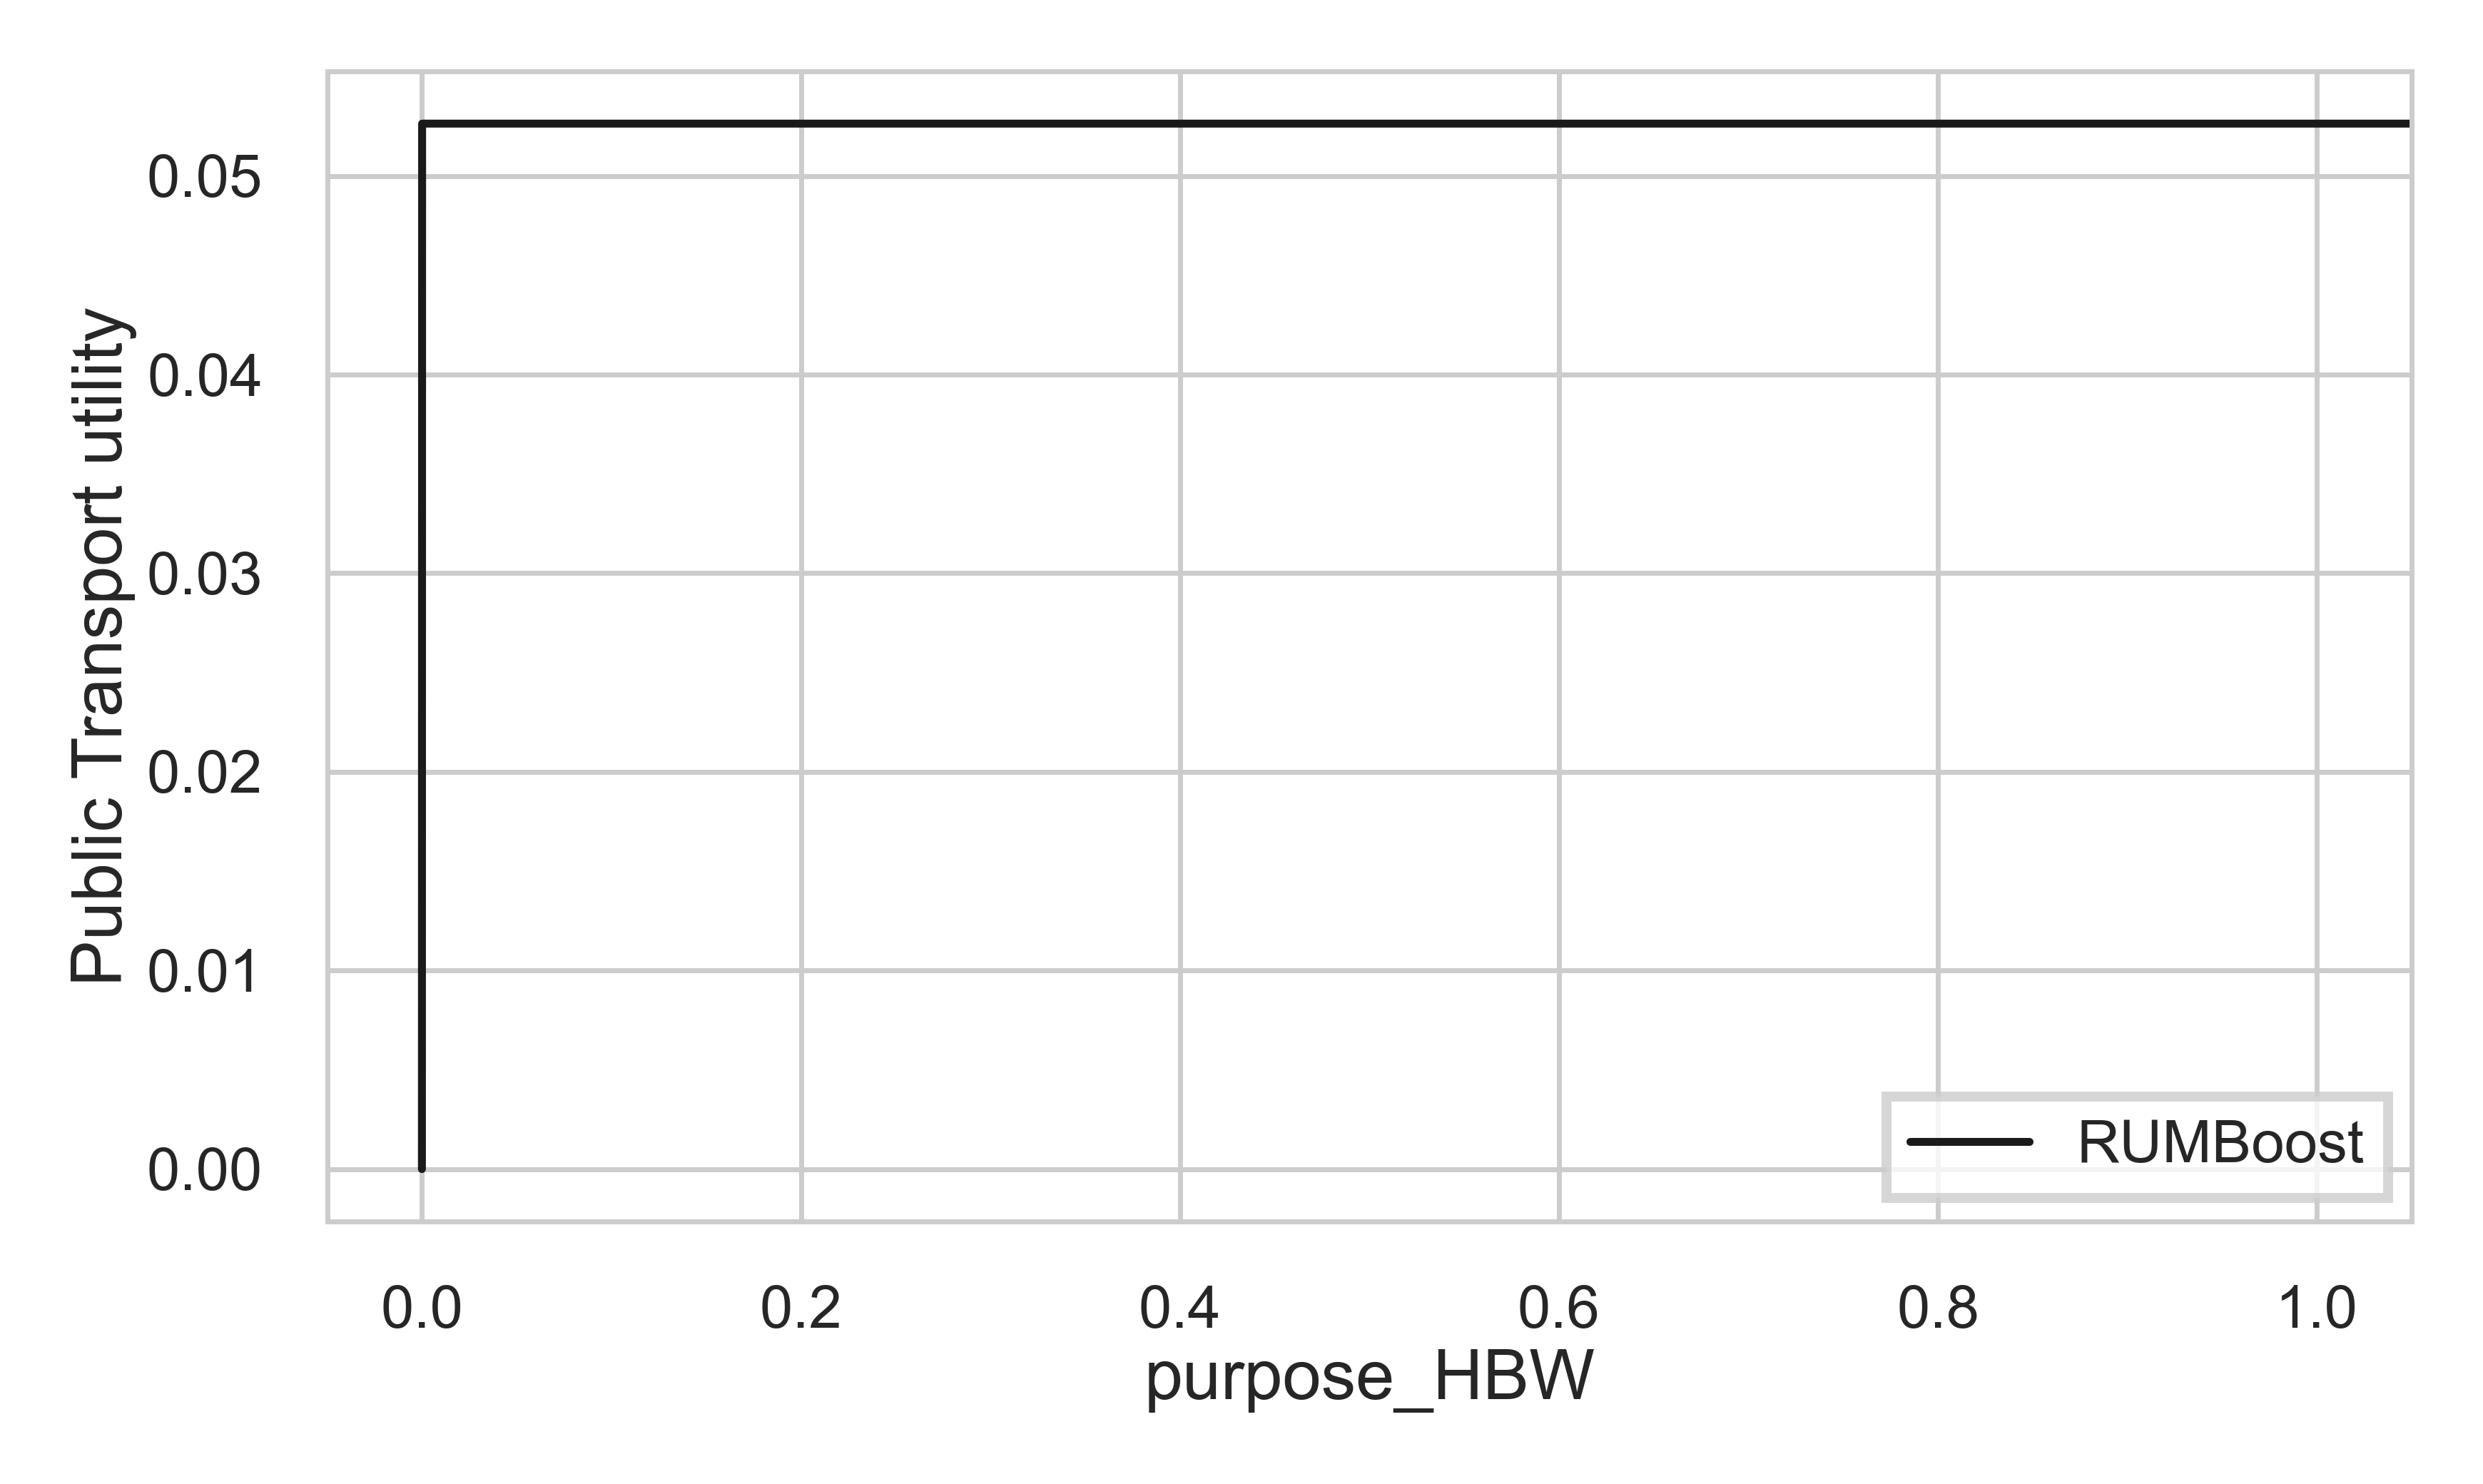

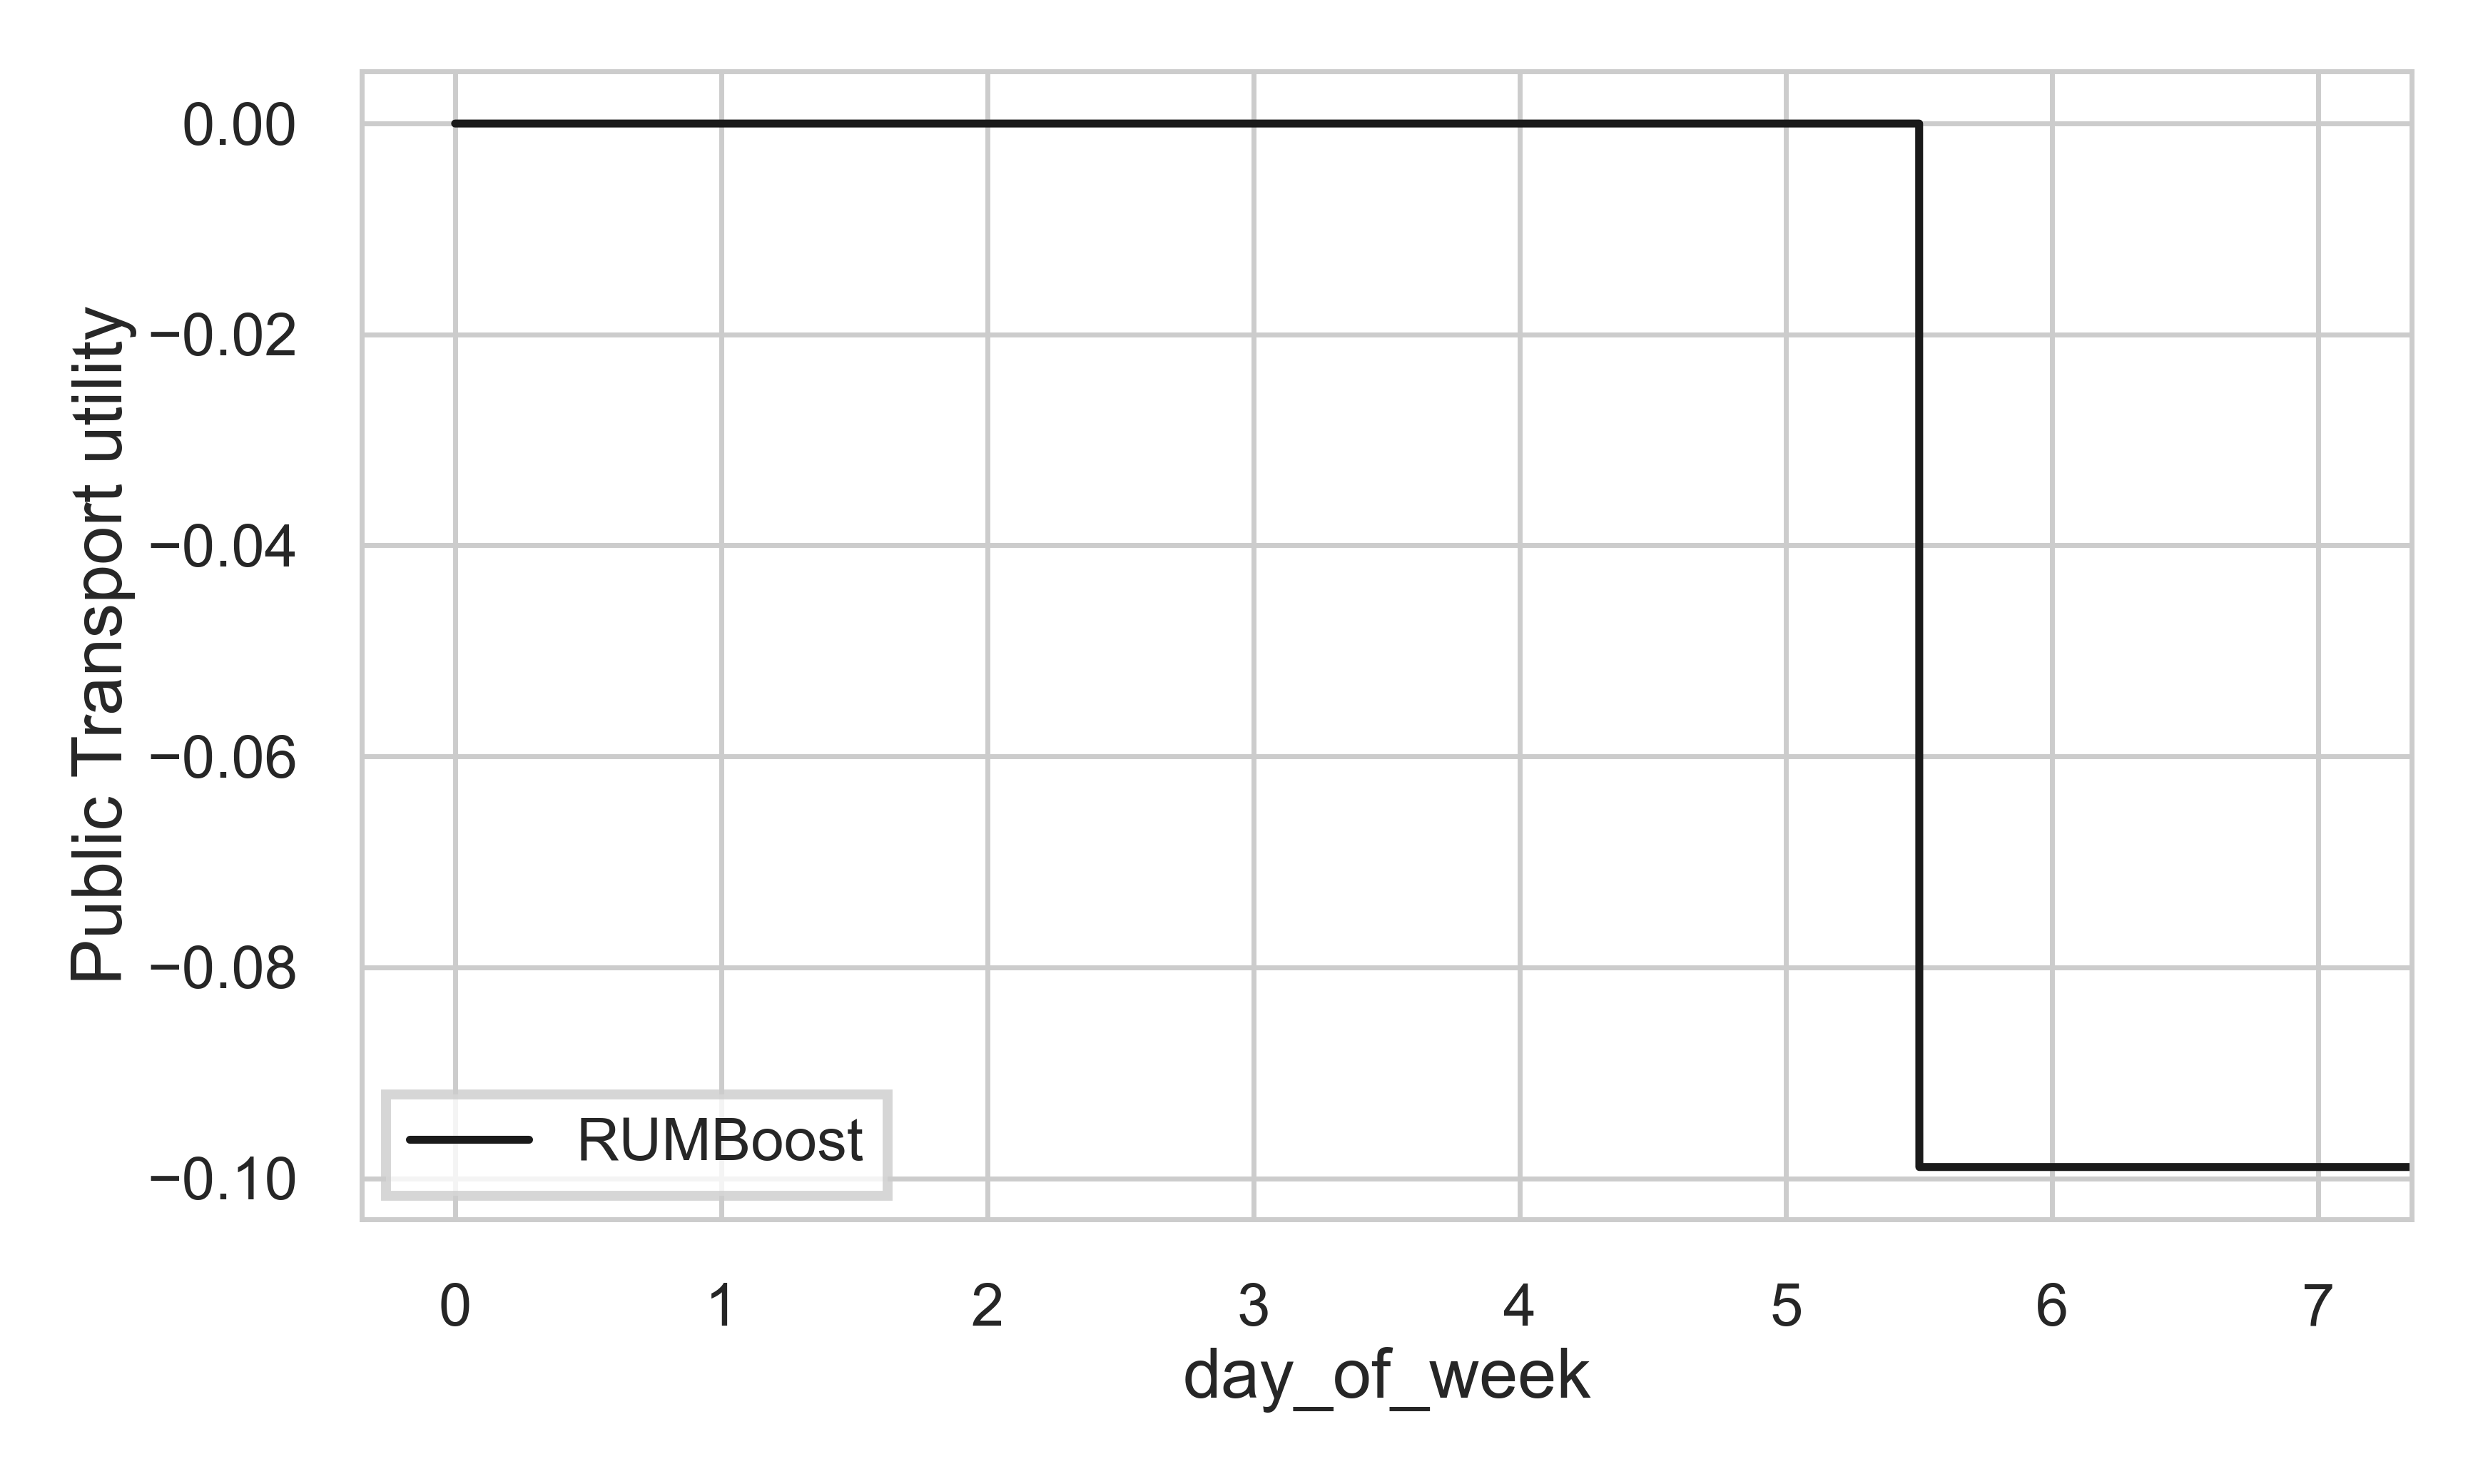

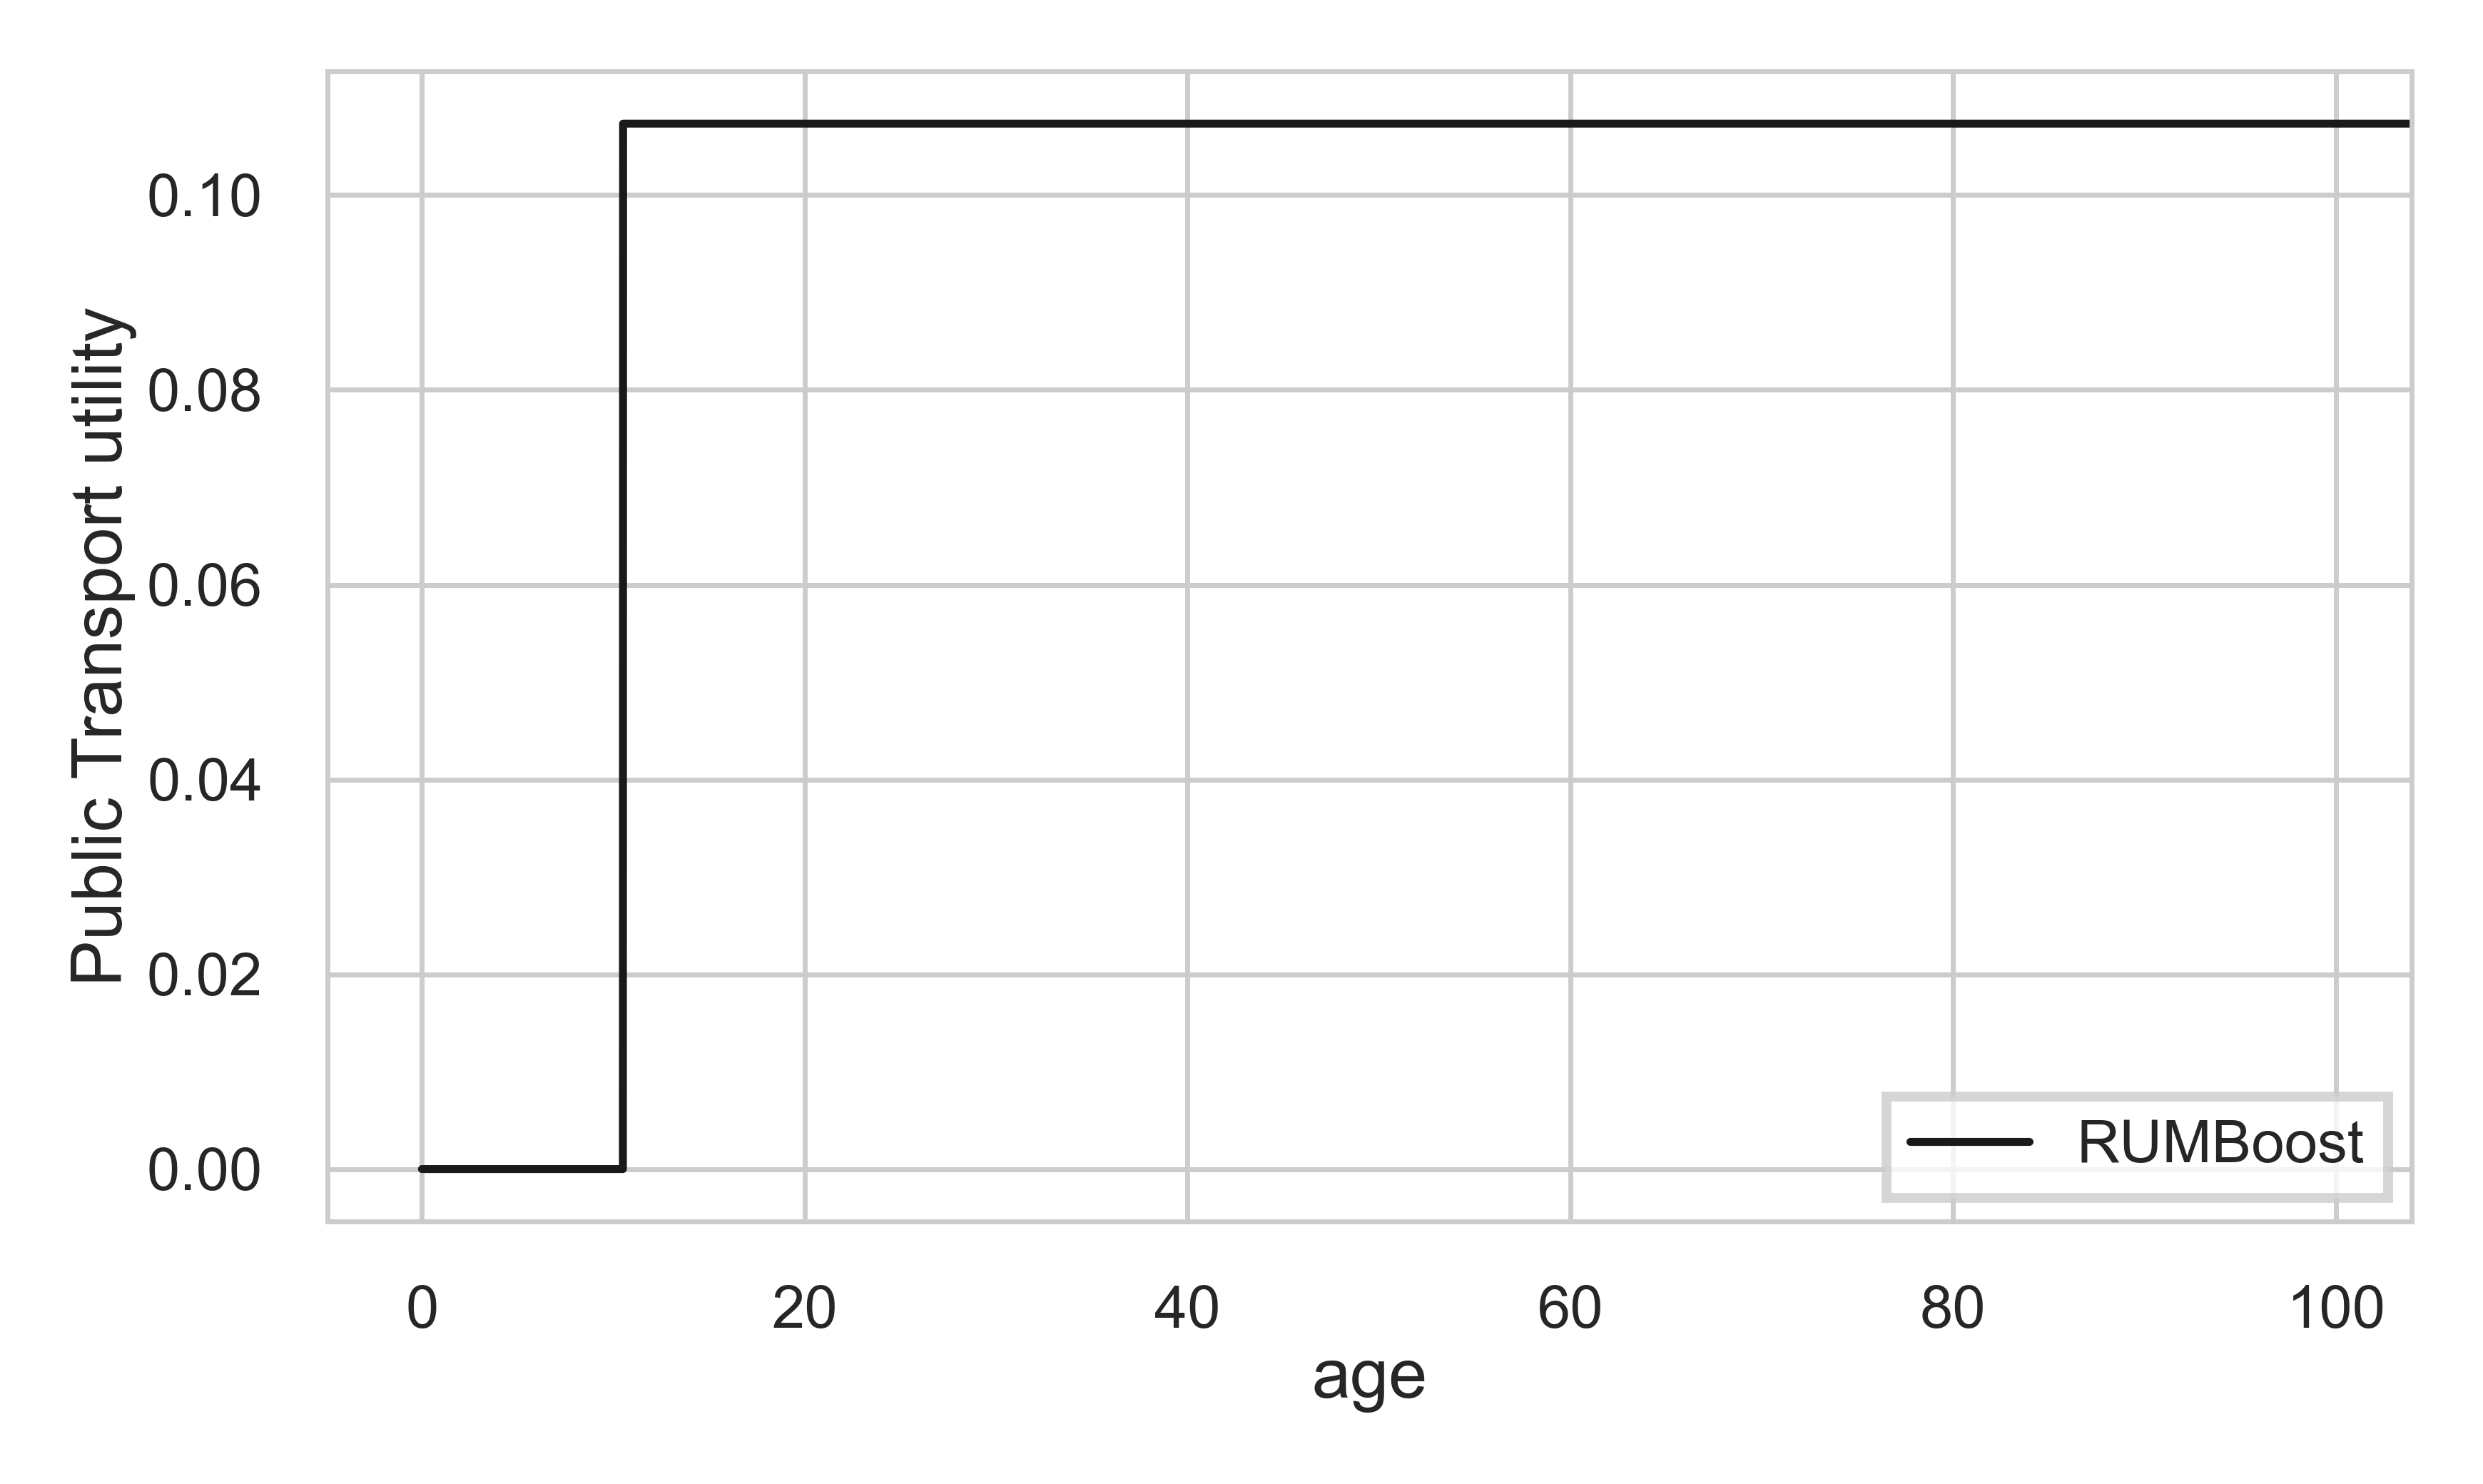

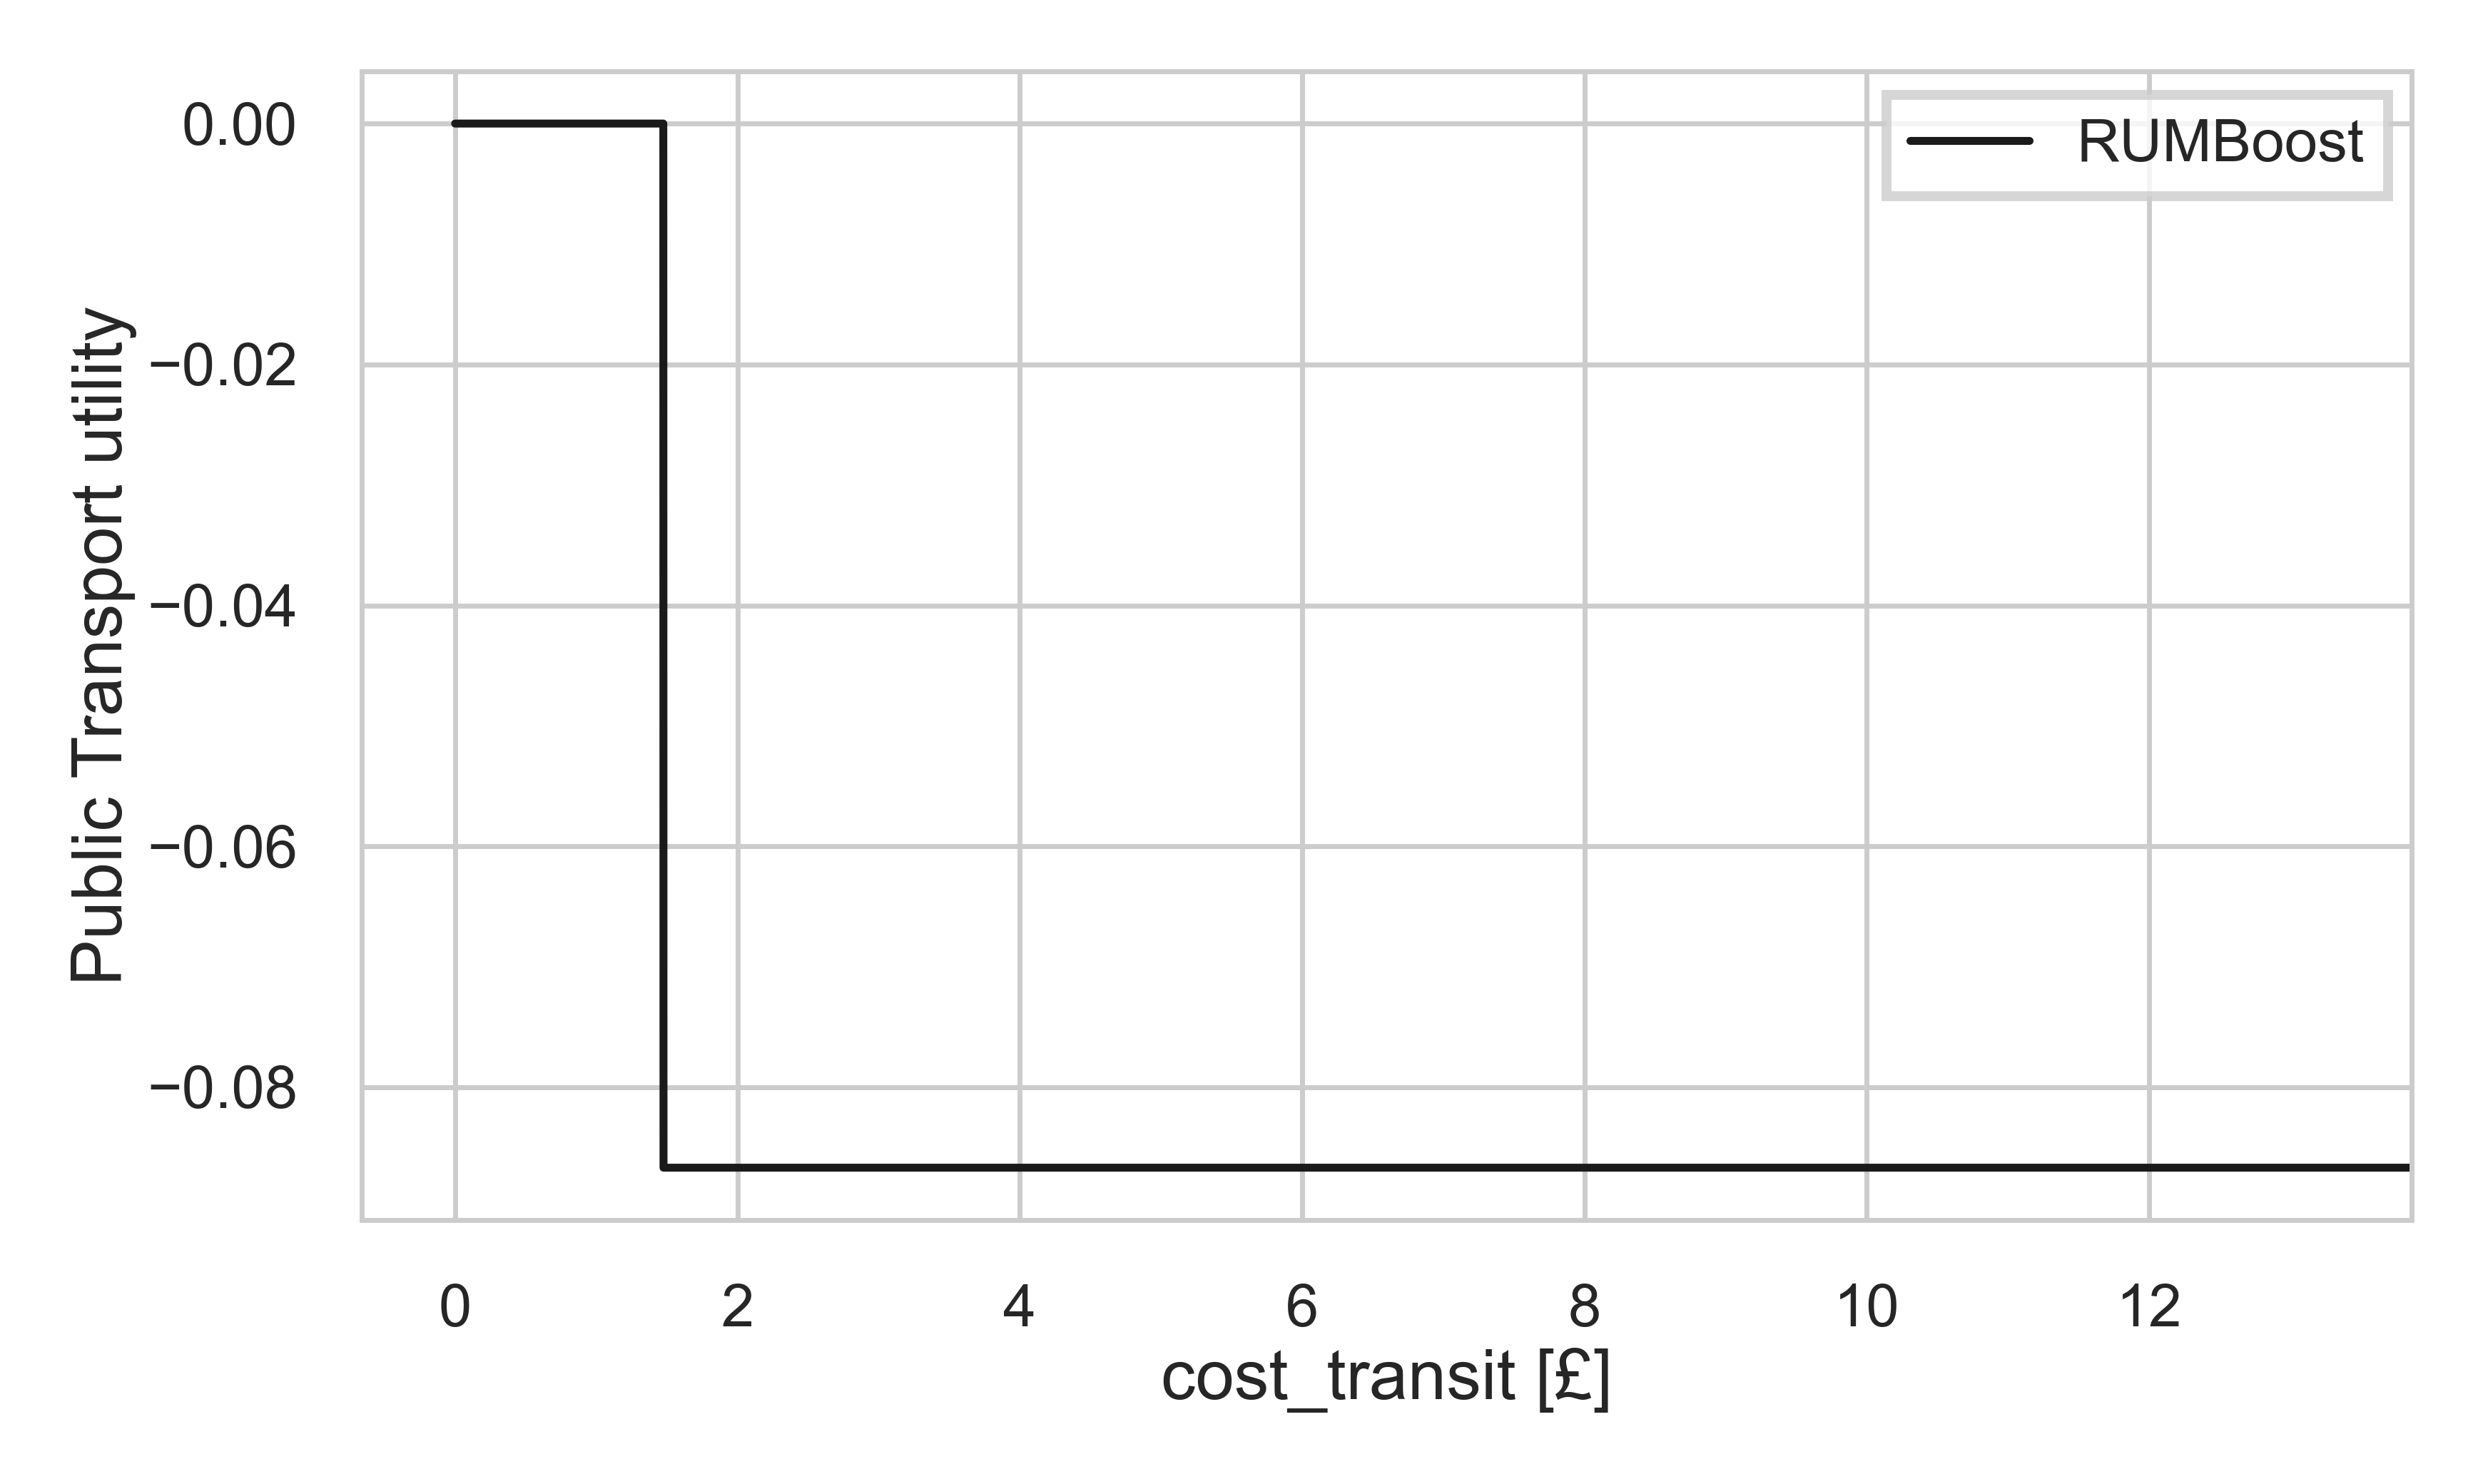

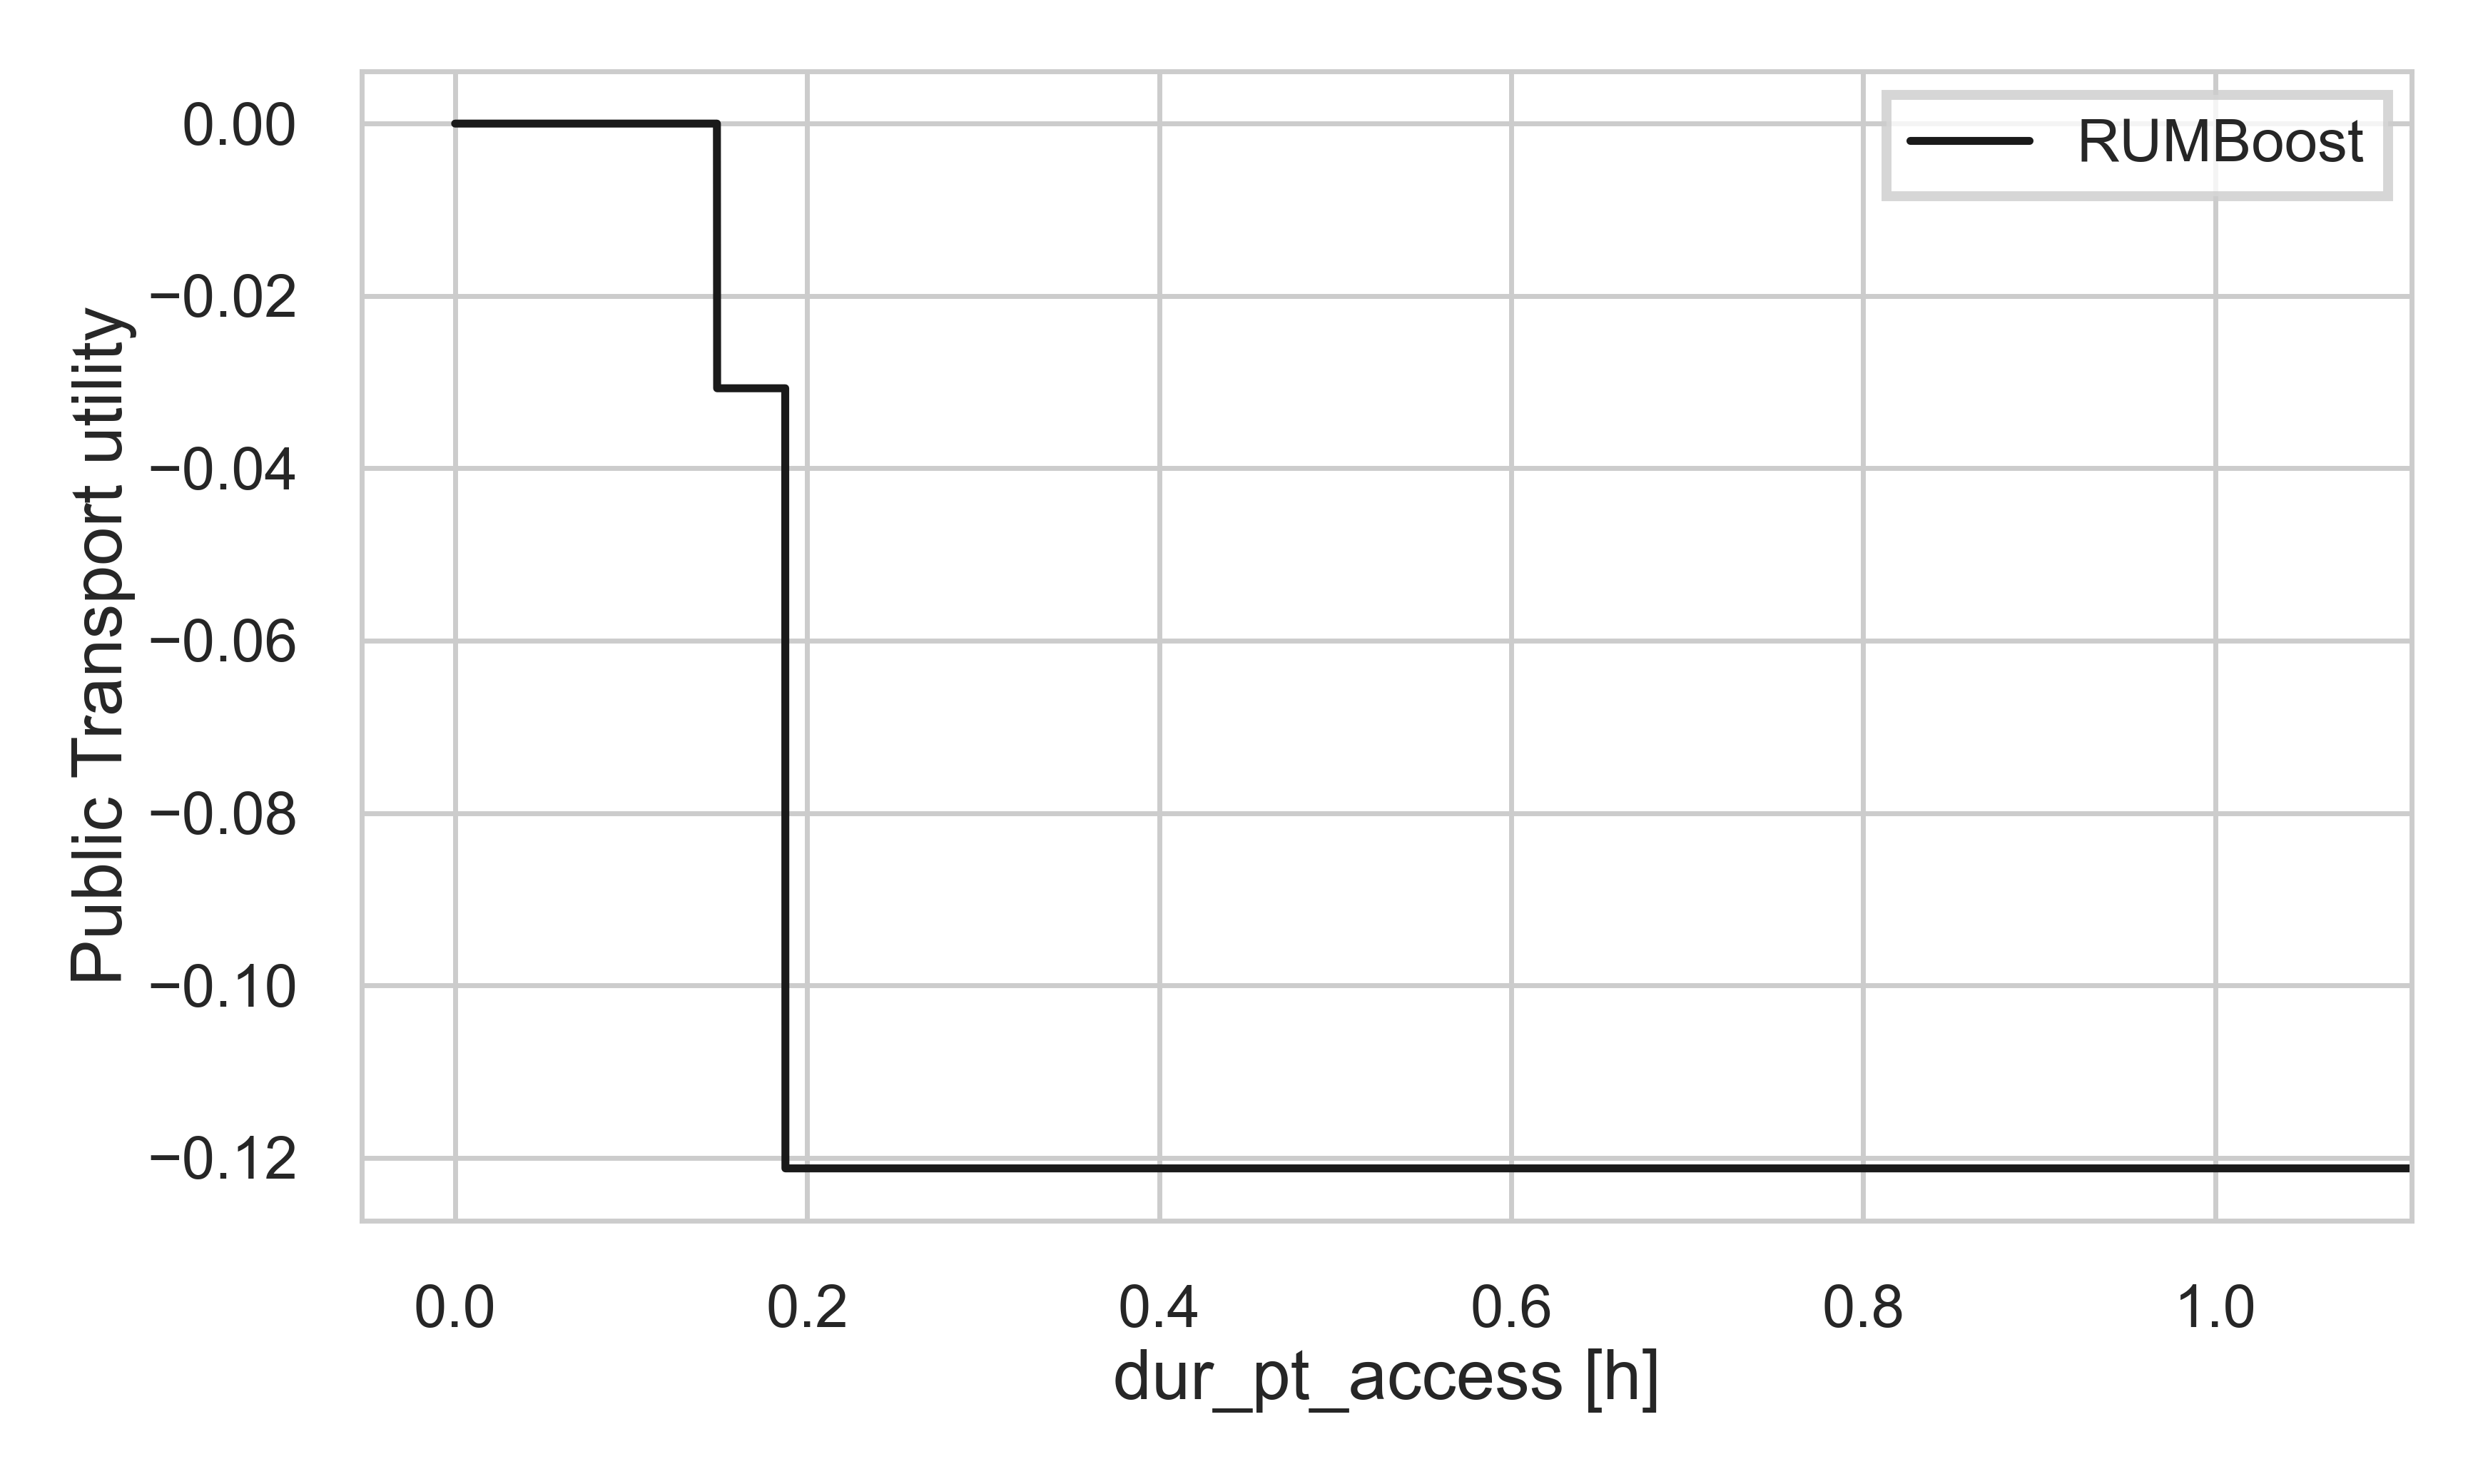

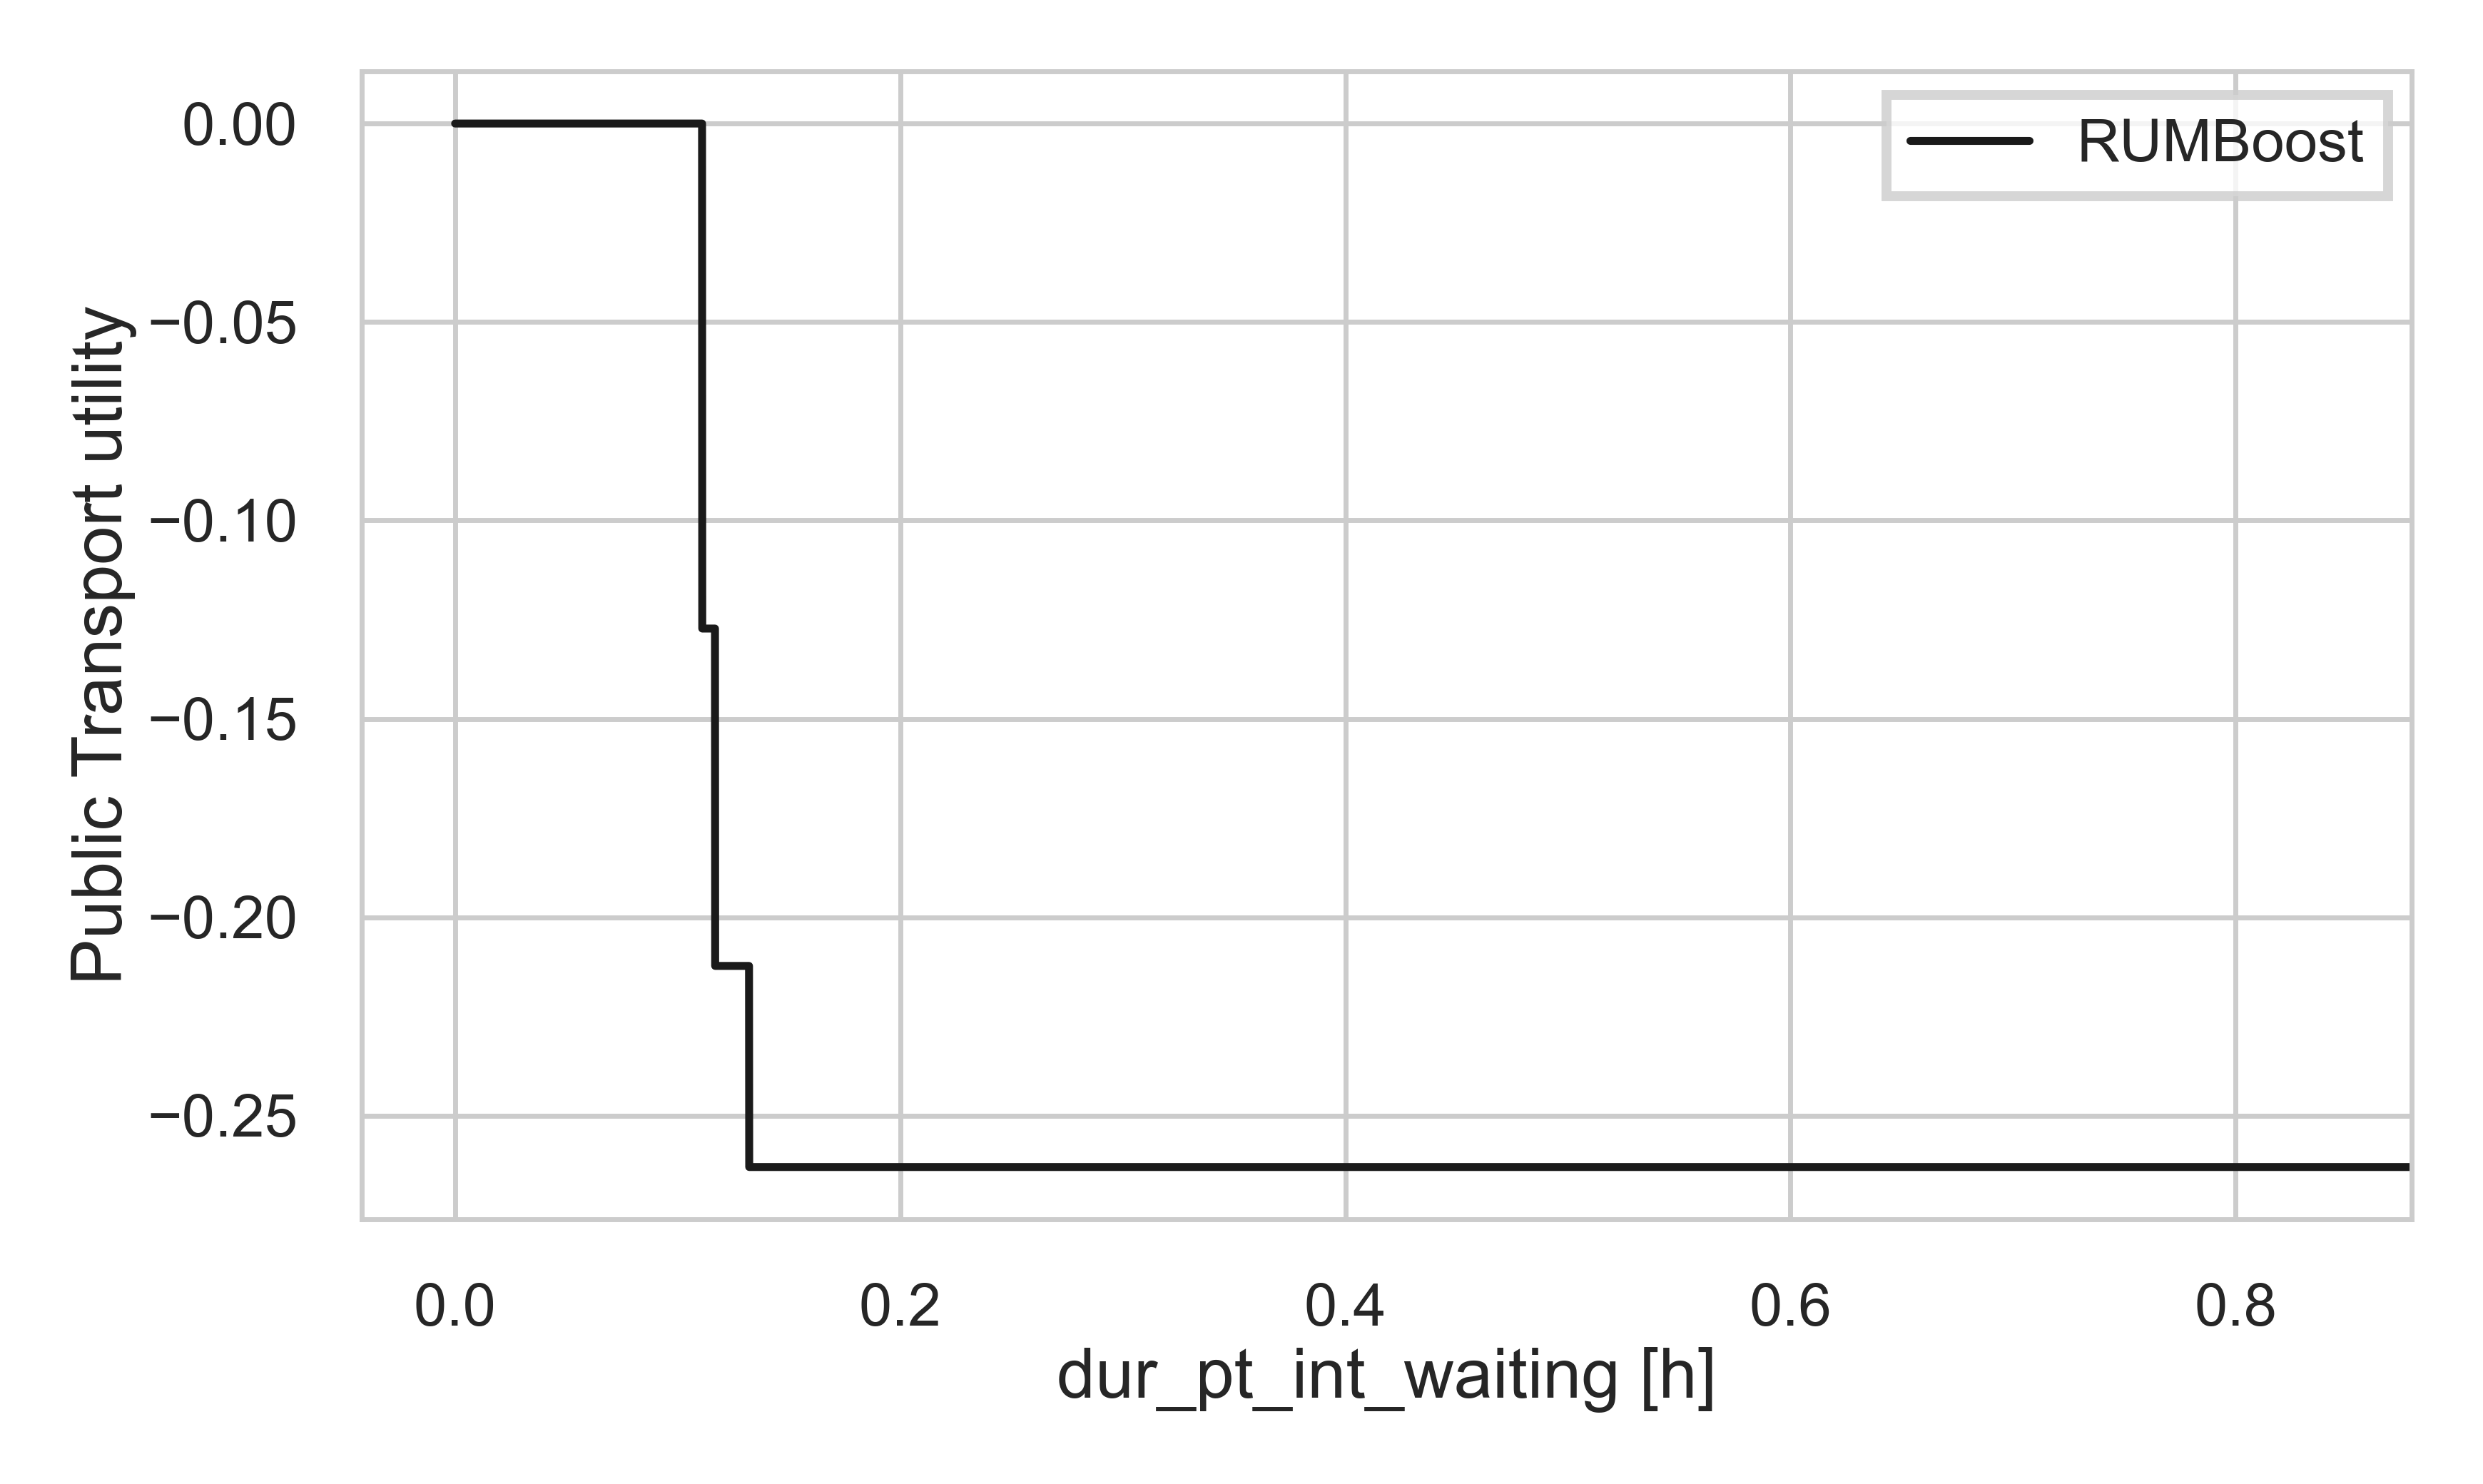

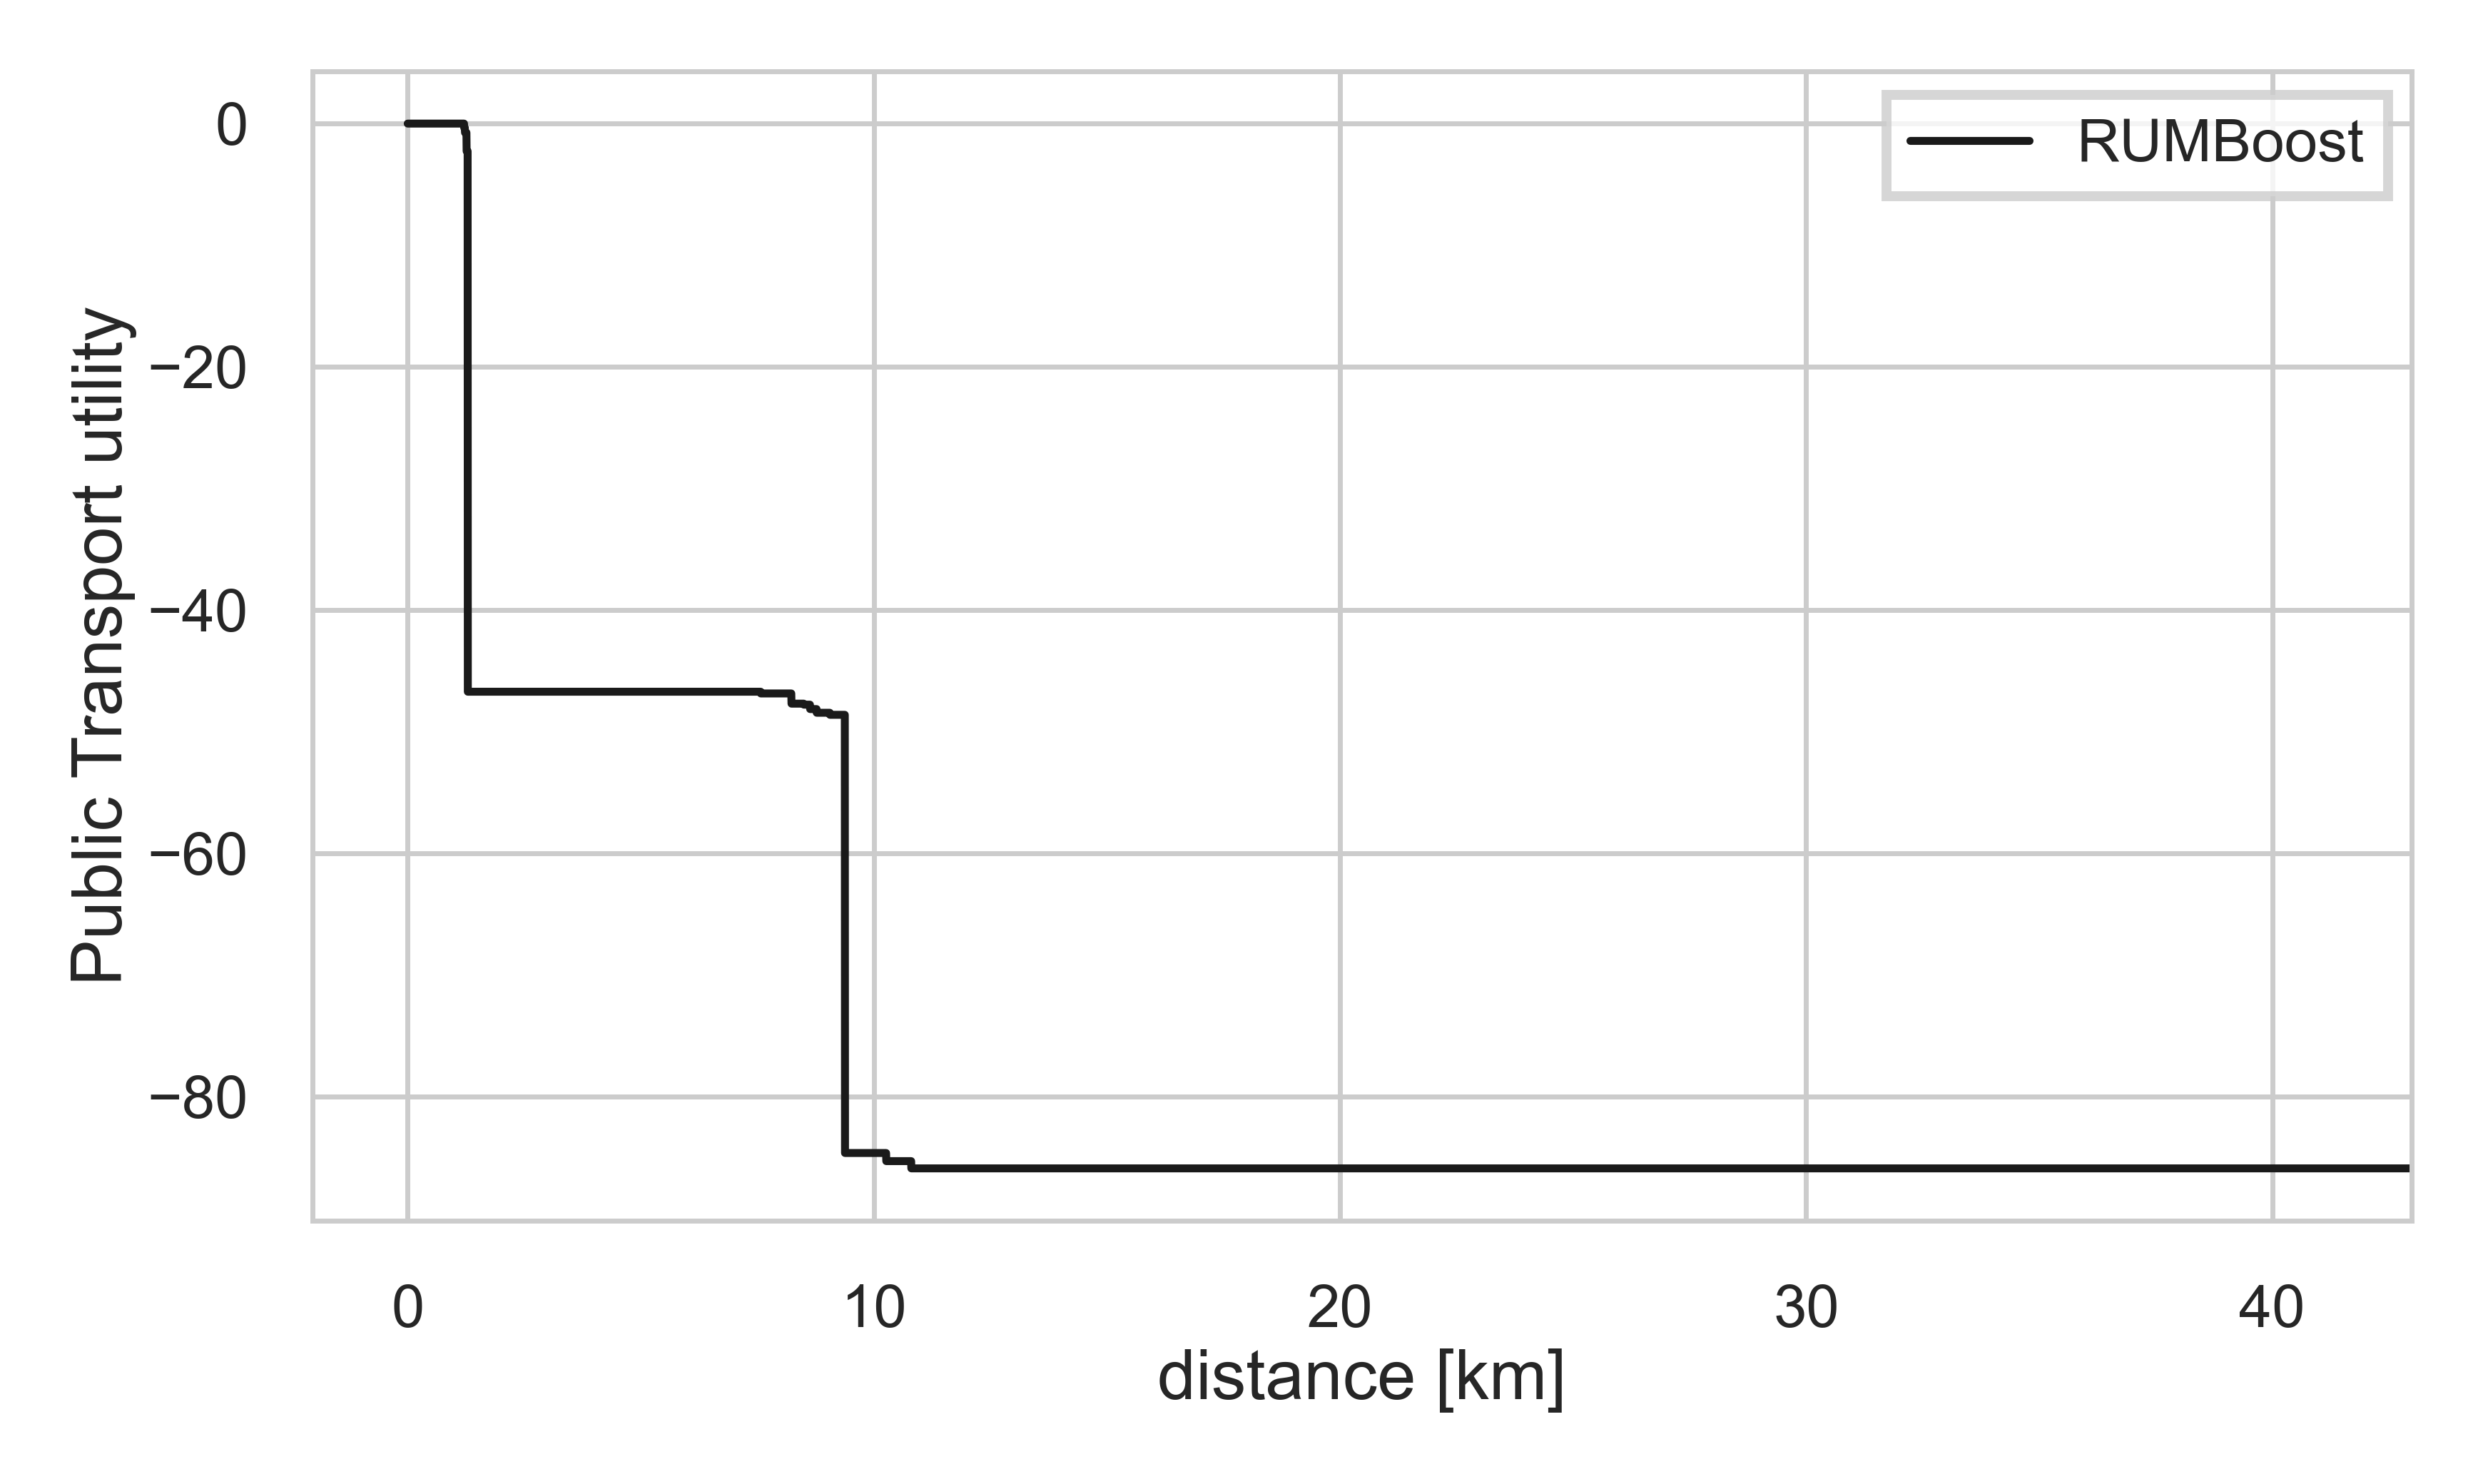

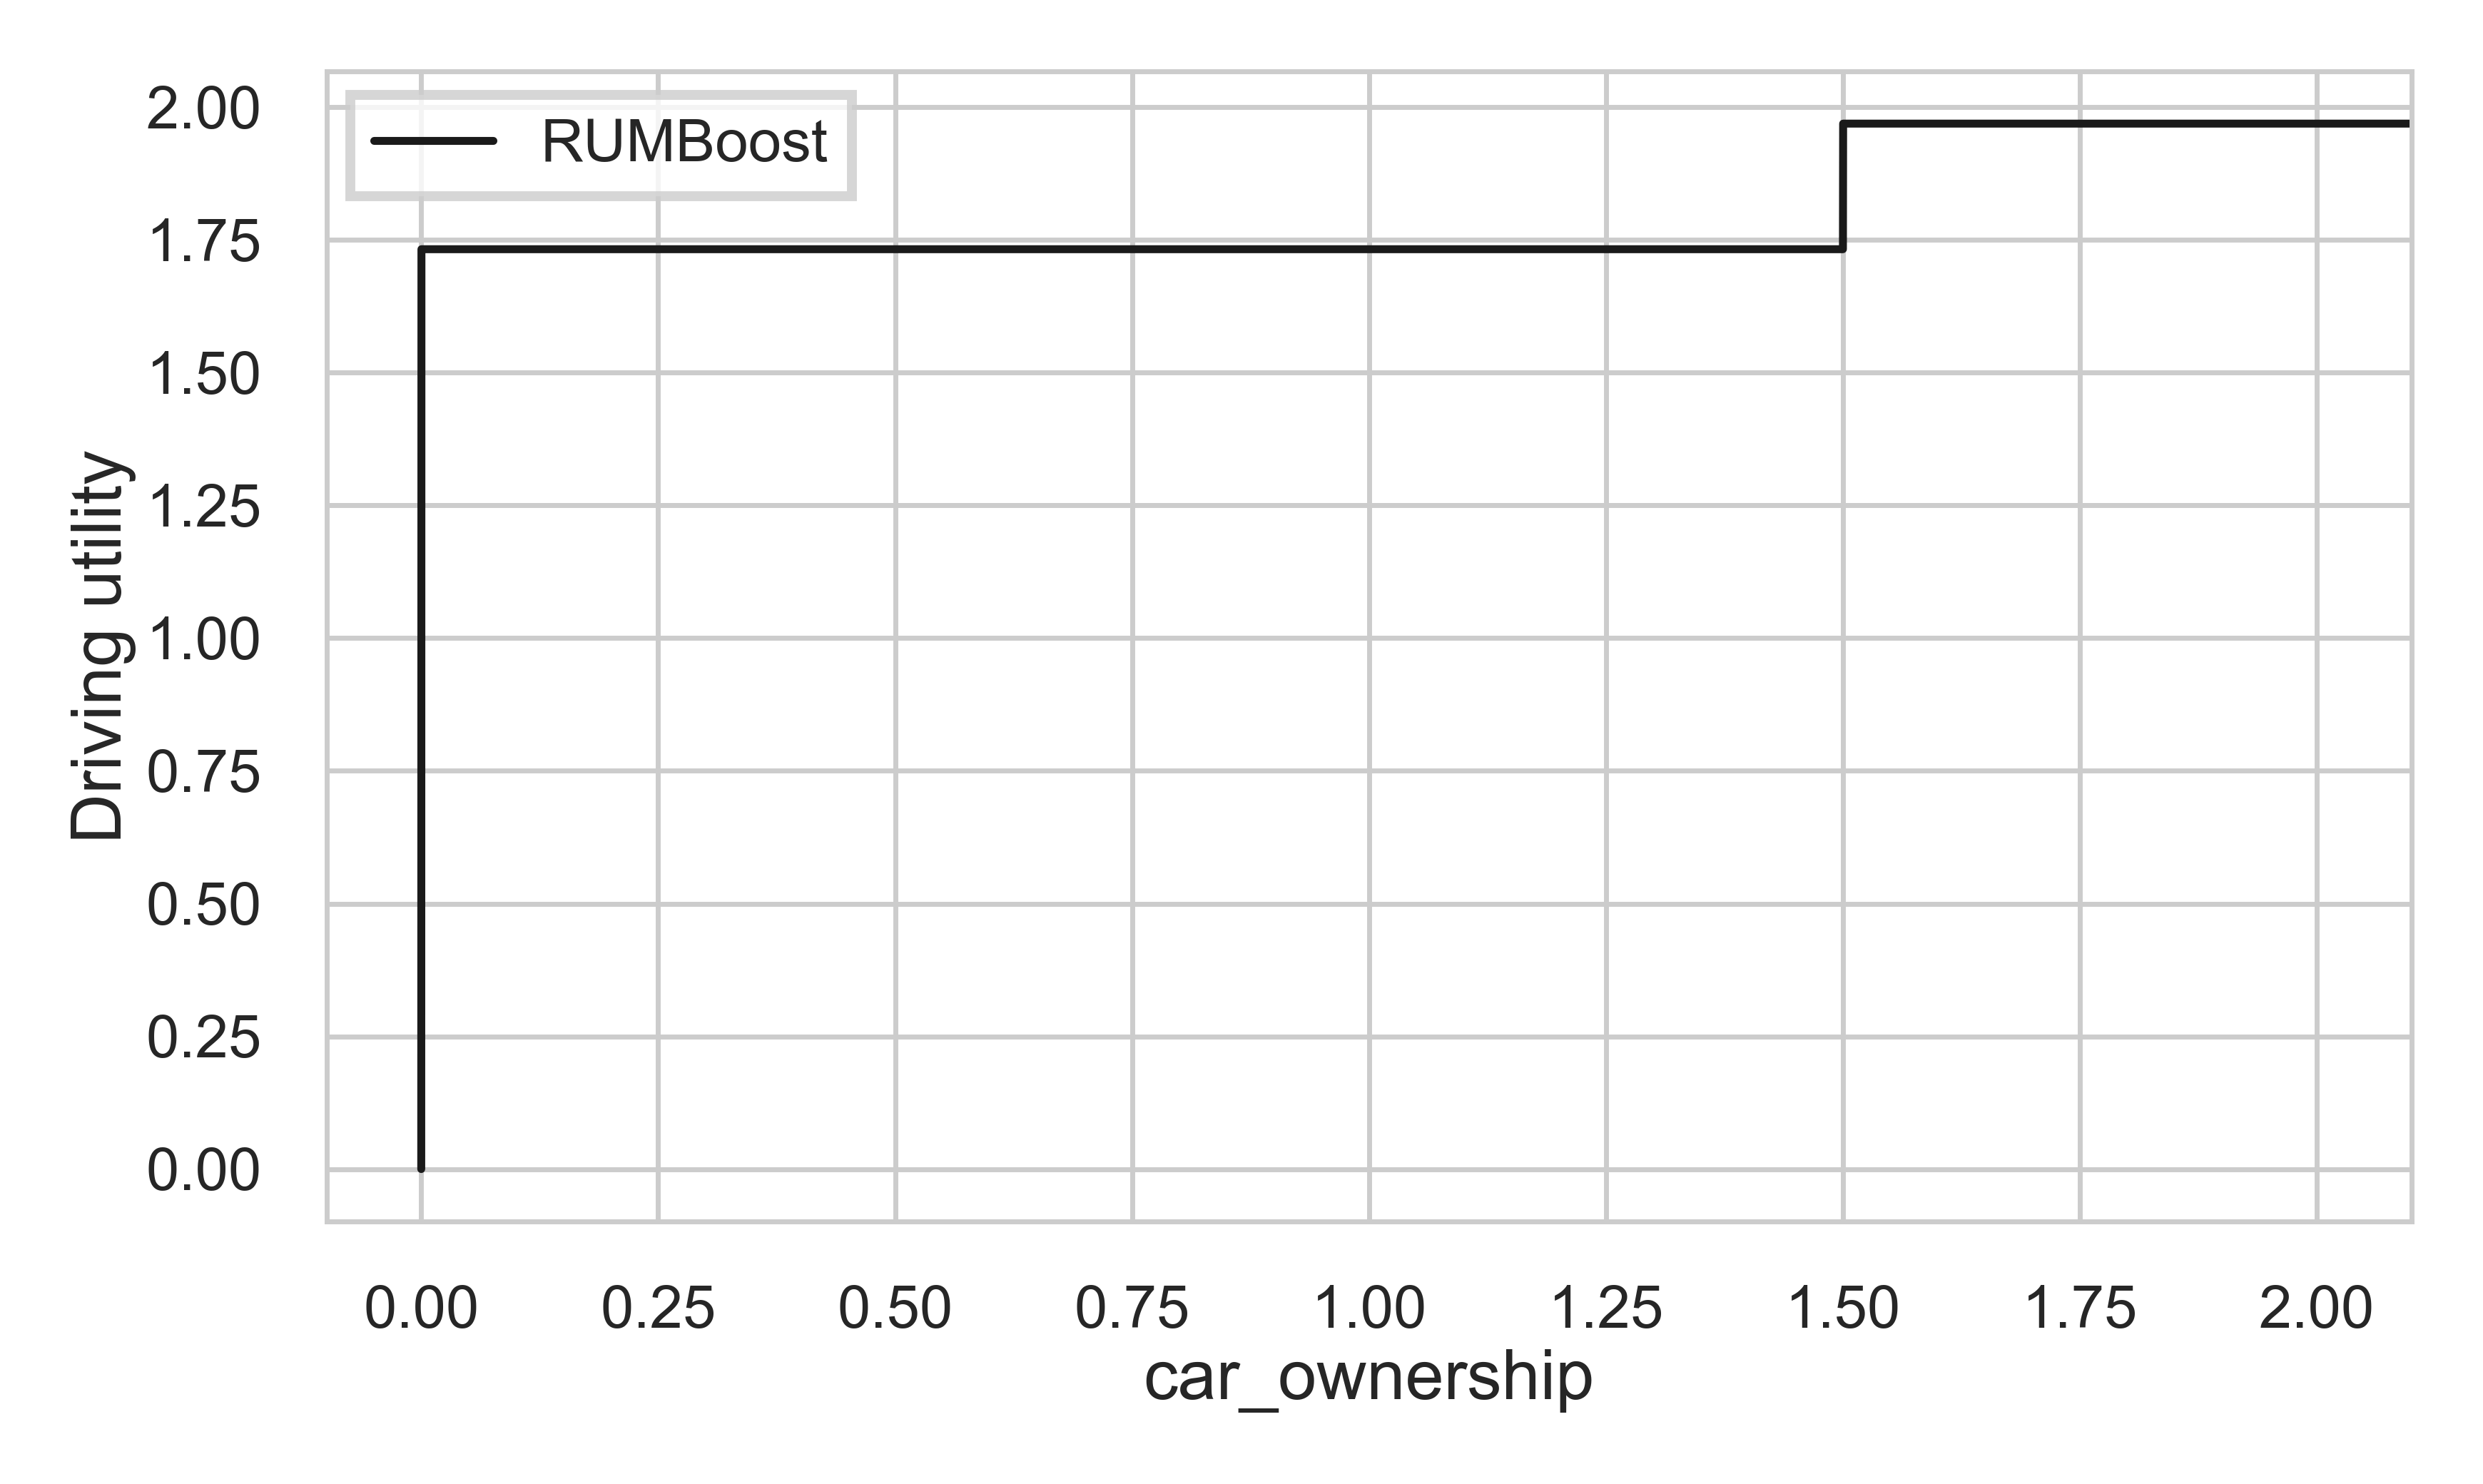

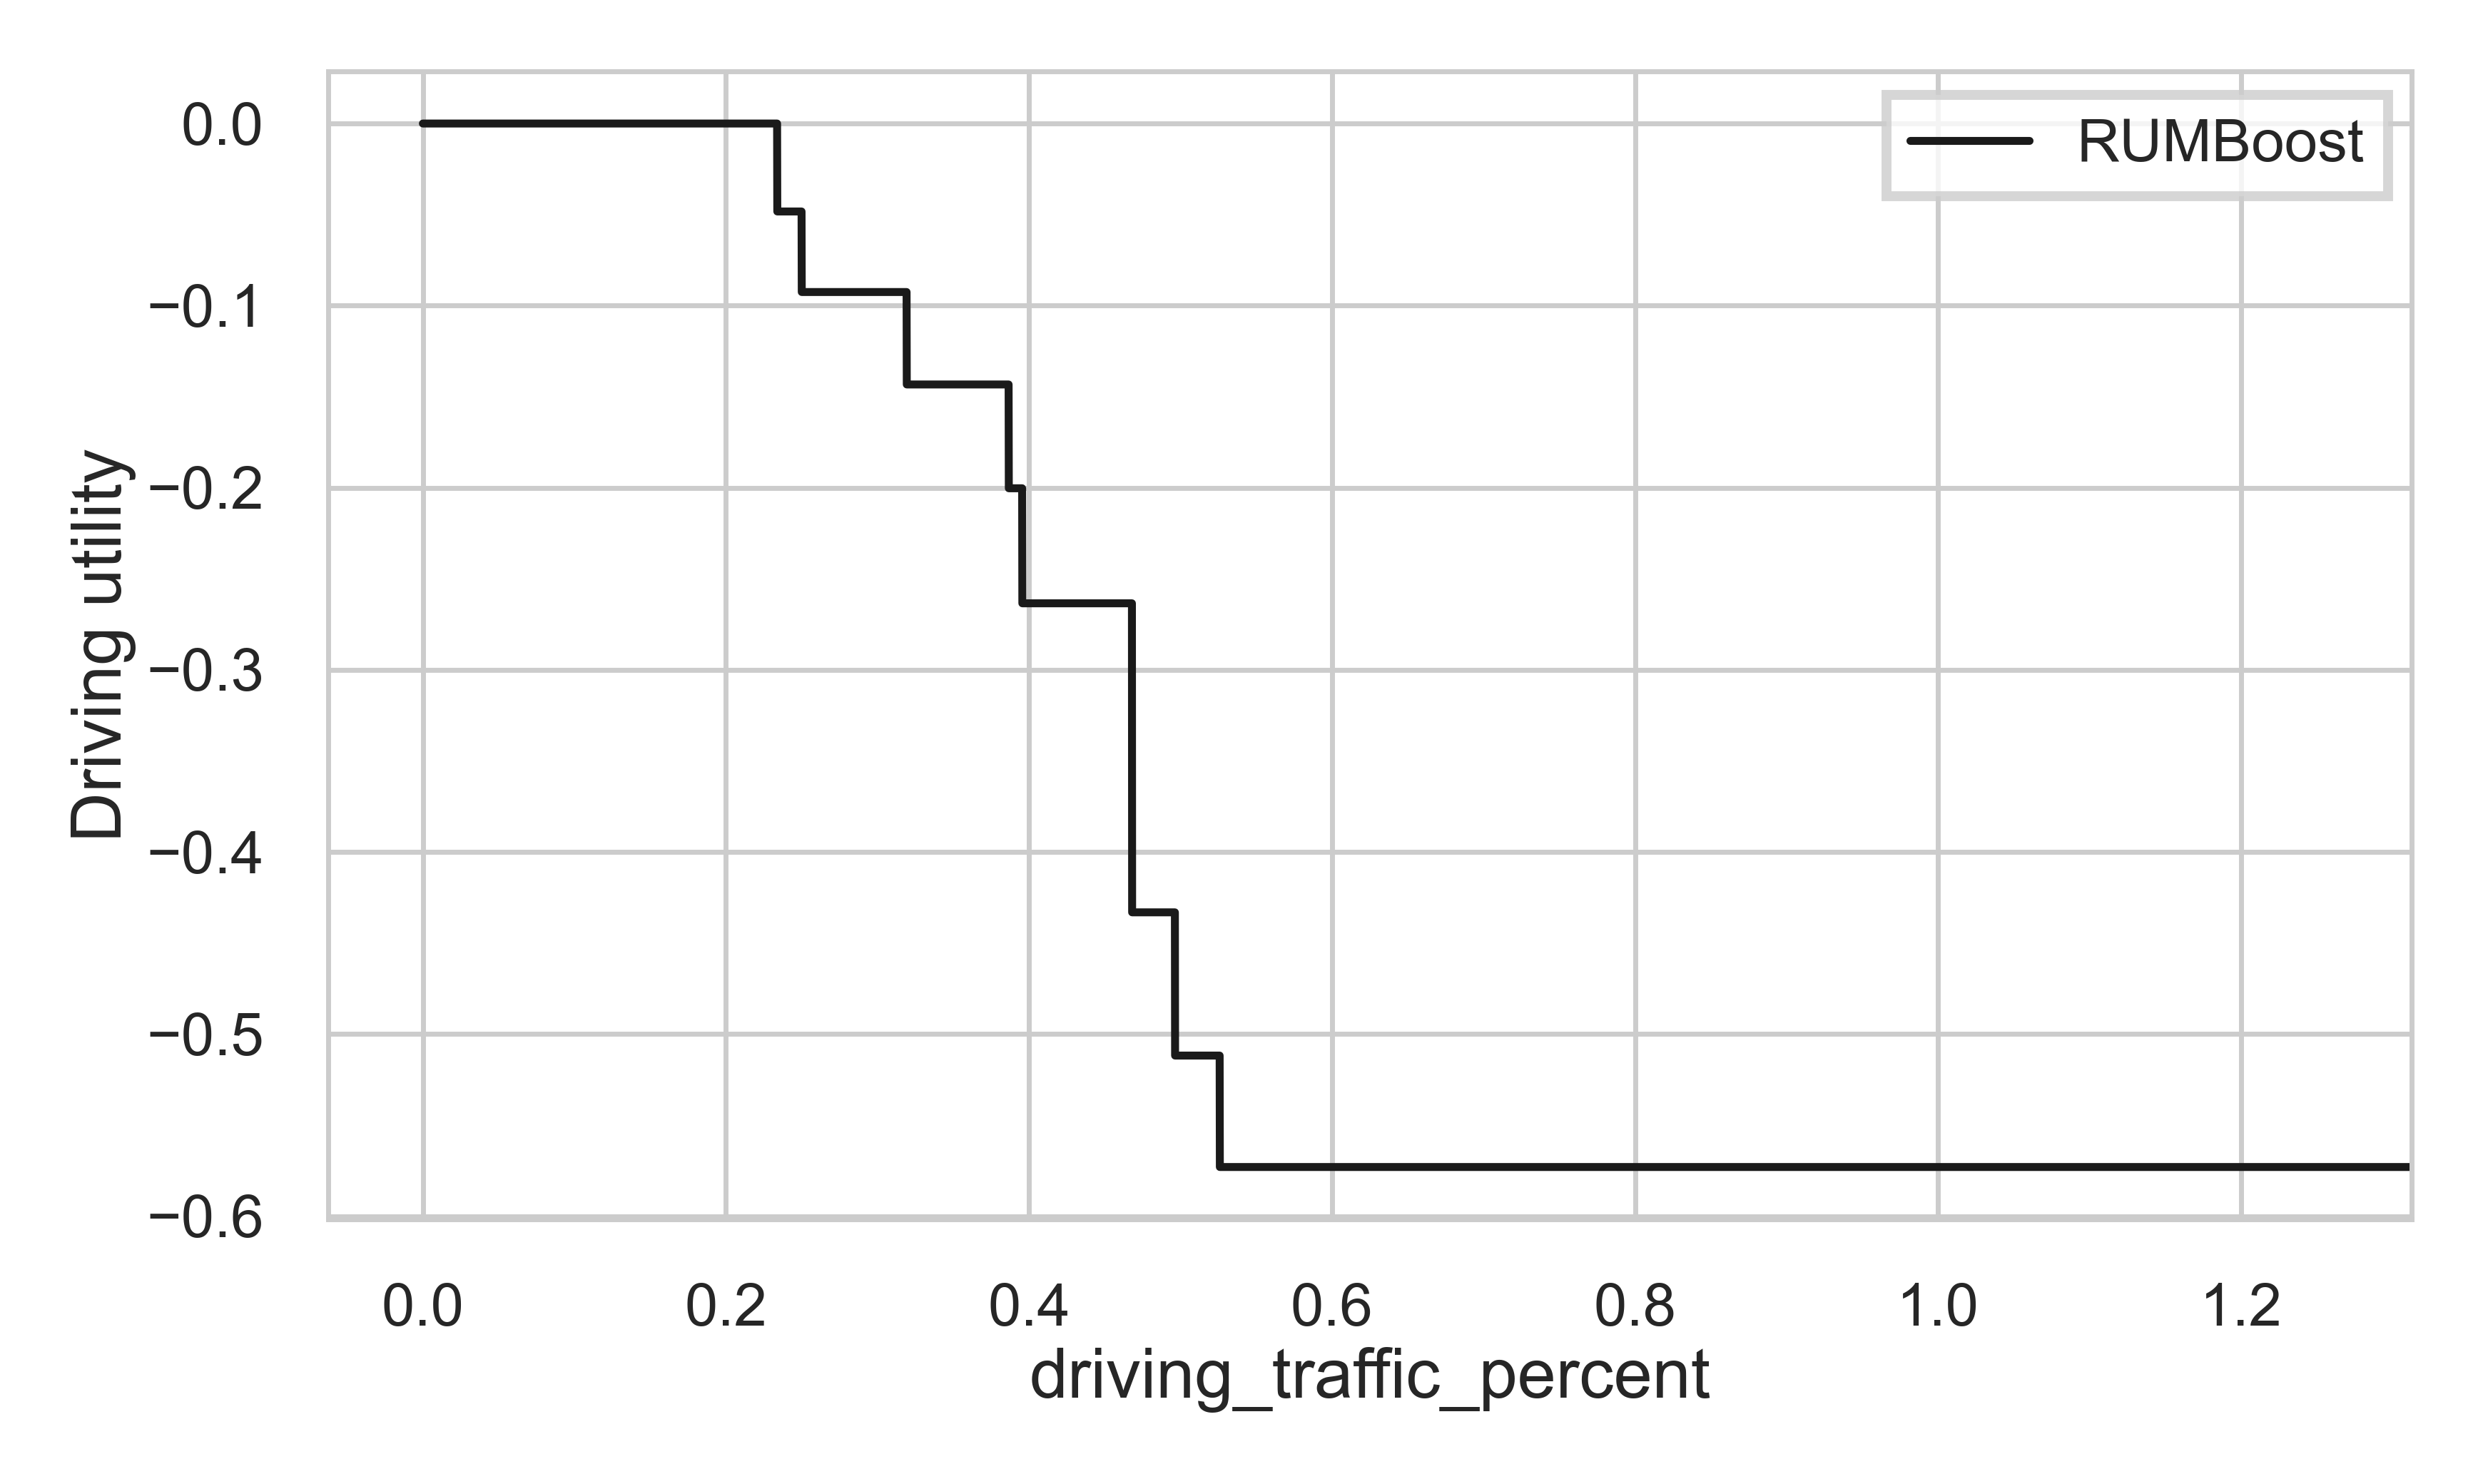

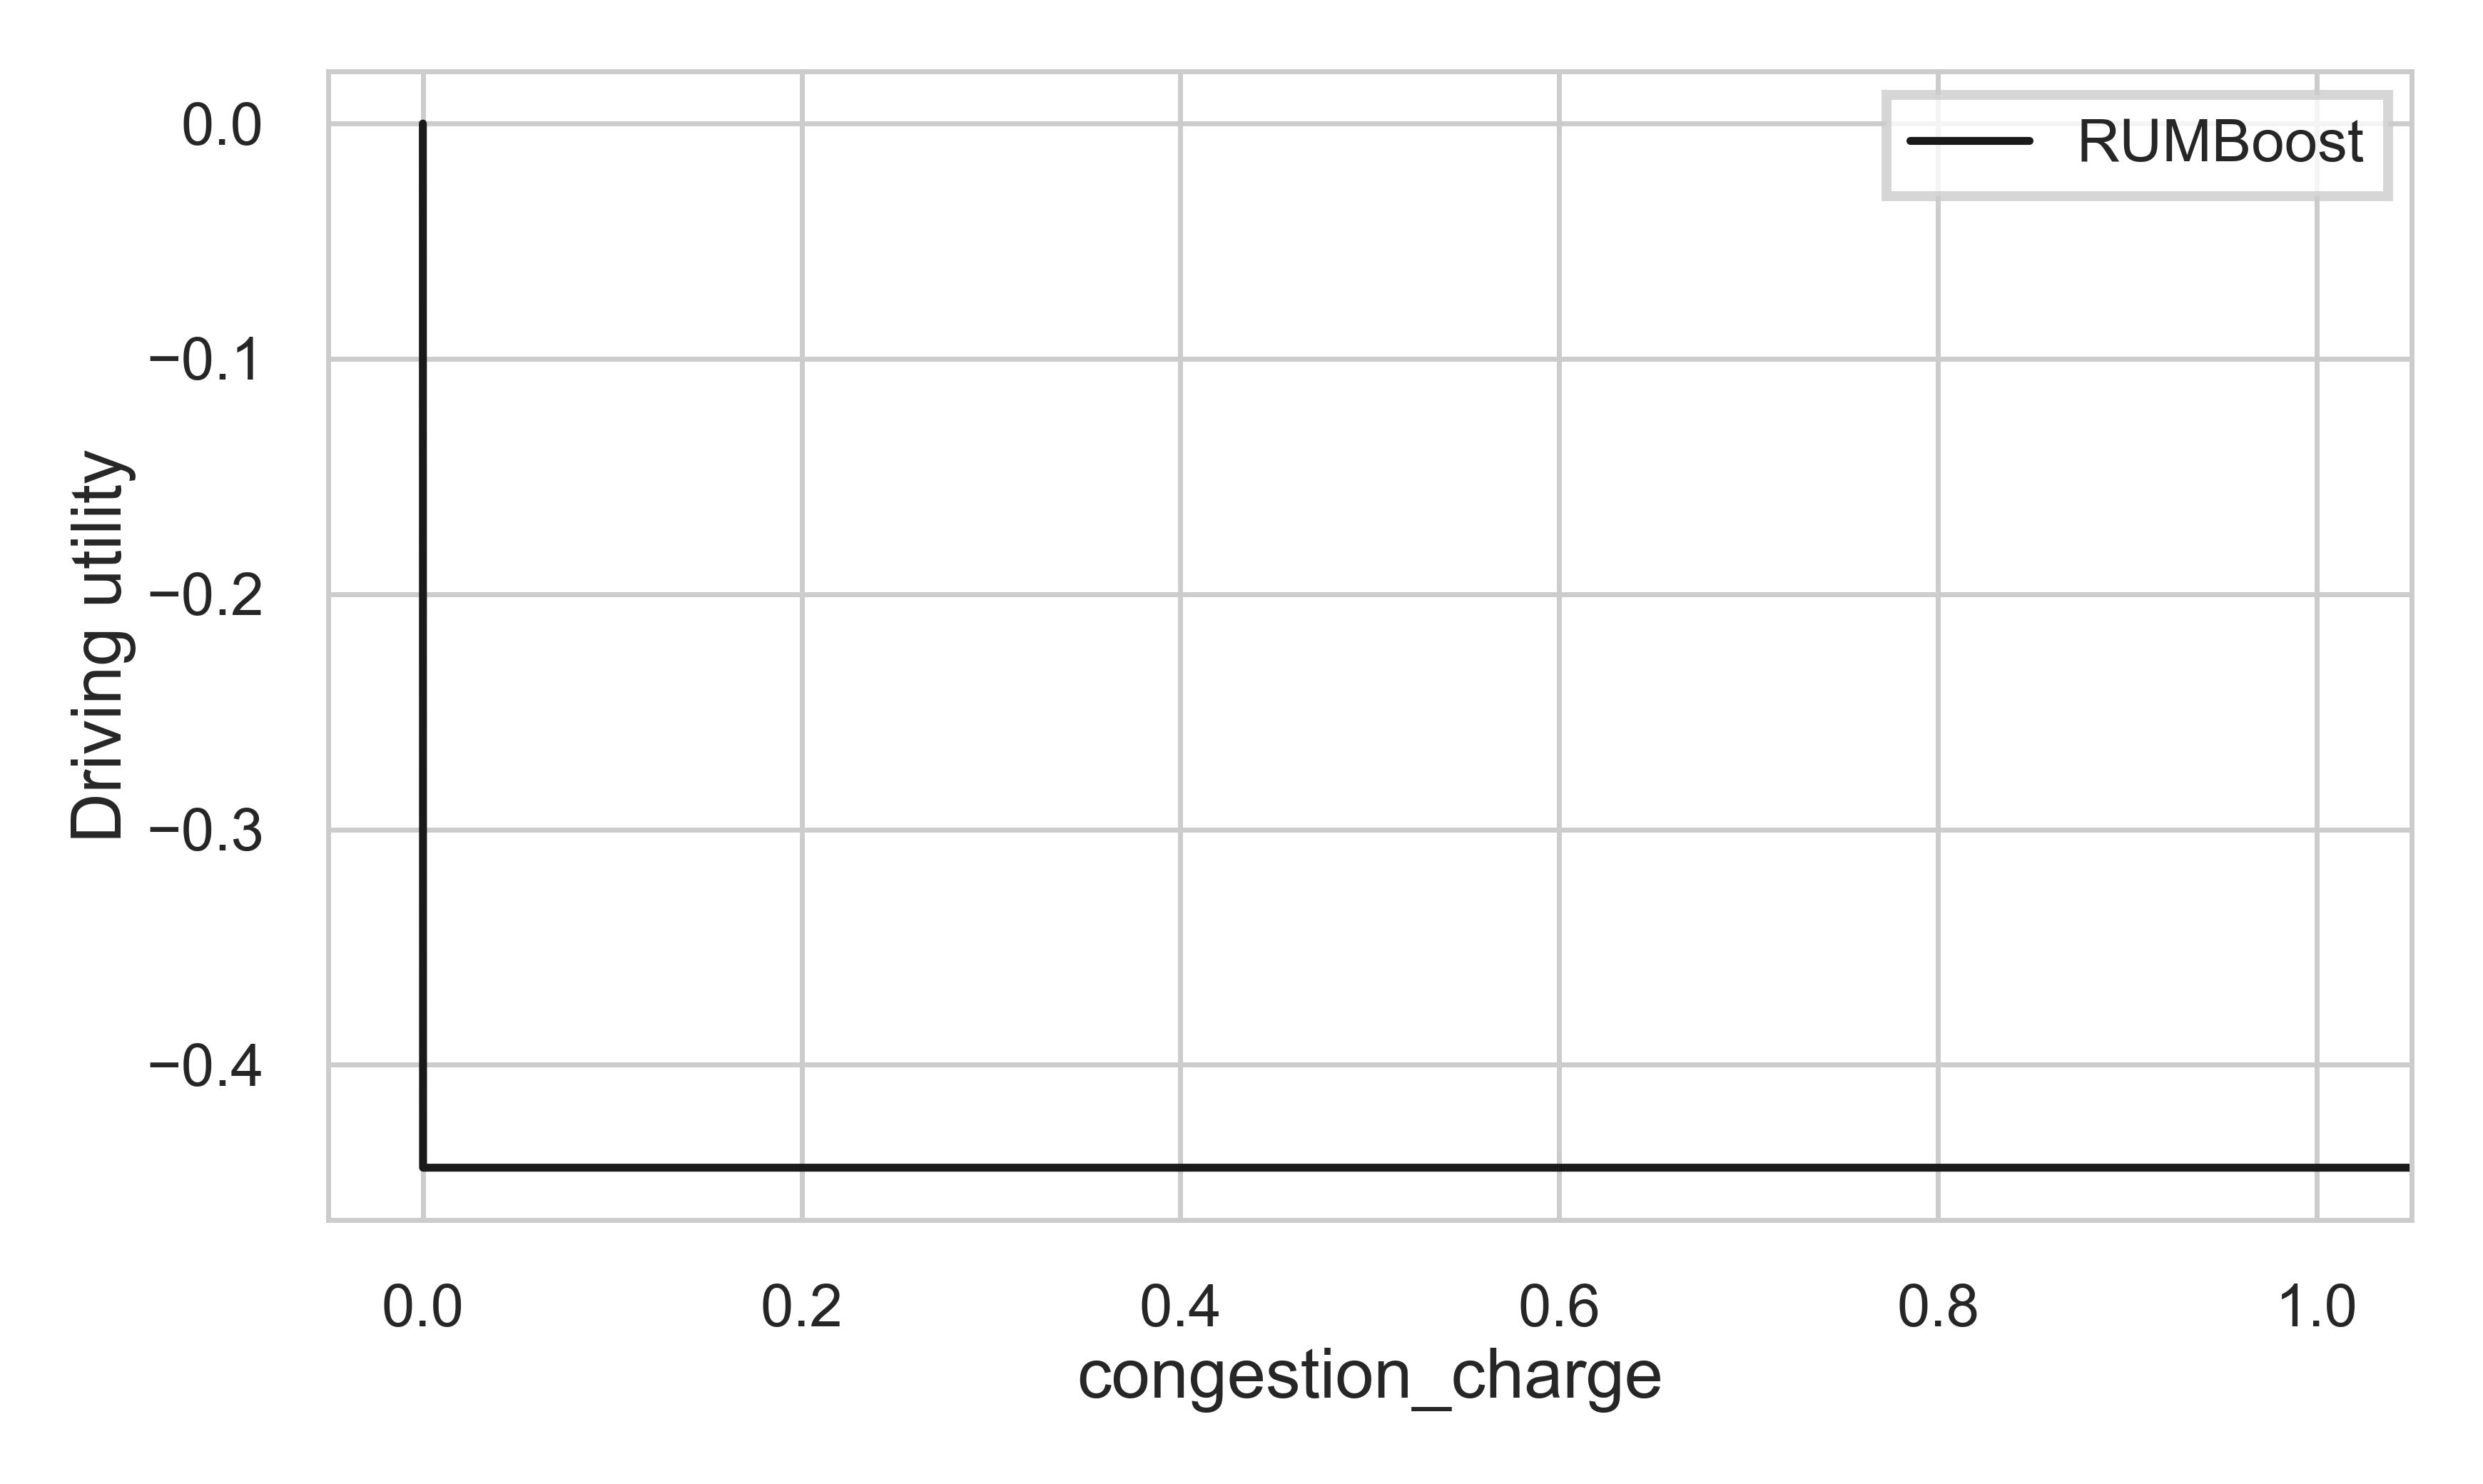

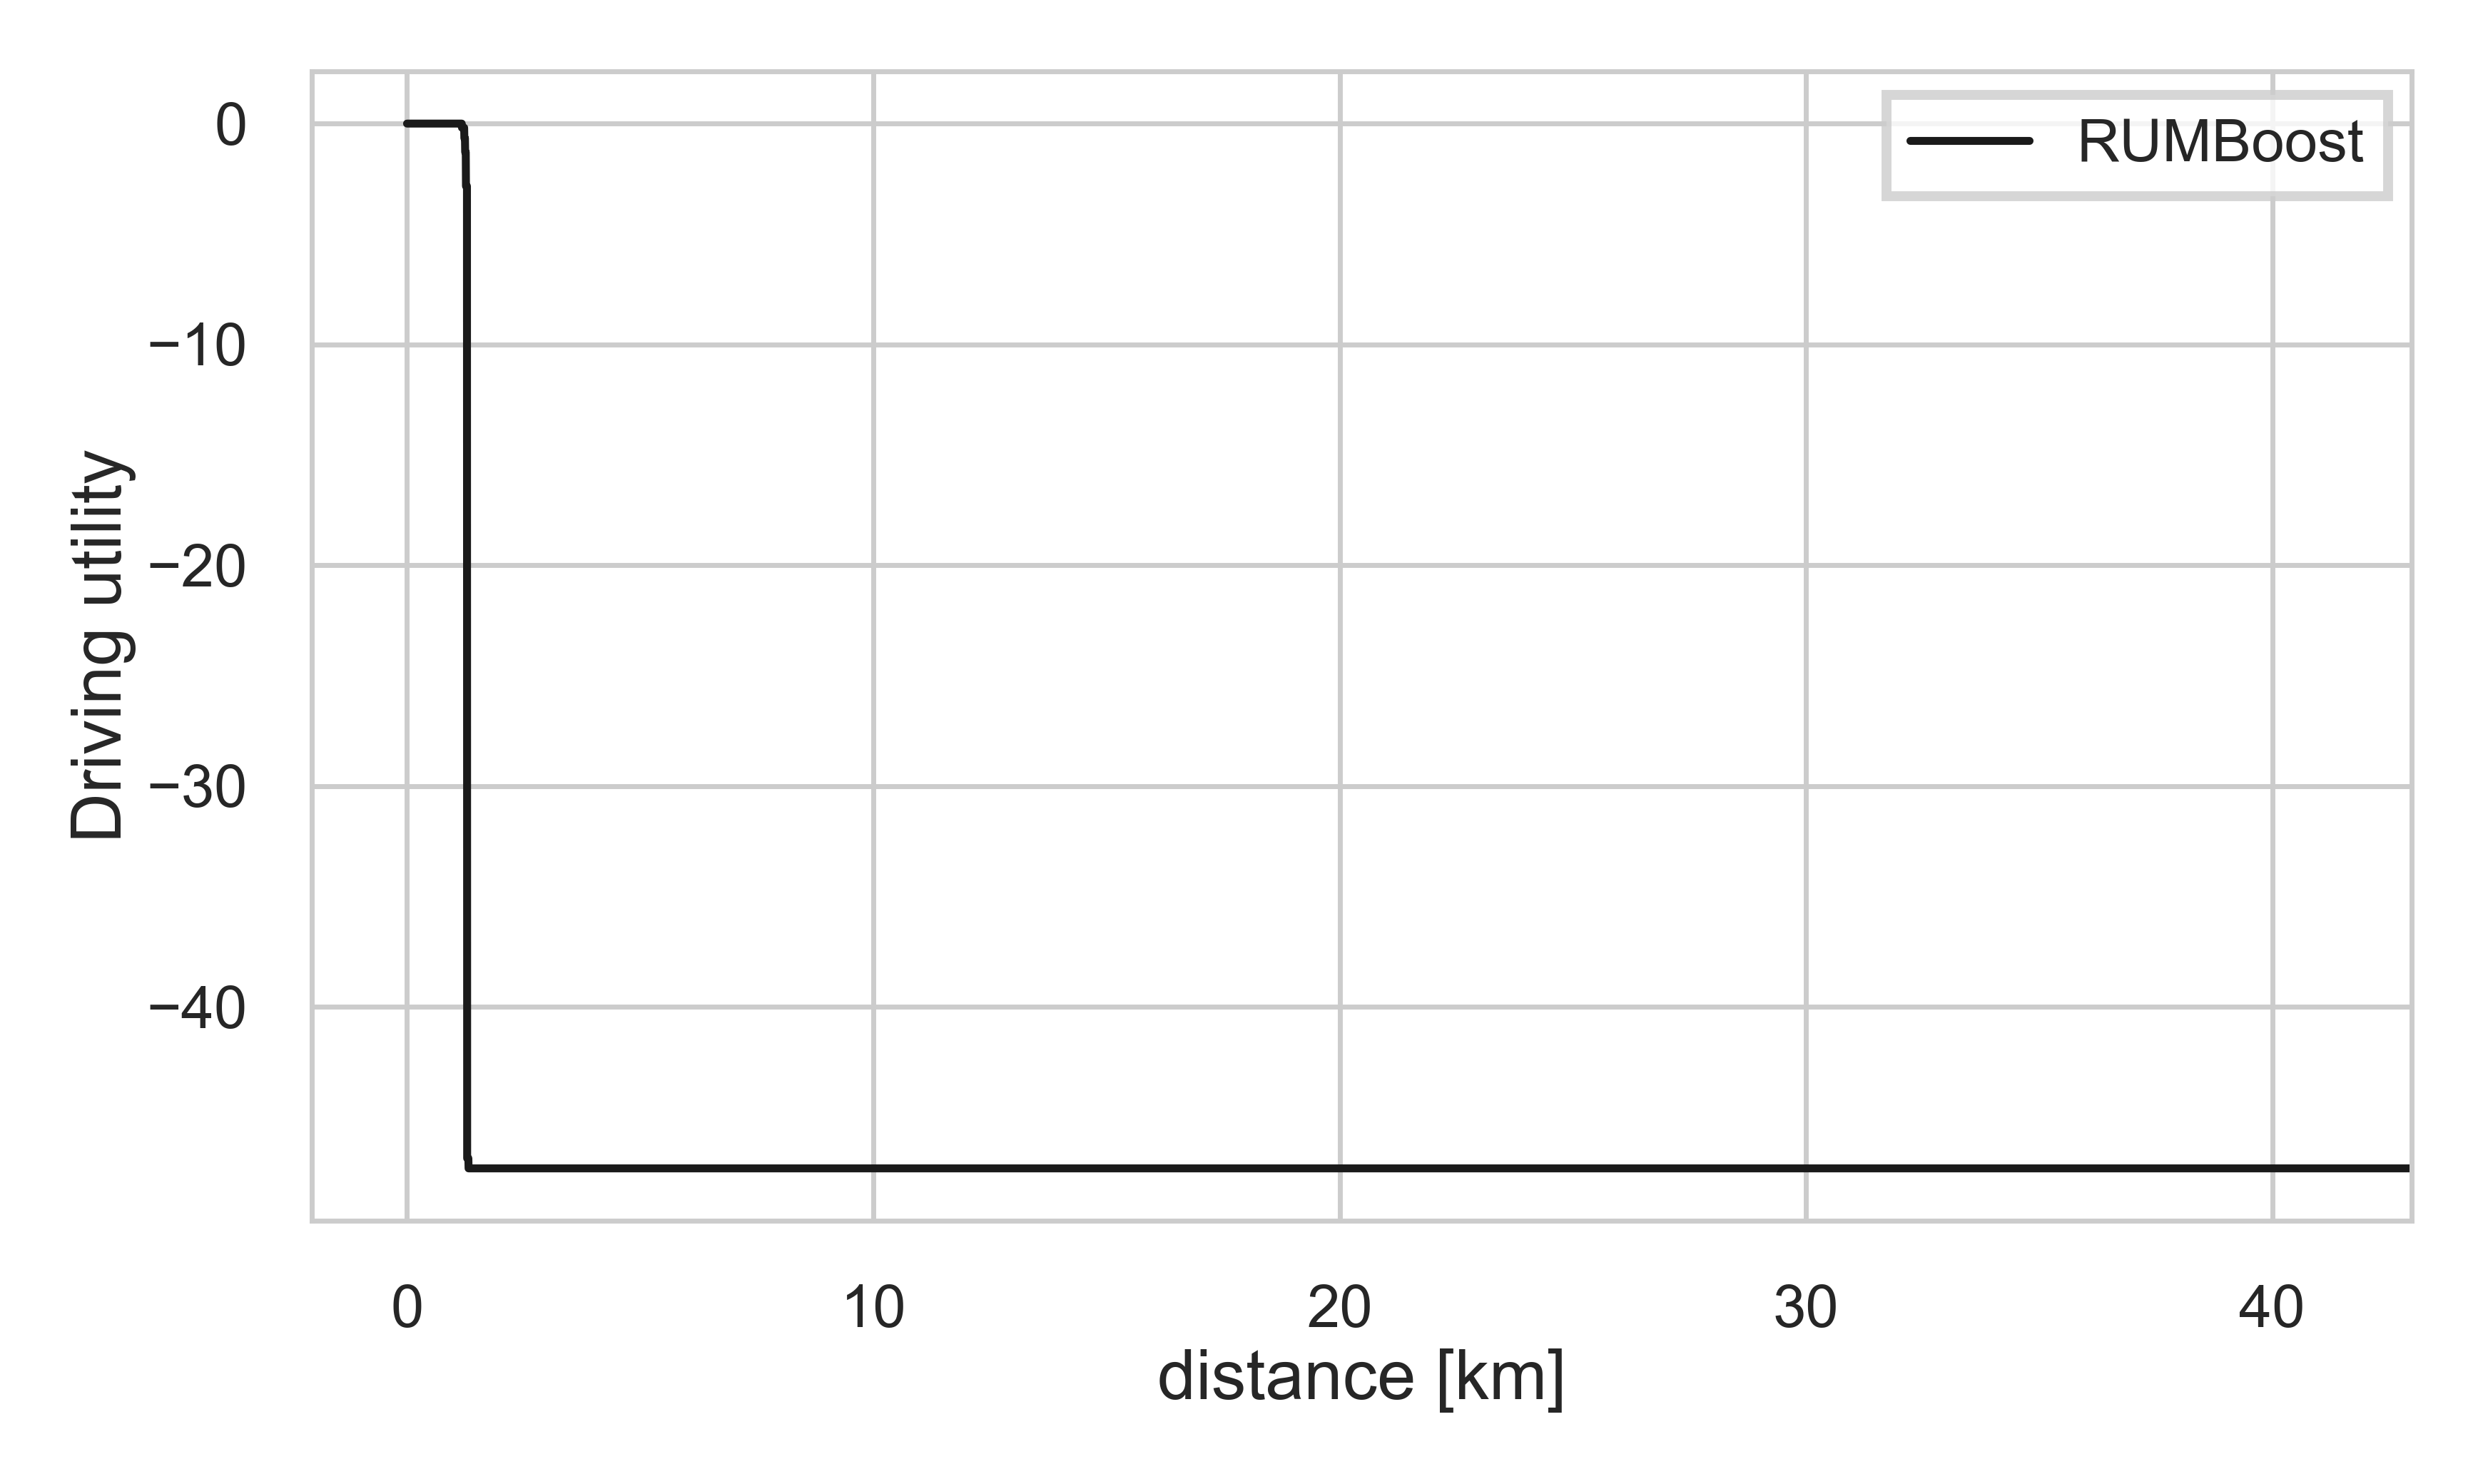

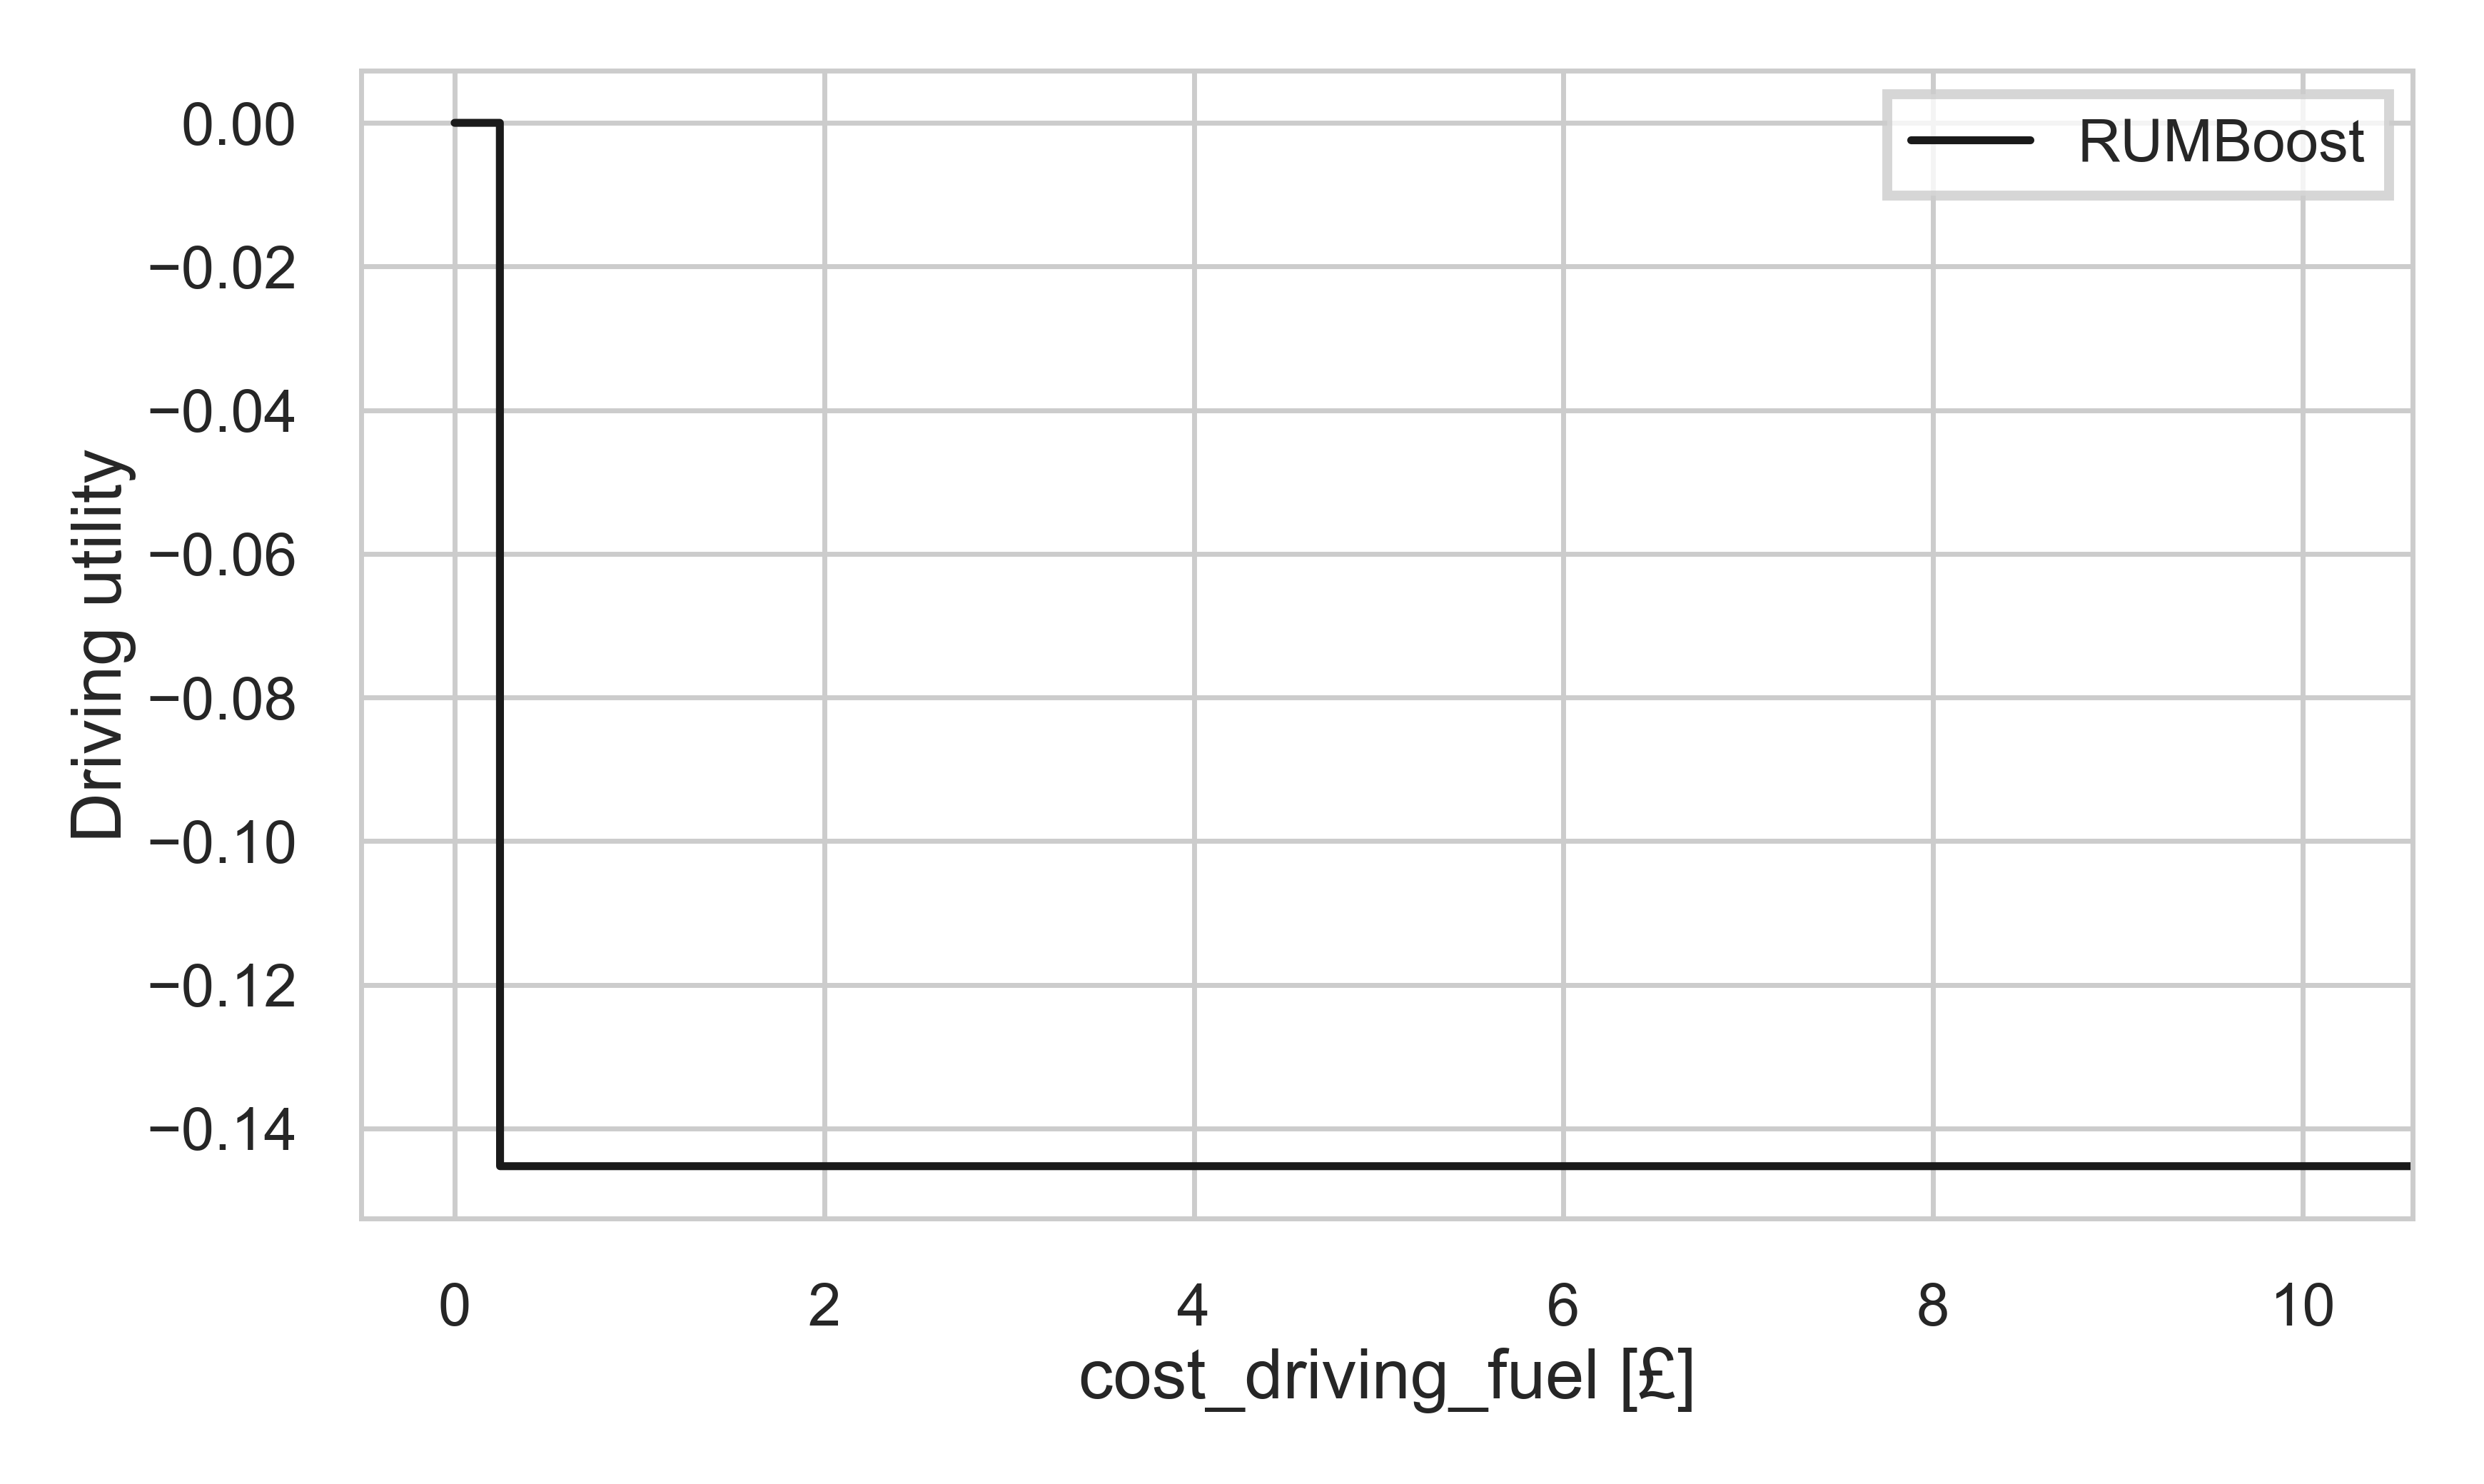

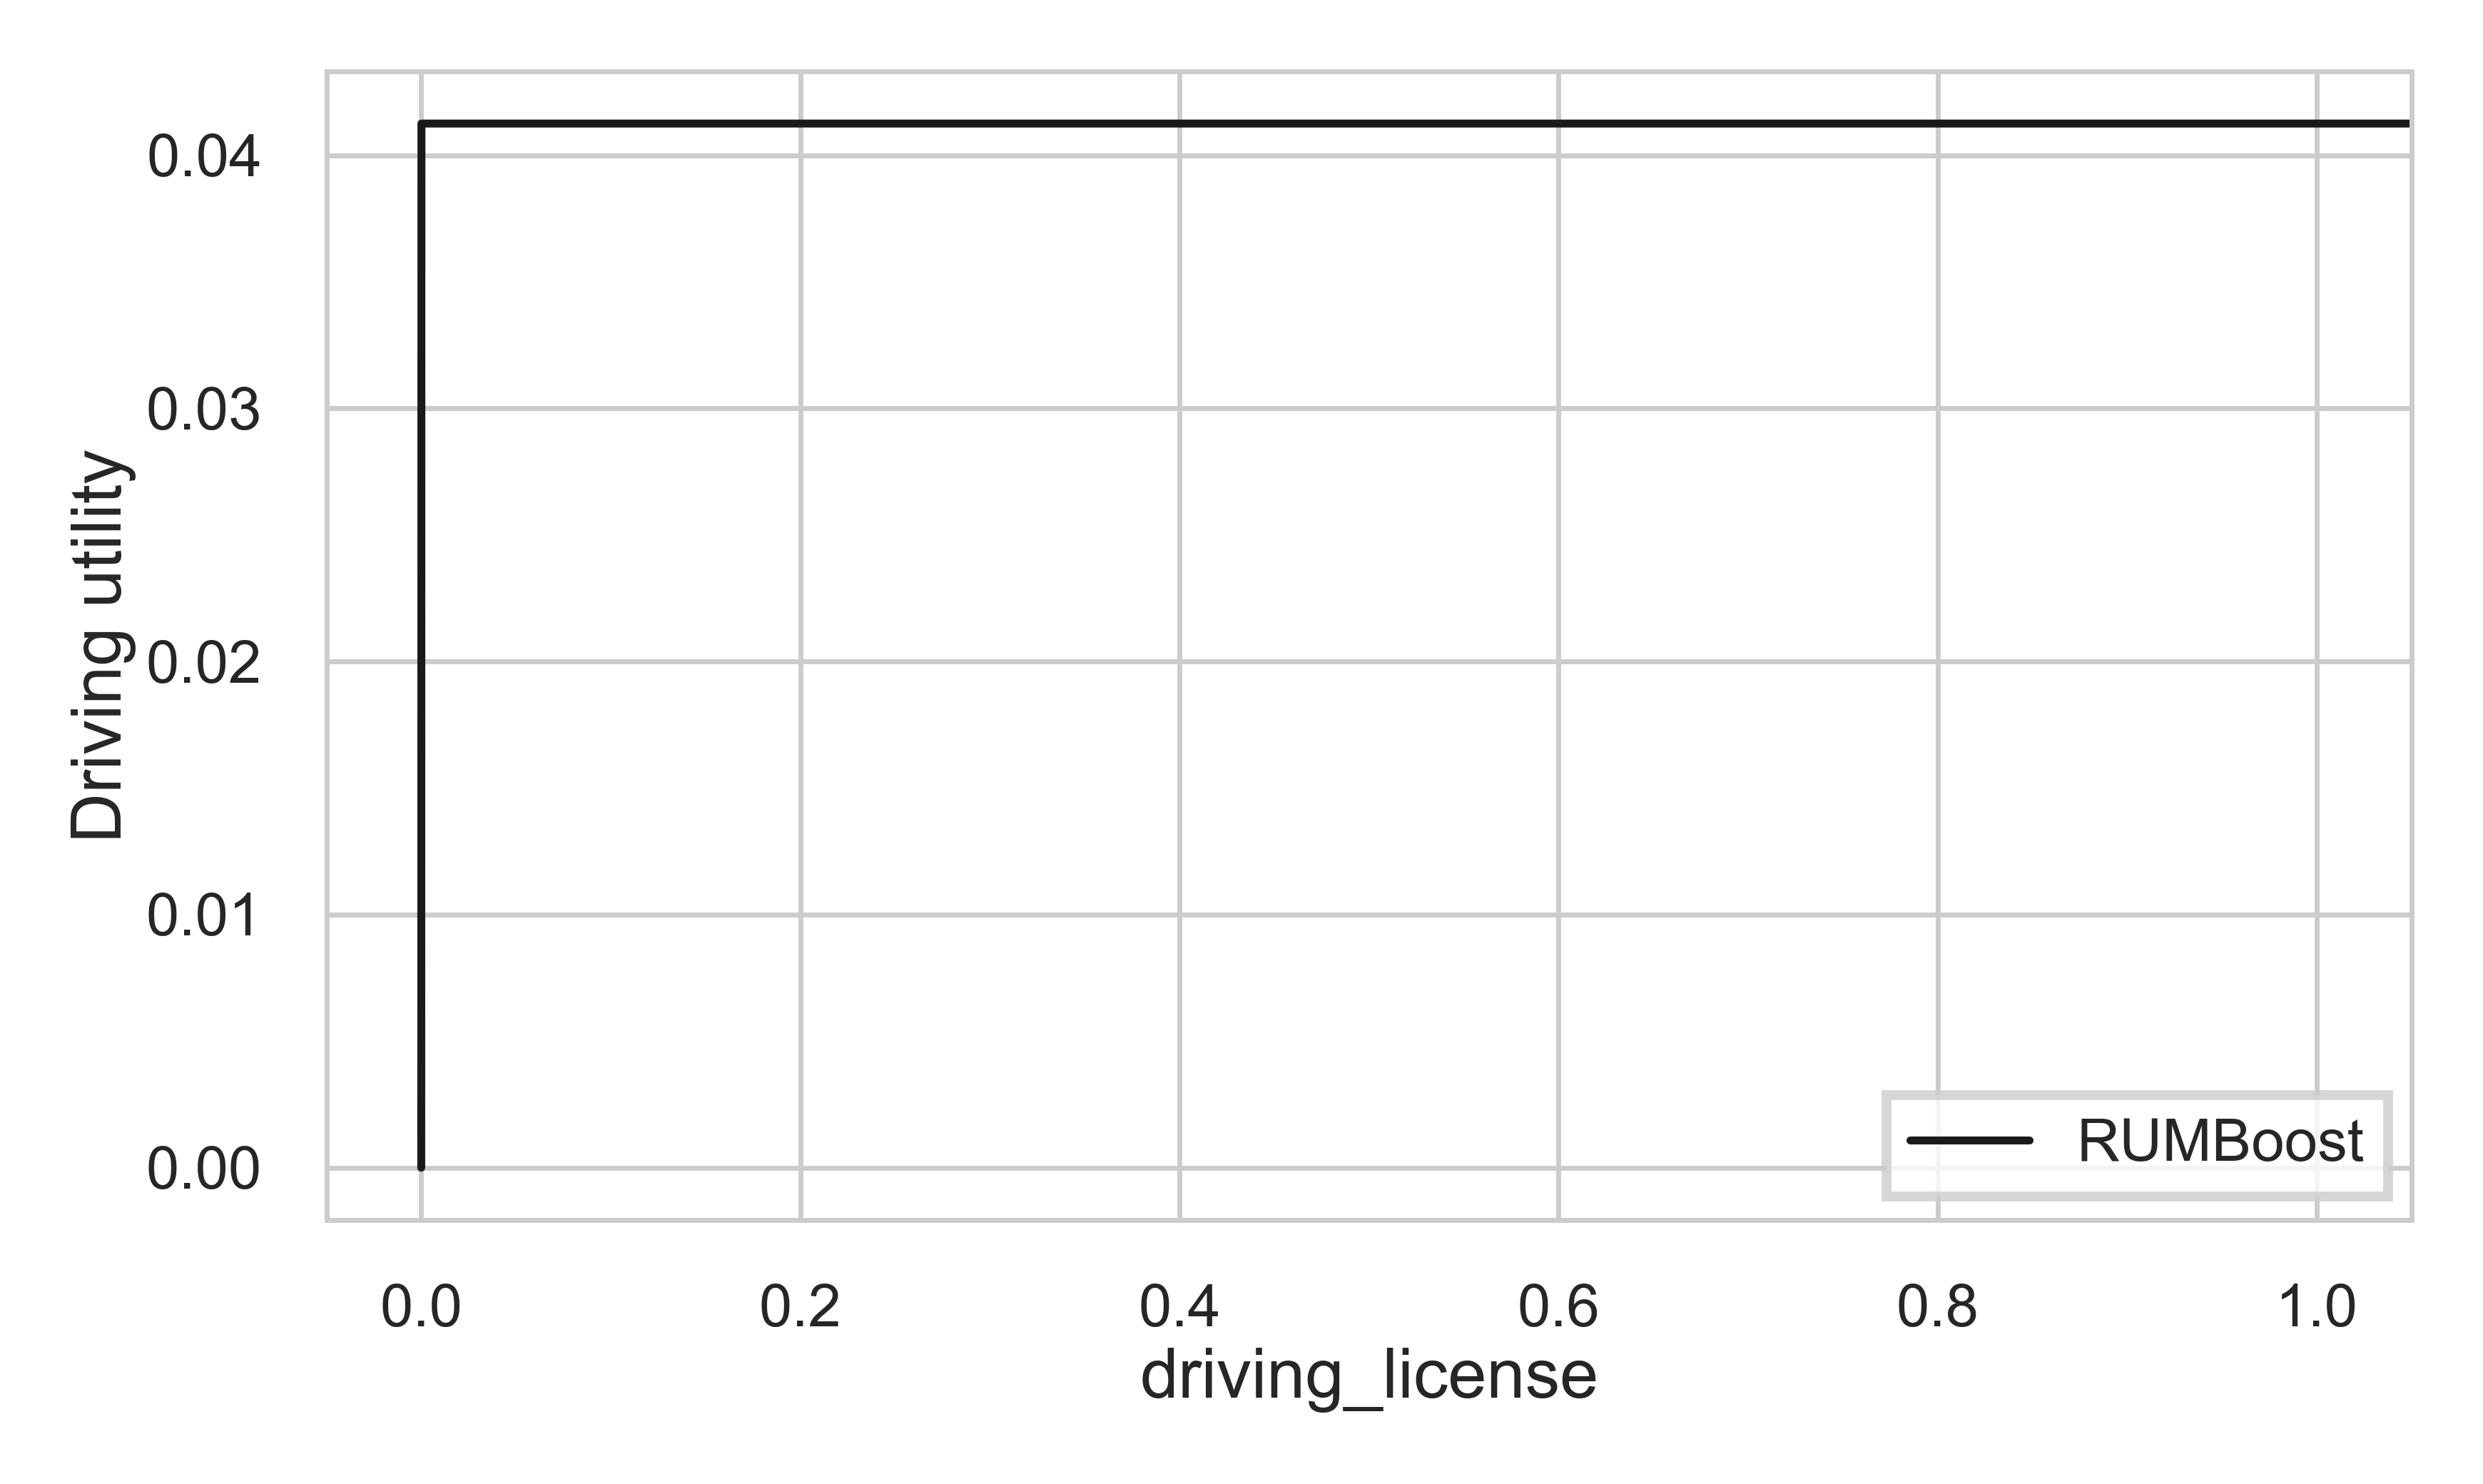

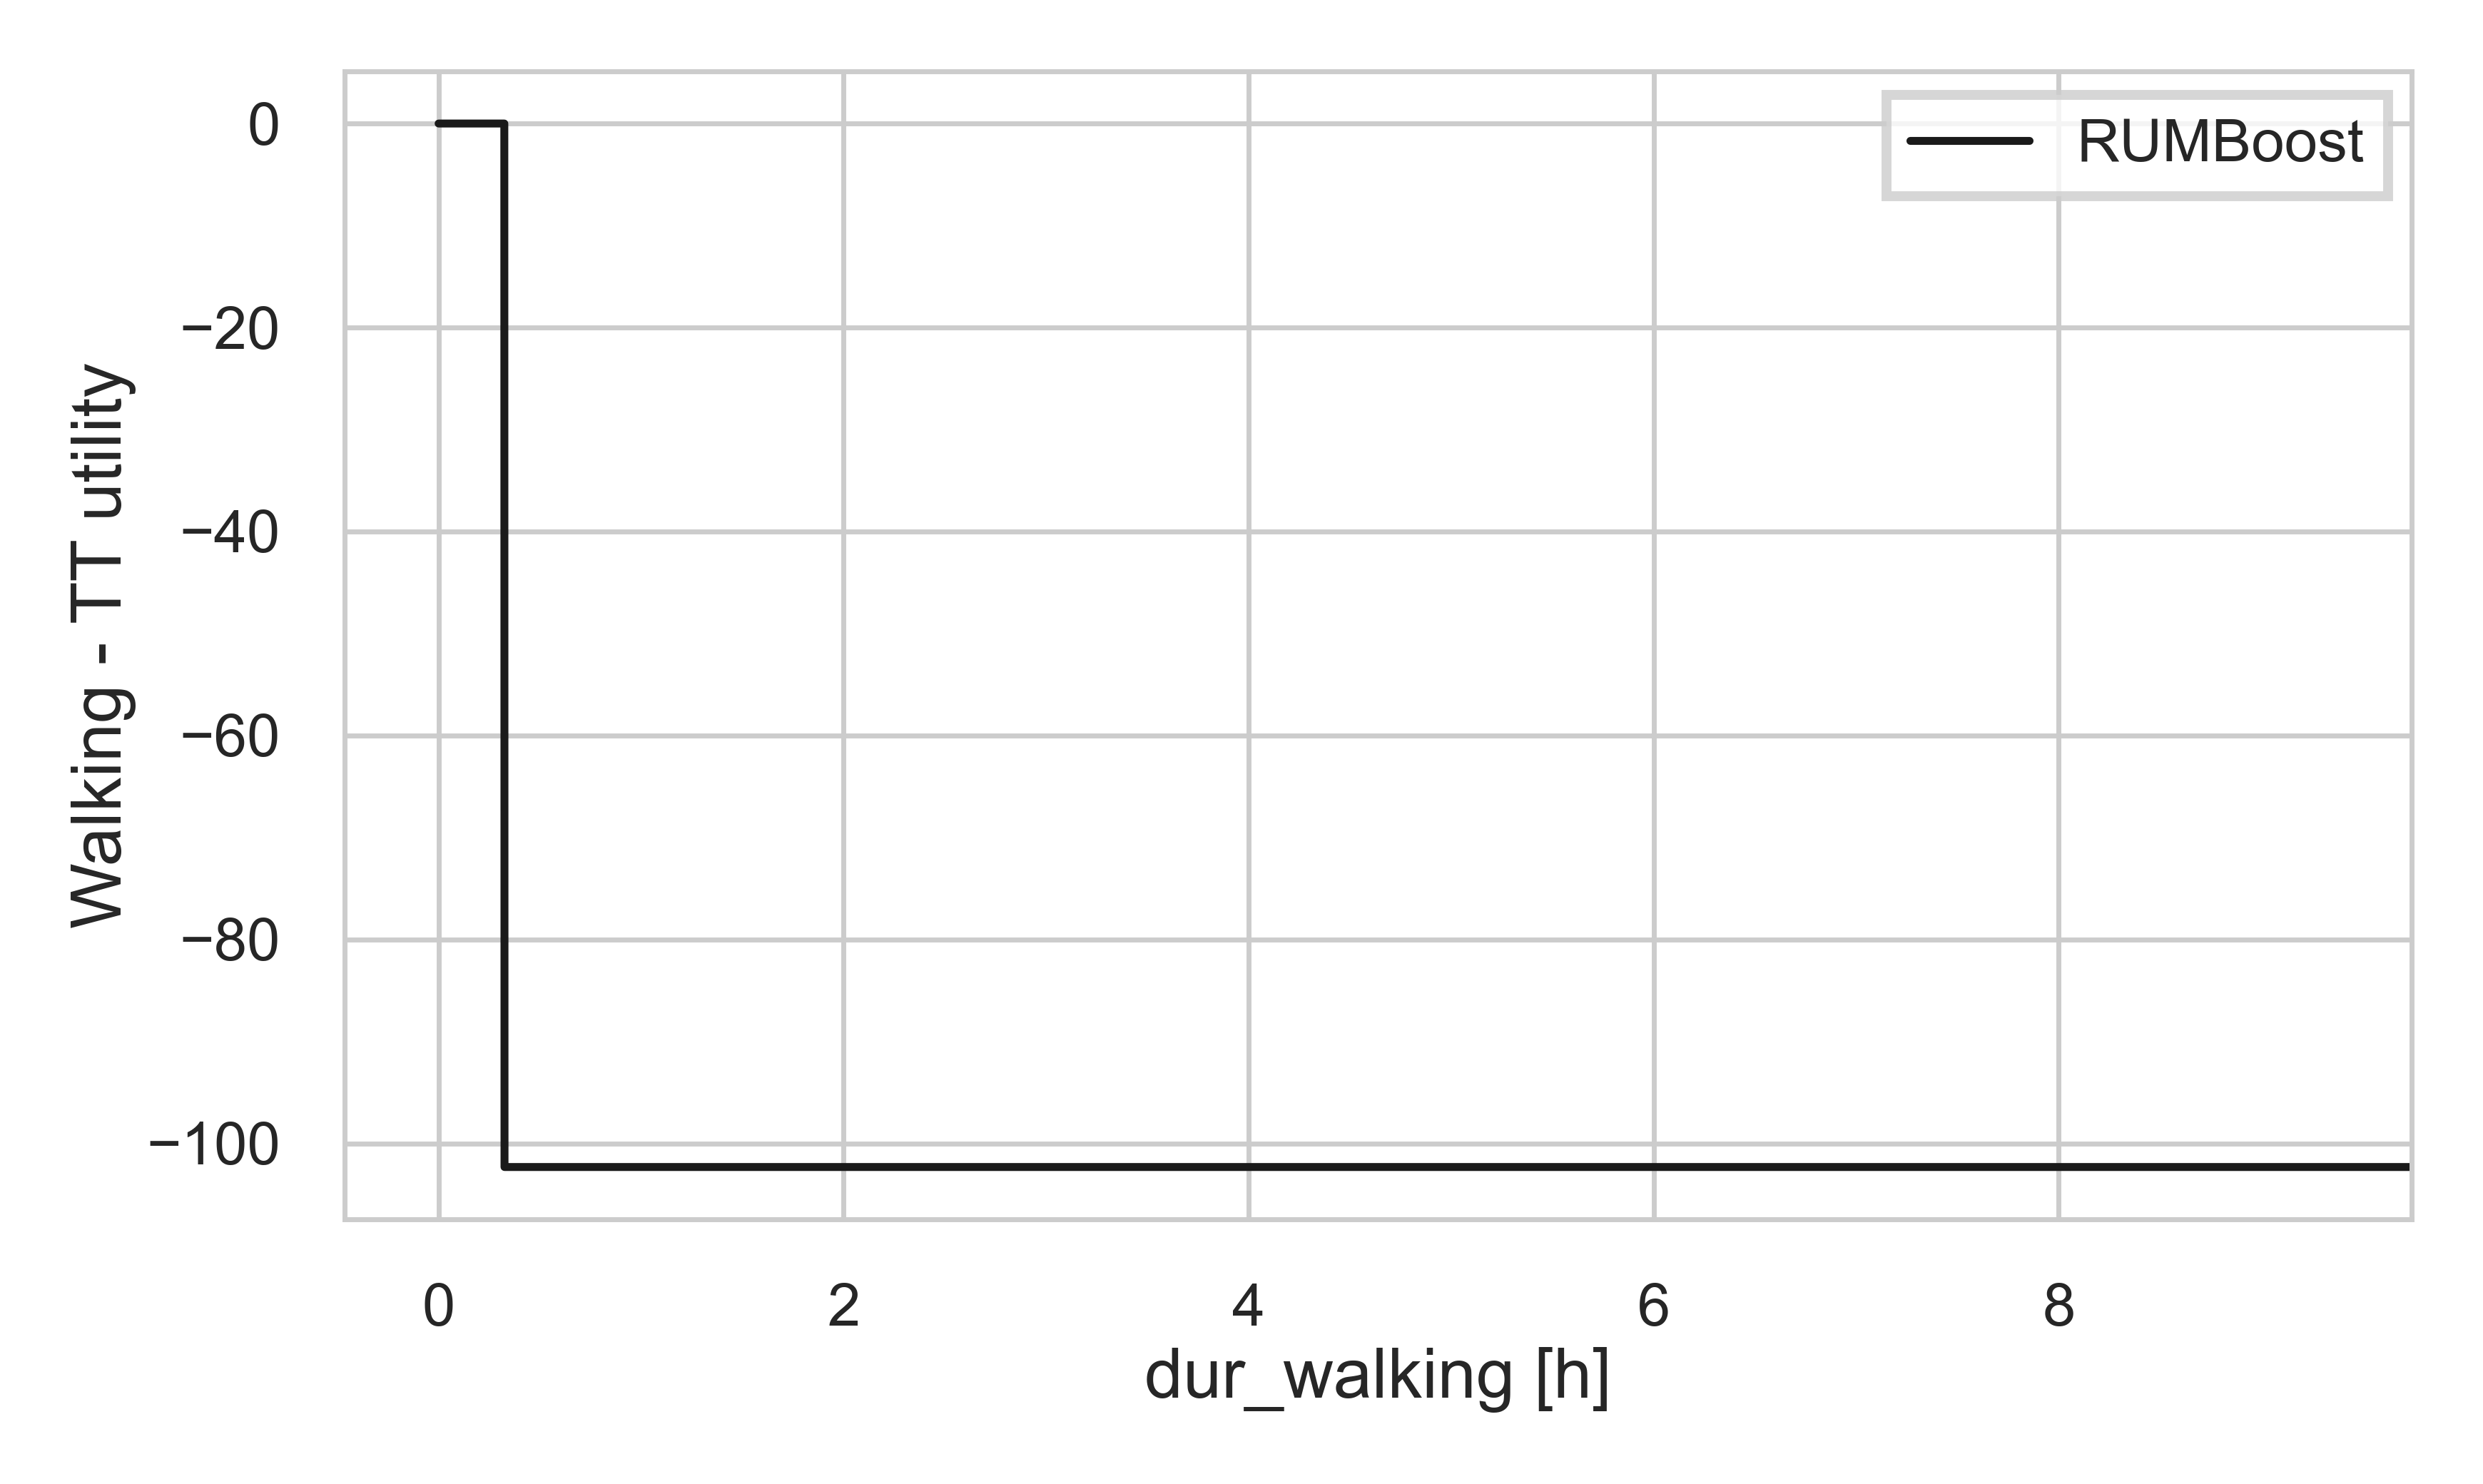

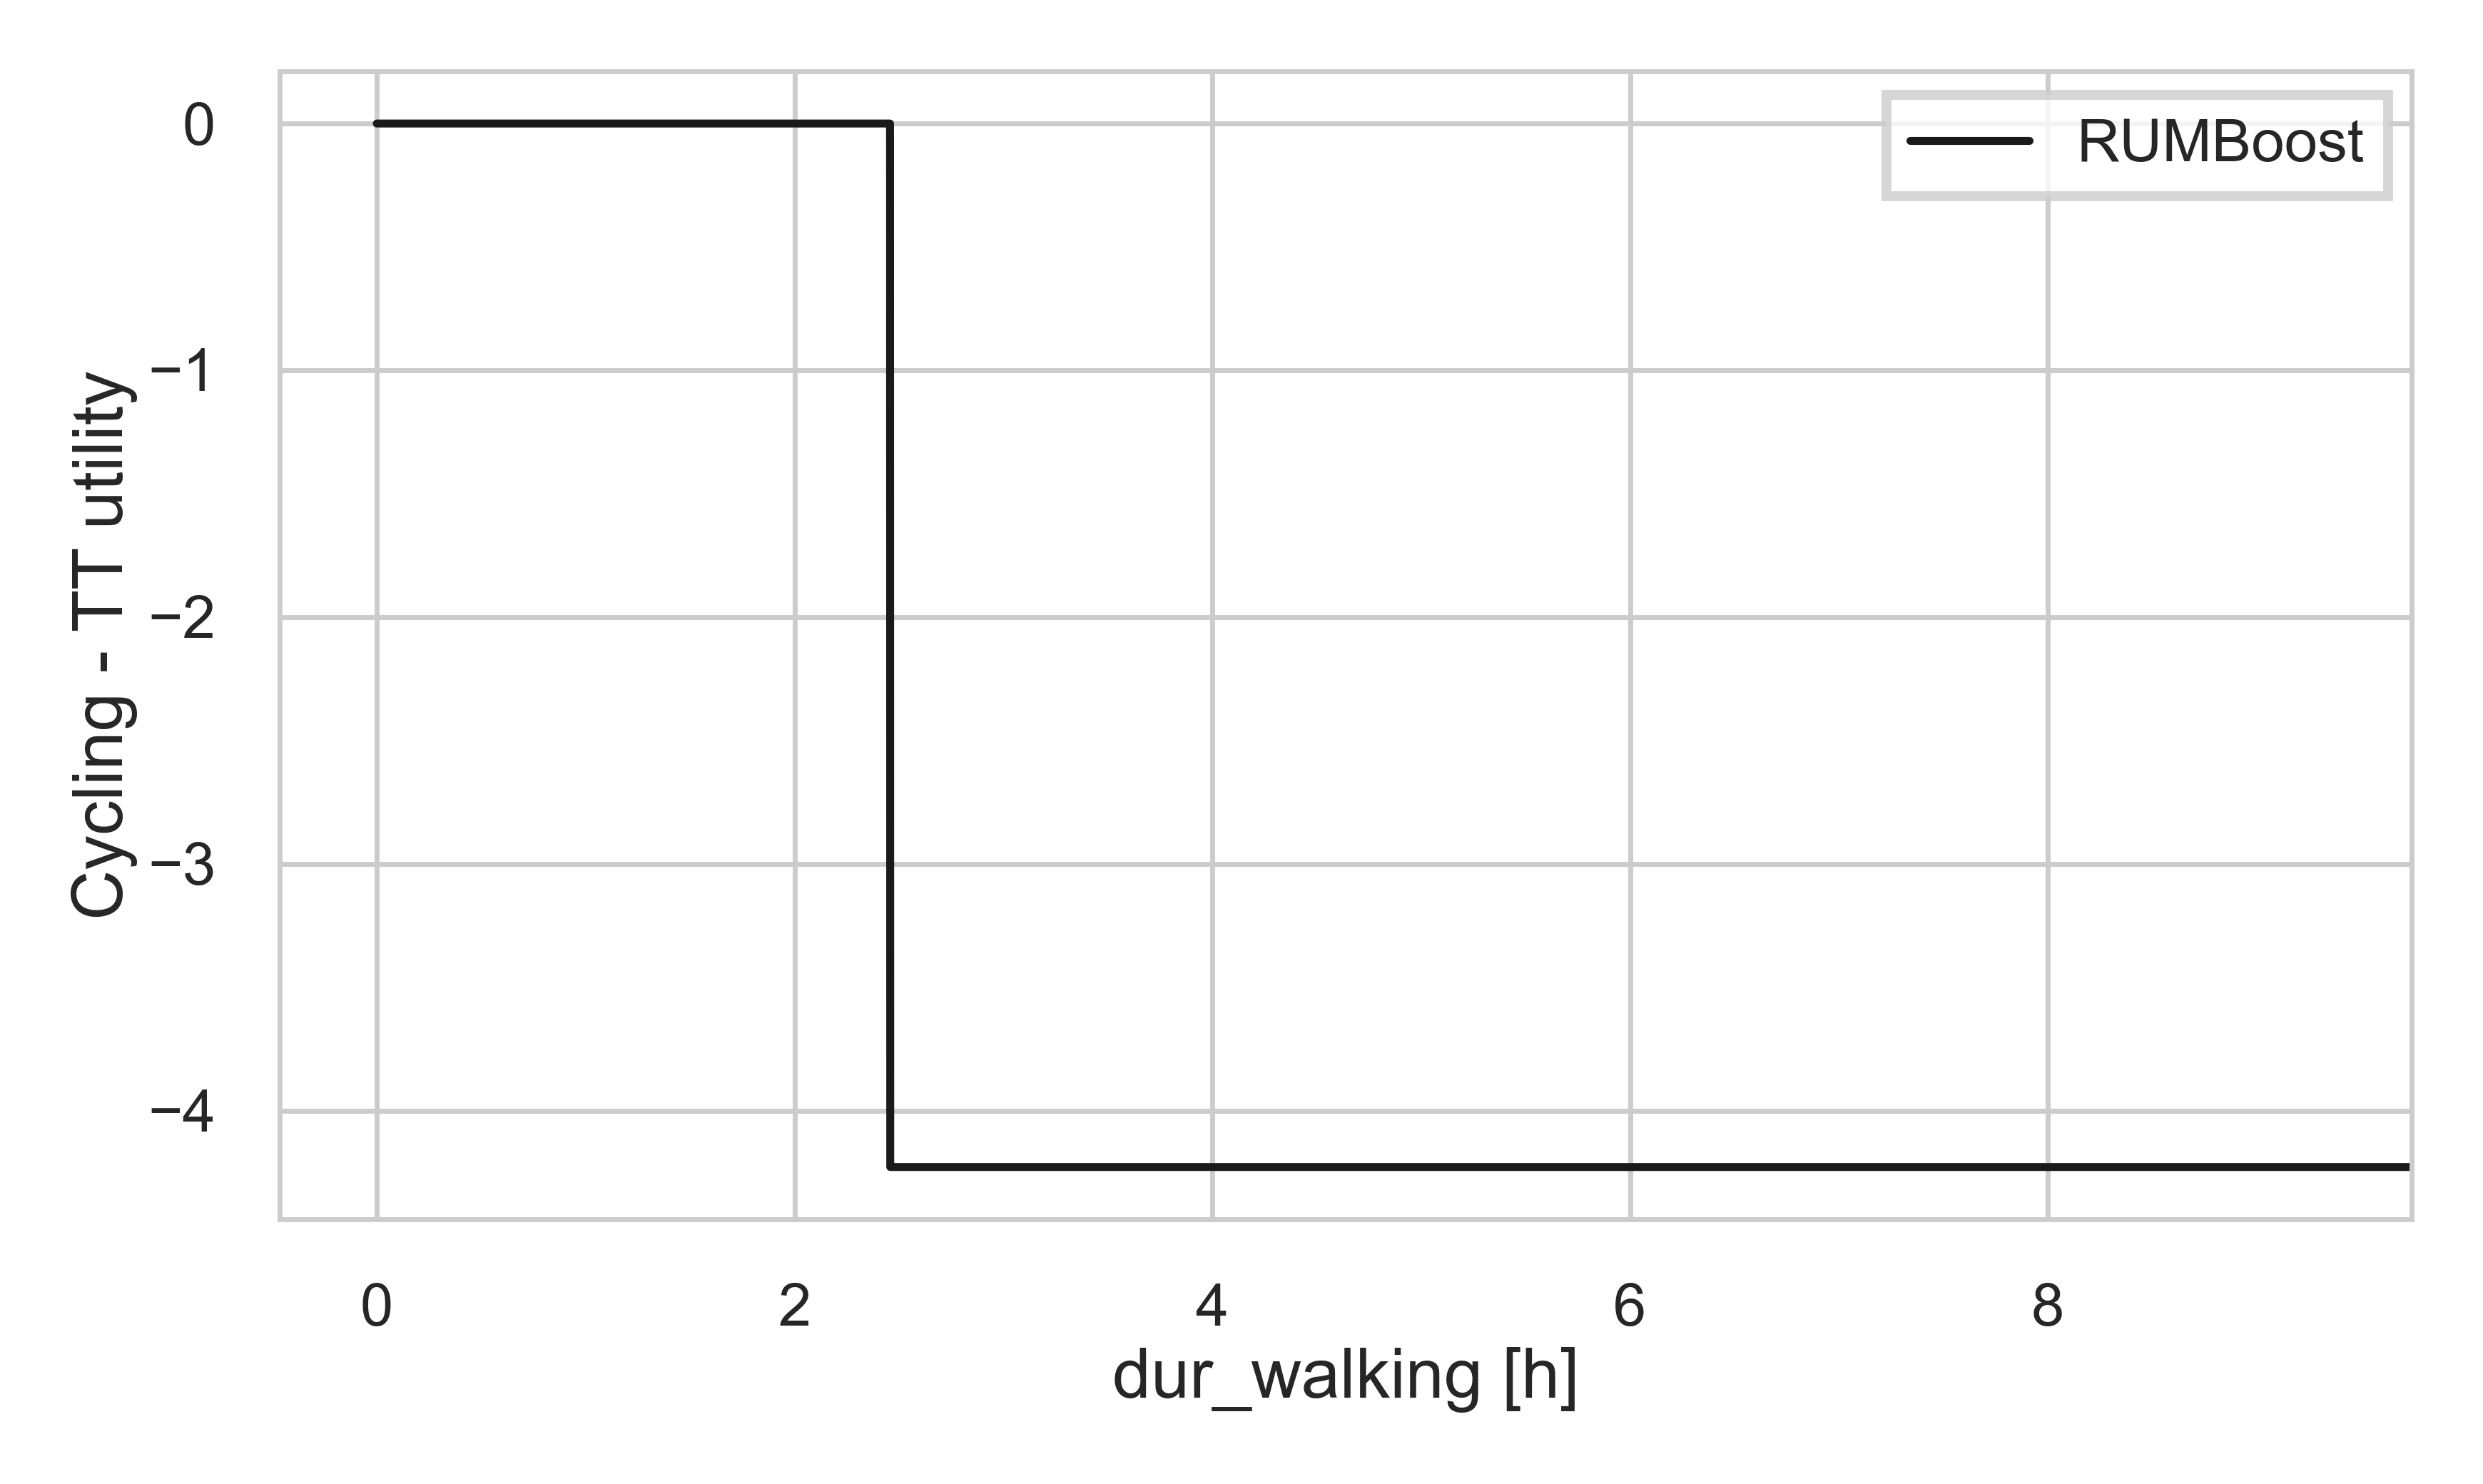

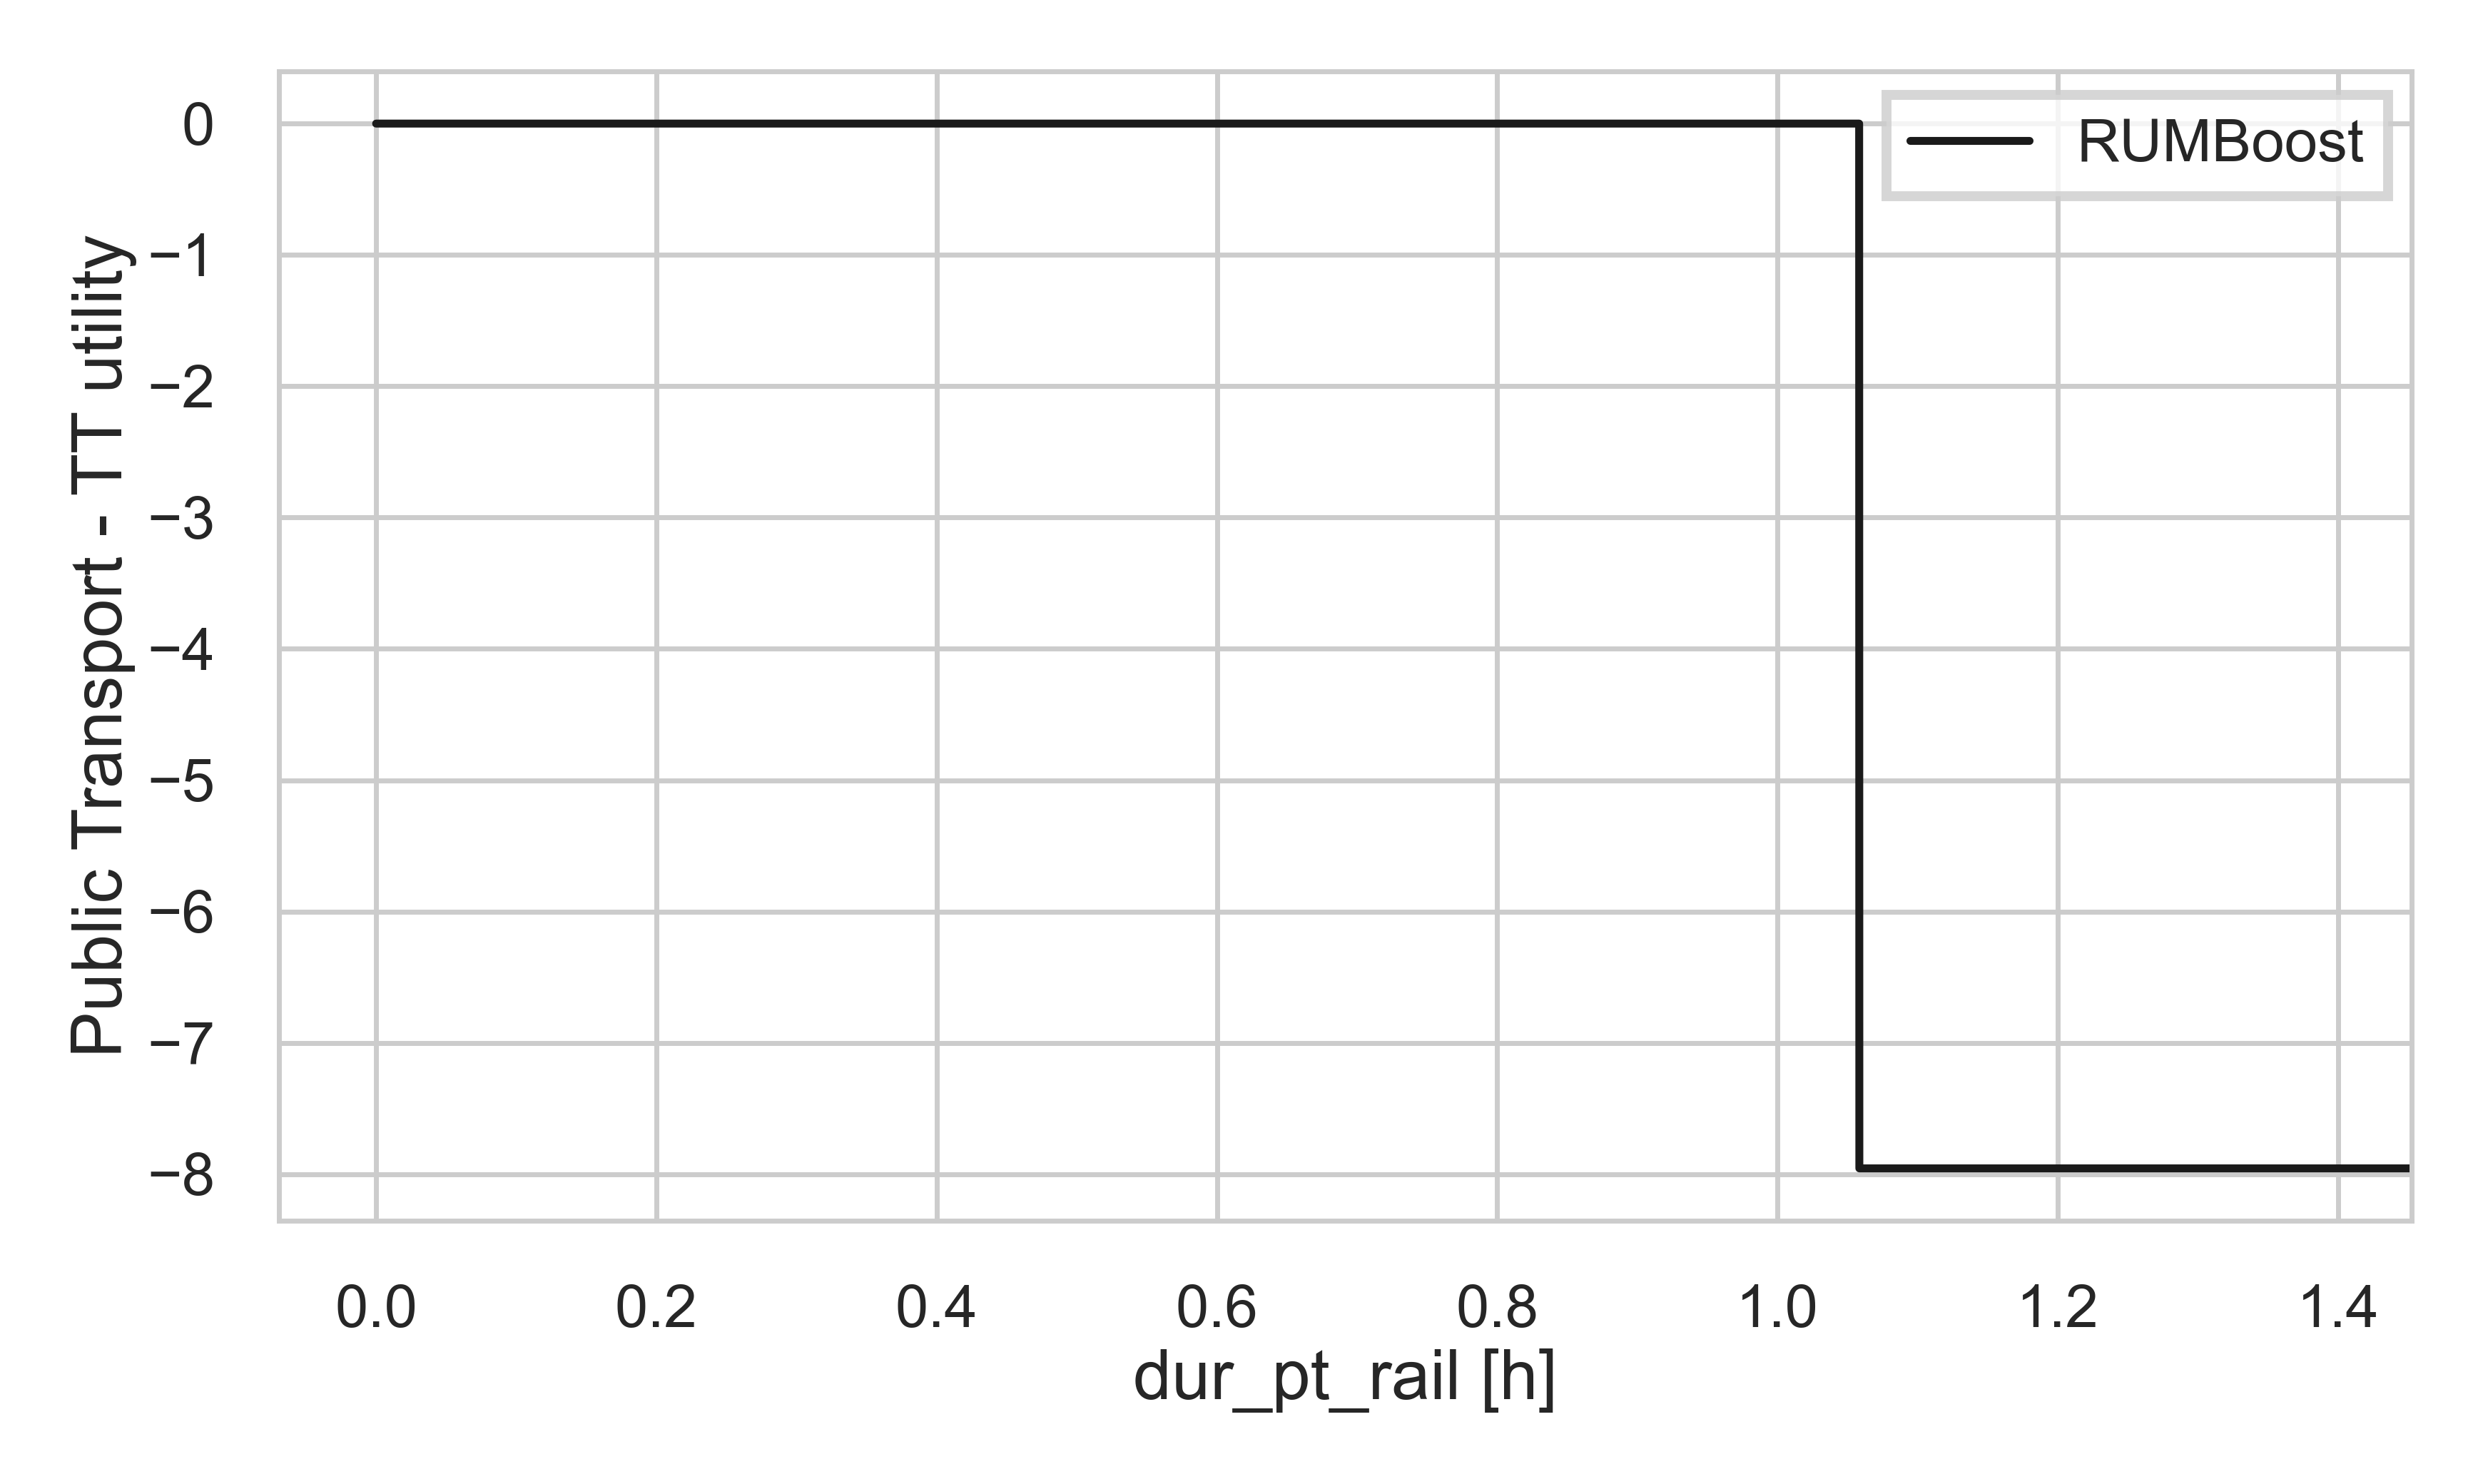

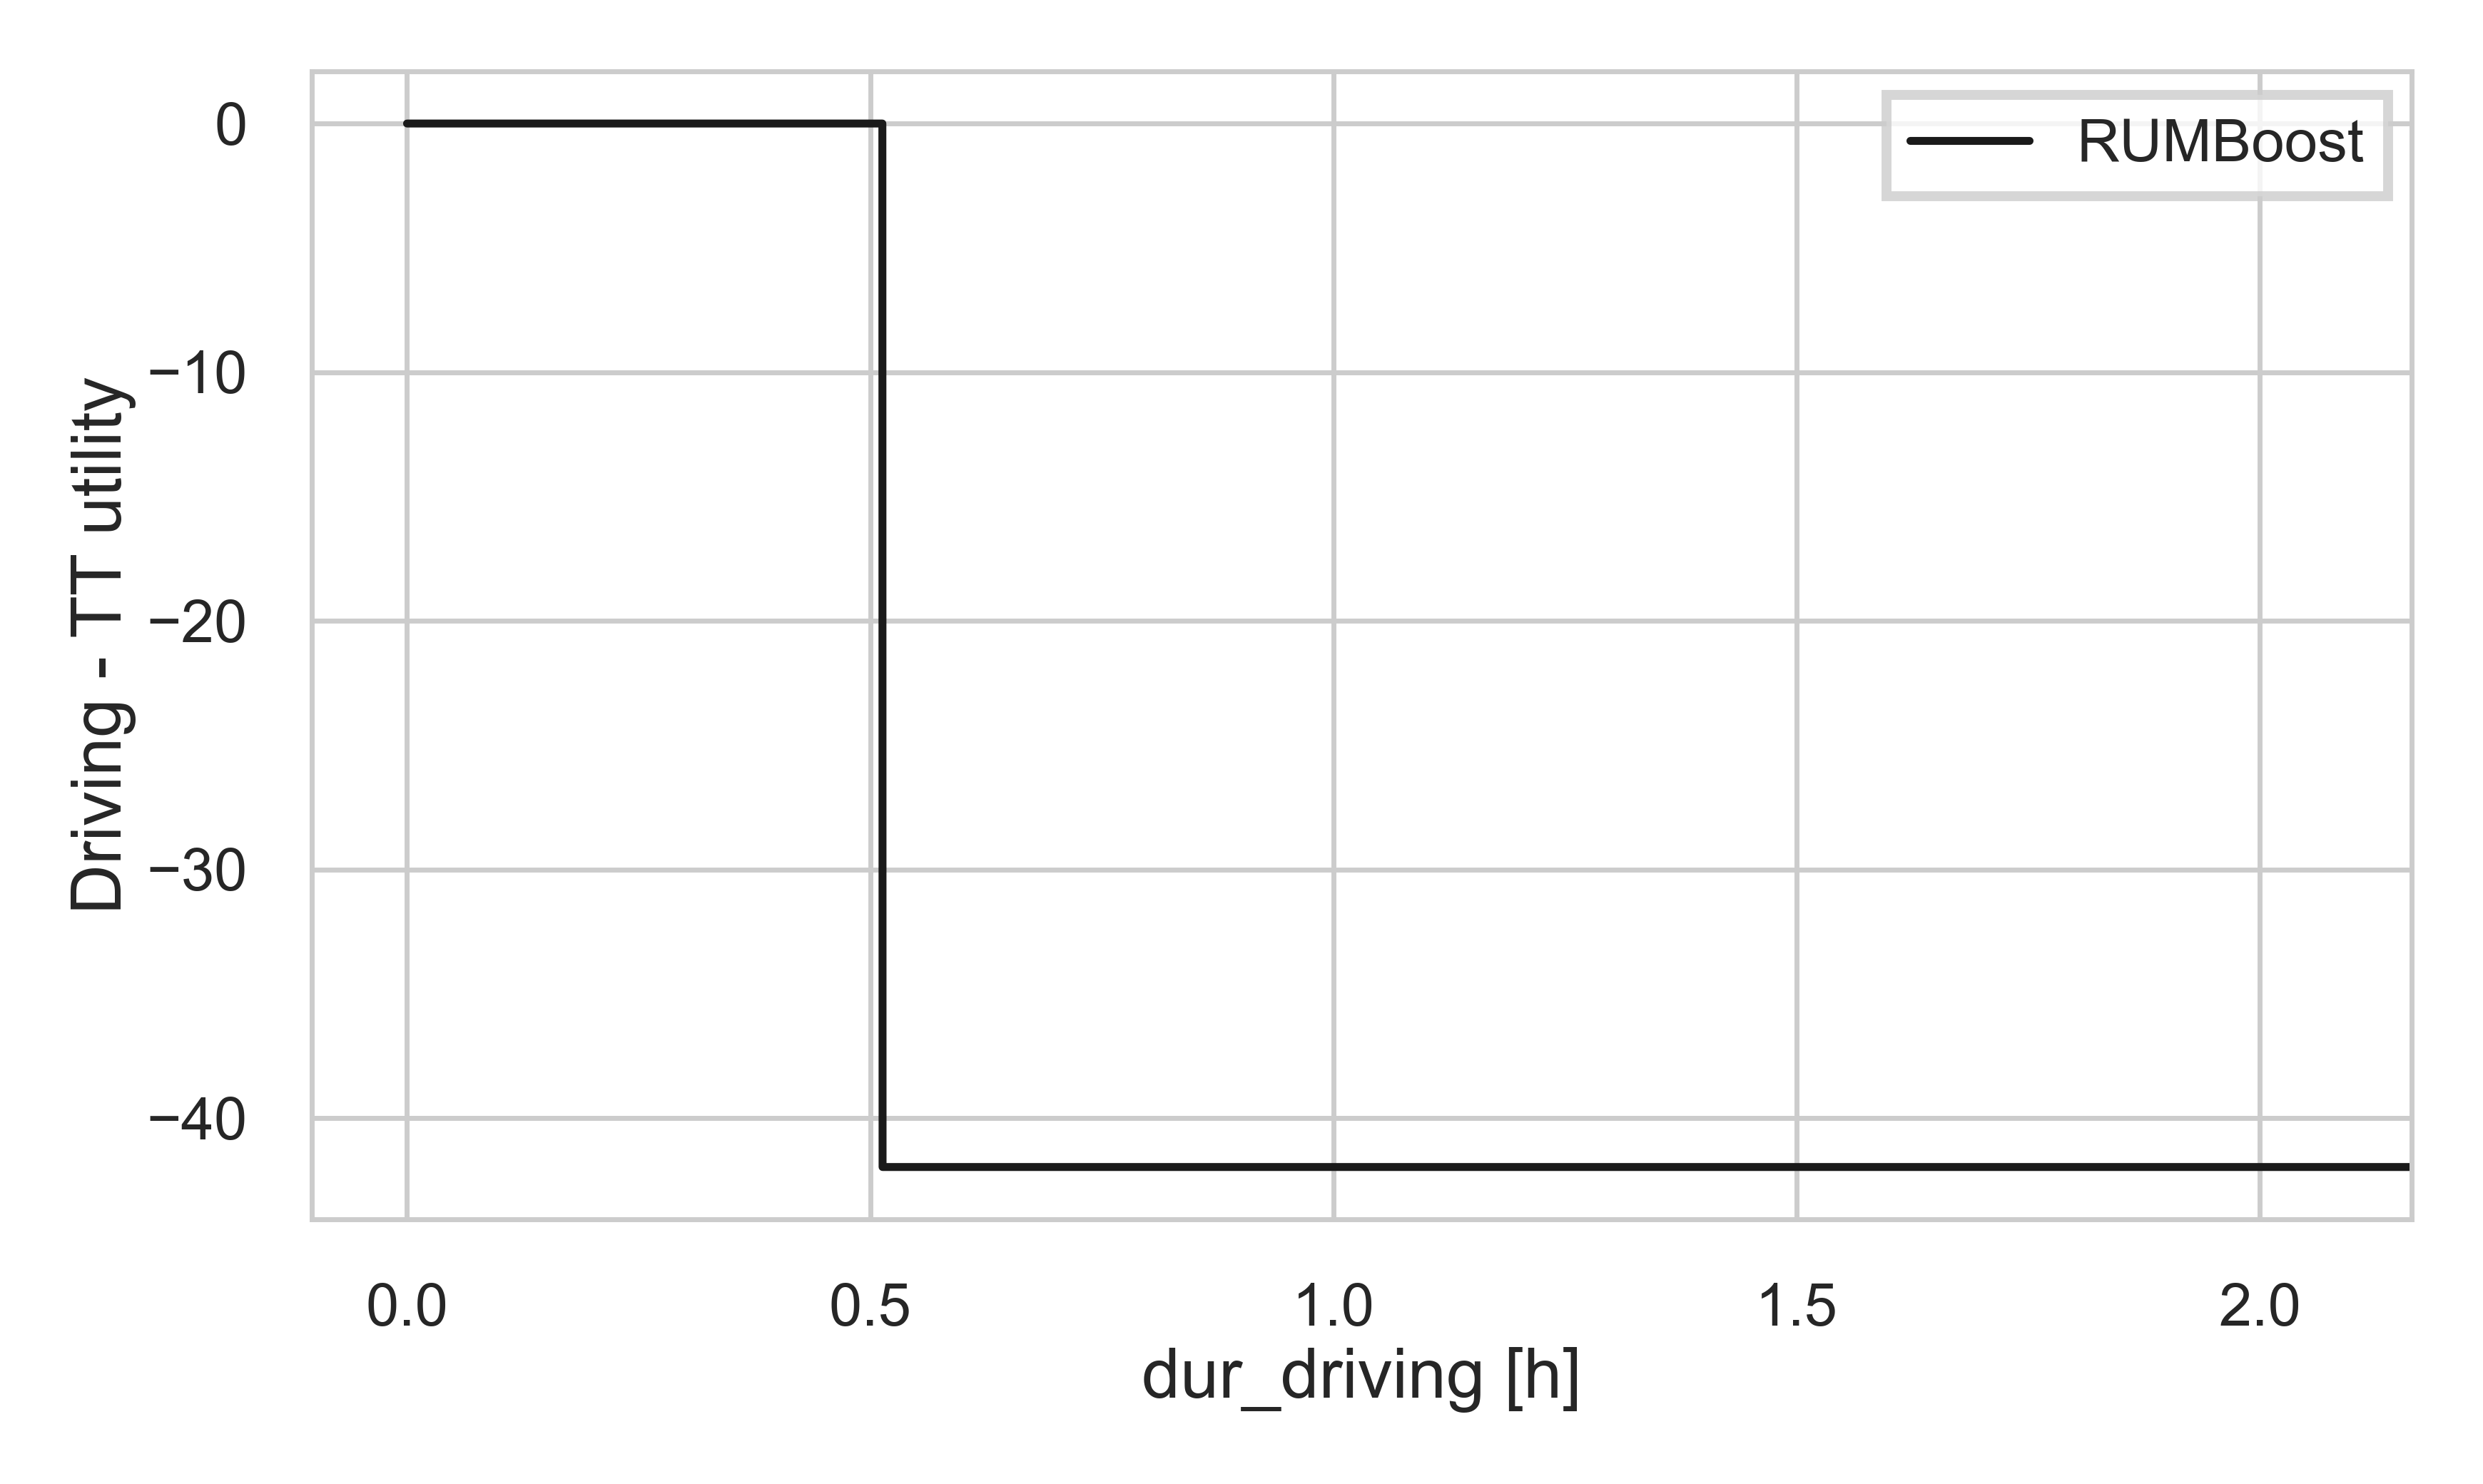

In [2]:
from rumboost.utility_plotting import plot_parameters

utility_names = {'0':'Walking', '1':'Cycling', '2':'Public Transport', '3': 'Driving', '4': 'Walking - TT', '5': 'Cycling - TT', '6': 'Public Transport - TT', '7': 'Driving - TT'}

plot_parameters(LPMC_model_fully_trained, LPMC_train, utility_names, asc_normalised=True, only_1d=True, save_figure=False)